### Load CdTe defect `json`s

In [1]:
from doped import analysis
from monty.serialization import loadfn, dumpfn

In [2]:
LZ_CdTe_defect_dict = loadfn(
    "VASP_Files/Pickled_Stuff/new_named_CdTe_defects_dict_doped_v2_wout_orig_meta_Te_i_2.json")
LZ_CdTe_dpd = loadfn(
    "VASP_Files/Pickled_Stuff/new_named_CdTe_dpd_doped_v2_wout_orig_meta_Te_i_2.json")
chempot_limits = loadfn("VASP_Files/Pickled_Stuff/cdte_chempots_elts_as_strings.json")

In [3]:
from doped import plotting

plotting.py:227: UserWarning: The chosen colormap is Dark2, which only has 8 colours, yet you have 24 defect species (so some defects will have the same line colour). Recommended to change/set colormap to 'tab10' or 'tab20' (10 and 20 colours each).


<Figure size 1400x1400 with 0 Axes>

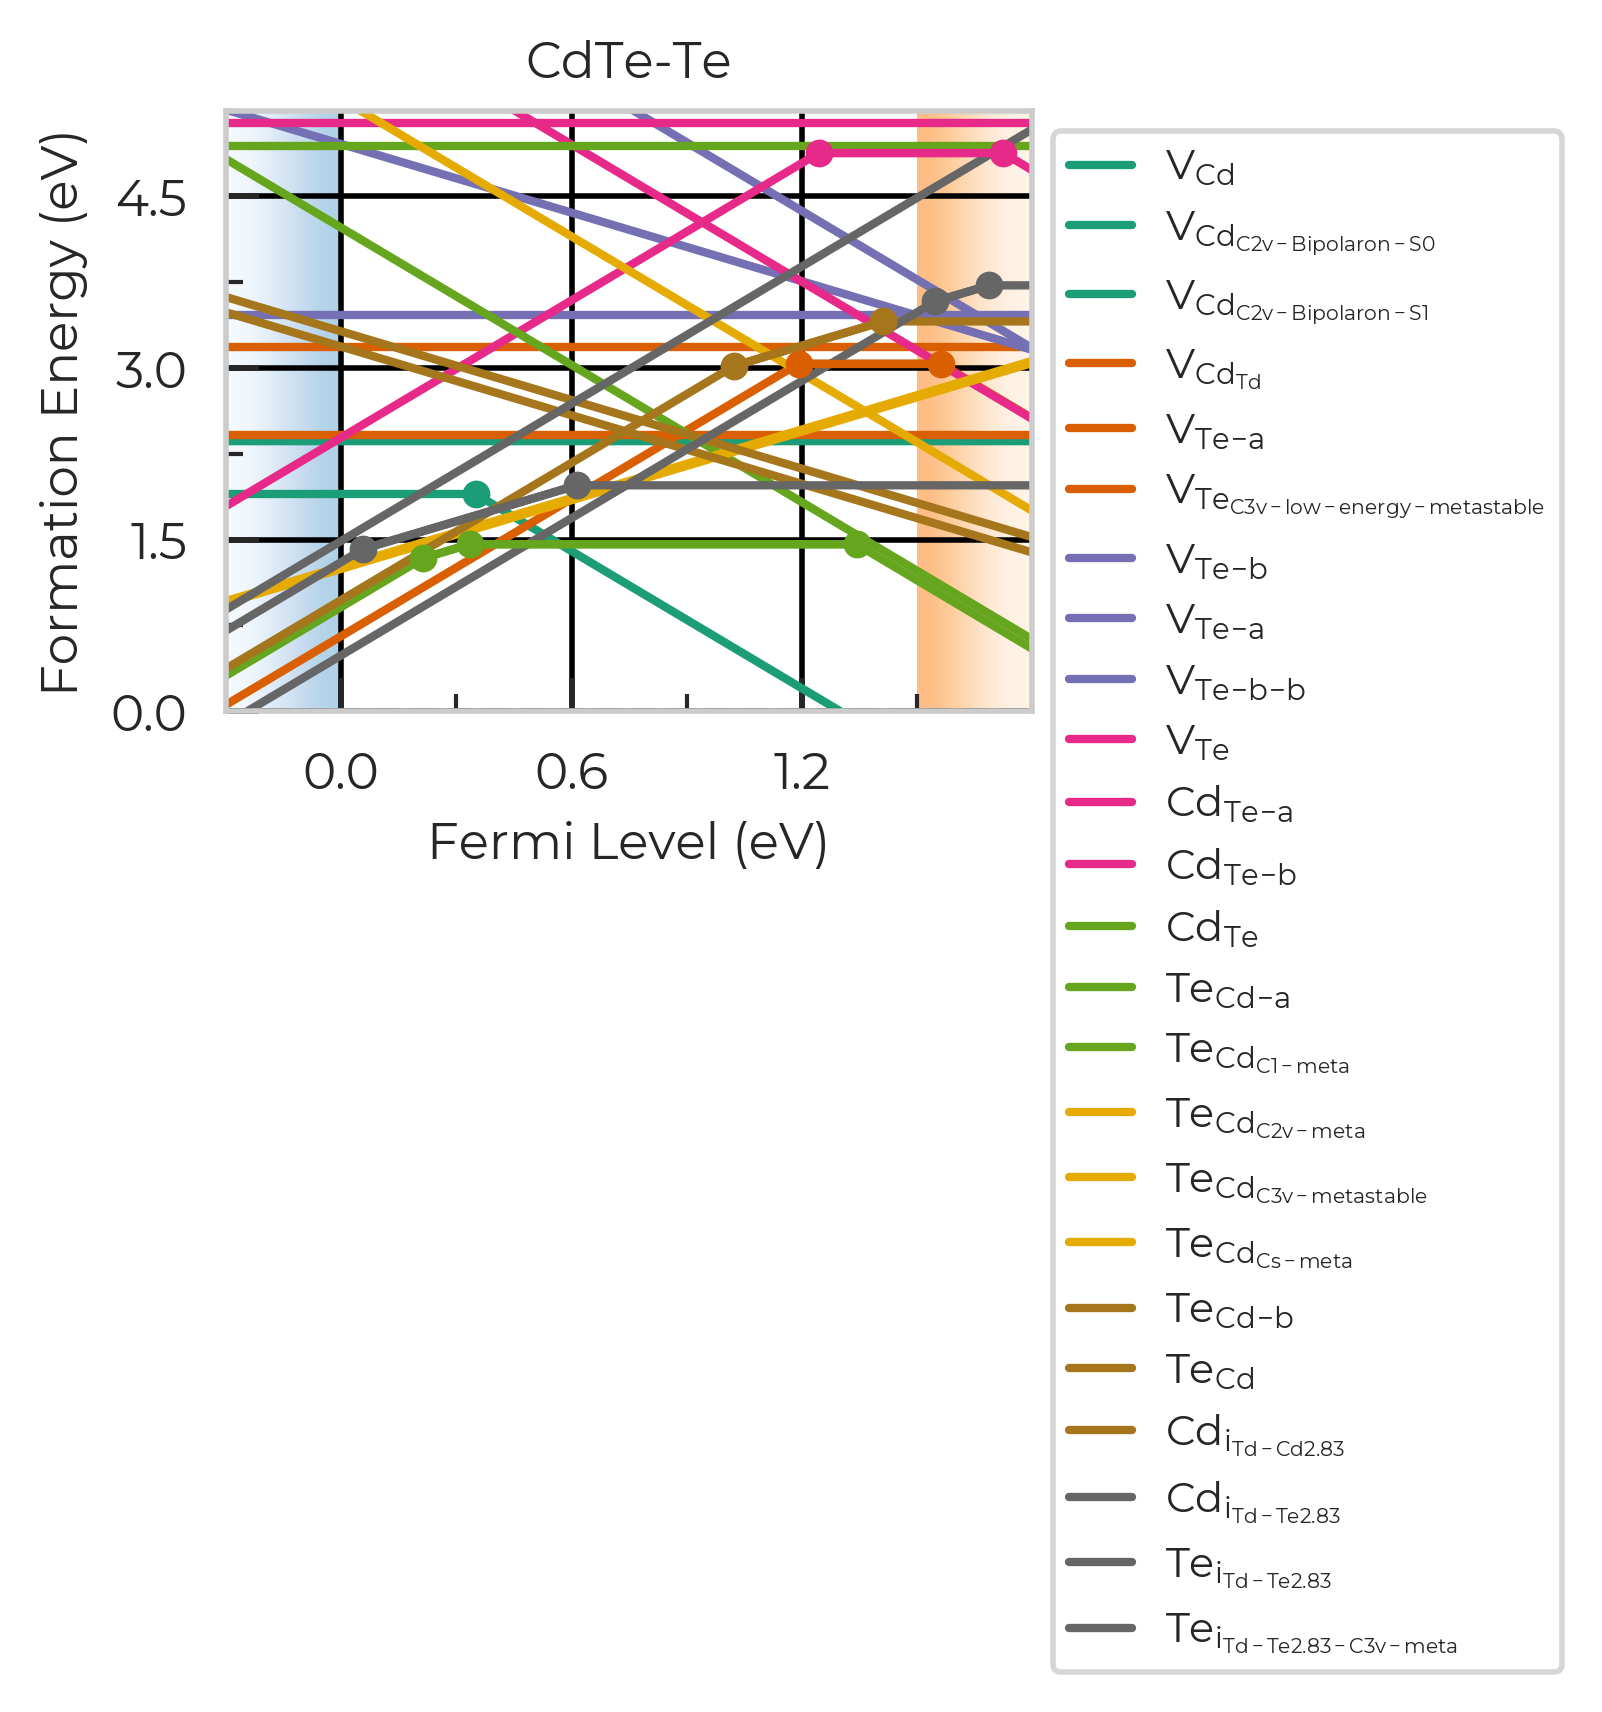

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("../Packages/publication_style.mplstyle")

fig = plotting.formation_energy_plot(LZ_CdTe_dpd,
                                    chempot_limits,
                                    facets=["CdTe-Te"],
                                    ylim=(0, 5.25),
                                    chempot_table=False,)

# `py-sc-Fermi` analysis

In [30]:
import numpy as np
import py_sc_fermi
from py_sc_fermi.dos import DOS
import matplotlib.pyplot as plt

In [31]:
pyscfermi_k181818_NKRED2_dos = DOS.from_vasprun("VASP_Files/Bulk_DOS/k181818_NKRED2/vasprun.xml.gz",
                                                 nelect=18, bandgap=1.497)

(0.0, 9.119190098749655)

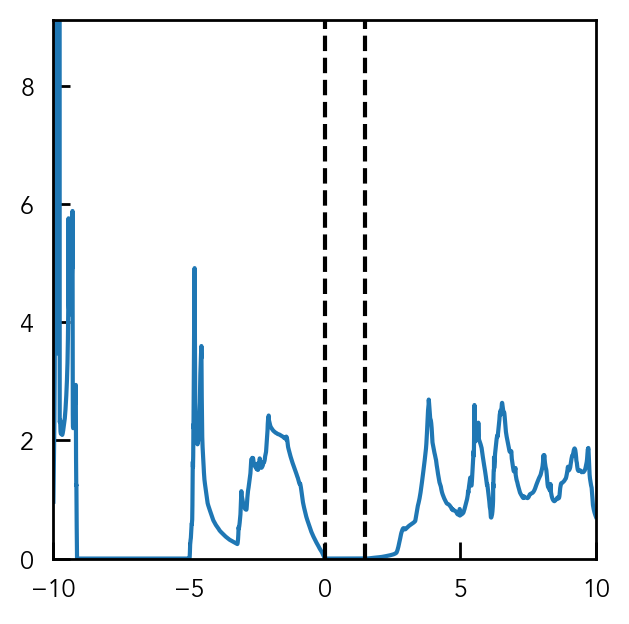

In [116]:
vbm = 0; cbm = 1.497
plt.figure(dpi=200)
plt.plot(pyscfermi_k181818_NKRED2_dos.edos,pyscfermi_k181818_NKRED2_dos.dos)
plt.axvline(vbm, 0, 1000, color = 'black', ls='--')
plt.axvline(cbm, 0, 1000, color = 'black', ls='--')
plt.xlim(-10,10)
plt.ylim(0,0.1*np.max(pyscfermi_k181818_NKRED2_dos.dos))

In [86]:
from py_sc_fermi.inputs import volume_from_structure

cdte_prim_cell_volume = volume_from_structure('VASP_Files/Bulk_DOS/k181818_NKRED2/vasprun.xml.gz')

In [30]:
degeneracy_dict = { # from manually looking at structures, goinge through the MKWS_Structure_Comparison notebook
    "Int_Te_3_0": 8, # one Td Te-coordinated site per fu, twisted with two equivalent twists possible
    "Int_Te_3_unperturbed_0": 6, # C2v, 4C2
    "Int_Te_3_unperturbed_1": 12, # Cs (basically C2v -> Cs with another splitting), 4C2 * 2C1
    "Int_Te_3_1": 4, # Non-twisted dimer, 4C1 cause interstitial dimer
    "Int_Te_3_2": 4, # Kicks one Cd neighbour off its site
    "Int_Te_3_C3v_meta_2": 4, # C3v
    "Int_Te_3_orig_dimer_meta_2": 8, # twisted split-interstitial dimer
    "as_1_Cd_on_Te_0": 12, # Two move away, then of the other two that move in, one more than the other -> 4C2*2C1
    "as_2_Cd_on_Te_orig_C2v_0": 6, # C2v
    "as_2_Cd_on_Te_metastable_0": 6, # also C2v
    "Int_Cd_3_1": 1, # Td
    "Int_Cd_1_2": 1, # Td
    "Int_Cd_3_0": 1, # Td
    "Int_Cd_3_2": 1, # Td
    "Int_Cd_1_1": 1, # Td
    "Int_Cd_1_0": 1, # Td
    "vac_2_Te_0": 6, # Cd dimer, C2v
    "vac_2_Te_orig_non_JT_distorted_0": 1, # contracted Td
    "vac_2_Te_C3v_low_energy_metastable_0": 4, # C3v
    "vac_2_Te_orig_metastable_-1": 12, # Cs, dimer, with one of other Cd moving closer, one moving away -> 4C2*2C1
    "vac_2_Te_-2": 6, # Double Cd dimer, C2v
    "vac_2_Te_unperturbed_-2": 12, # Cd dimer, off-centre, C2v*2C1
    "vac_2_Te_shaken_-2": 4, # one Cd moves into vacancy site and kicks opposite Cd into trigonal Te
    "as_1_Te_on_Cd_1": 4, # C3v
    "as_2_Te_on_Cd_C2v_meta_1": 6, # C2v  # previously as_2_Te_on_Cd_1, as_1_Te_on_Cd_1_C2v
    "as_2_Te_on_Cd_C3v_metastable_1": 4, # C3v
    "as_1_Te_on_Cd_0": 4, # C3v
    "as_2_Te_on_Cd_Cs_meta_-2": 12, # Cs symmetry, C3v * 3C2; previously as_2_Te_on_Cd_-2
    "as_2_Te_on_Cd_C1_meta_-2": 4, # dimer with one of the neighbouring Te (previously
    # as_2_Te_on_Cd_-30%_metastable_-2)
    "as_1_Te_on_Cd_-2": 4, # dimer with one of the neighbouring Te
    "as_1_Te_on_Cd_-2_original_not_splInt": 1, # Td
    "vac_1_Cd_-2": 1, # Td
    "vac_1_Cd_0": 6, # Te dimer, C2v
    "vac_1_Cd_-1": 4, # C3v
    #"Int_Te_3_-1": 8, # twisted dimer – false charge state, checked DOS and structure
    #"Int_Te_3_-2": 8, # twisted dimer – false charge state, checked DOS and structure
    "as_1_Cd_on_Te_-2": 12, # Cd_Te moves toward 2 (-> 4C2), with commensurate twists of these and the other 2 Cd neighbours -> 2C1
    "as_1_Cd_on_Te_2": 1, # expanded T_d
    "as_1_Cd_on_Te_1": 6, # C2v
    "as_1_Cd_on_Te_-1": 1, # near-unperturbed T_d
    "vac_2_Te_-1": 12, # Cs, dimer, with one of other Cd moving closer, one moving away -> 4C2*2C1
    "vac_2_Te_1": 1, # slightly expanded T_d
    "vac_2_Te_2": 1, # strongly expanded T_d
    "as_1_Te_on_Cd_-1": 12, # C_s, C_3v to 3C2
    "as_2_Te_on_Cd_metastable1_-1": 8, # twisted dimer
    "as_2_Te_on_Cd_metastable2_-1": 8, # also twisted dimer
    "as_1_Te_on_Cd_2": 1, # slightly expanded Td
    "vac_1_Cd_C2v_Bipolaron_S0_0": 6, # C_2v
    "vac_1_Cd_C2v_Bipolaron_S1_0": 6, # C_2v
    "vac_1_Cd_Td_0": 1, # T_d
}

In [31]:
degeneracy_dict_for_thesis = {
    "Int_Te_3_0": (8, "one Td Te-coordinated site per fu, twisted with two equivalent twists possible"),
    "Int_Te_3_unperturbed_0": (6, "C2v, 4C2"),
    "Int_Te_3_unperturbed_1": (12, "Cs (basically C2v -> Cs with another splitting), 4C2 * 2C1"),
    "Int_Te_3_1": (4, "Non-twisted dimer, 4C1 cause interstitial dimer"),
    "Int_Te_3_2": (4, "Kicks one Cd neighbour off its site"),
    "Int_Te_3_C3v_meta_2": (4, "C3v"),
    "Int_Te_3_orig_dimer_meta_2": (8, "twisted split-interstitial dimer"),
    "as_1_Cd_on_Te_0": (12, "Two move away, then of the other two that move in, one more than the other -> "
                            "4C2*2C1"),
    "as_2_Cd_on_Te_orig_C2v_0": (6, "C2v"),
    "as_2_Cd_on_Te_metastable_0": (6, "also C2v"),
    "Int_Cd_3_1": (1, "Td"),
    "Int_Cd_1_2": (1, "Td"),
    "Int_Cd_3_0": (1, "Td"),
    "Int_Cd_3_2": (1, "Td"),
    "Int_Cd_1_1": (1, "Td"),
    "Int_Cd_1_0": (1, "Td"),
    "vac_2_Te_0": (6, "Cd dimer, C2v"),
    "vac_2_Te_orig_non_JT_distorted_0": (1, "contracted Td"),
    "vac_2_Te_C3v_low_energy_metastable_0": (4, "C3v"),
    "vac_2_Te_orig_metastable_-1": (12, "Cs, dimer, with one of other Cd moving closer, one moving away -> "
                                        "4C2*2C1"),
    "vac_2_Te_-2": (6, "Double Cd dimer, C2v"),
    "vac_2_Te_unperturbed_-2": (12, "Cd dimer, off-centre, C2v*2C1"),
    "vac_2_Te_shaken_-2": (4, "one Cd moves into vacancy site and kicks opposite Cd into trigonal Te"),
    "as_1_Te_on_Cd_1": (4, "C3v"),
    "as_2_Te_on_Cd_C2v_meta_1": (6, "C2v"), # previously as_2_Te_on_Cd_1, as_1_Te_on_Cd_1_C2v
    "as_2_Te_Cd_C3v_metastable_1": (4, "C3v"),
    "as_1_Te_on_Cd_0": (4, "C3v"),
    "as_2_Te_on_Cd_Cs_meta_-2": (12, "Cs symmetry, C3v * 3C2"),  # previously as_2_Te_on_Cd_-2
    "as_2_Te_on_Cd_C1_meta_-2": (4, "dimer with one of the neighbouring Te"),  # (previously
    # as_2_Te_on_Cd_-30%_metastable_-2)
    "vac_1_Cd_-2": (1, "Td"),
    "vac_1_Cd_0": (6, "Te dimer, C2v"),
    "vac_1_Cd_-1": (4, "C3v"),
    #"Int_Te_3_-1": 8, # twisted dimer – false charge state, checked DOS and structure
    #"Int_Te_3_-2": 8, # twisted dimer – false charge state, checked DOS and structure
    "as_1_Cd_on_Te_-2": (12, "Cd_Te moves toward 2 (-> 4C2), with commensurate twists of these and the other"
                             " 2 Cd neighbours -> 2C1"),
    "as_1_Cd_on_Te_2": (1, "expanded T_d"),
    "as_1_Cd_on_Te_1": (6, "C2v"),
    "as_1_Cd_on_Te_-1": (1, "near-unperturbed T_d"),
    "vac_2_Te_-1": (12, "Cs, dimer, with one of other Cd moving closer, one moving away -> 4C2*2C1"),
    "vac_2_Te_1": (1, "slightly expanded T_d"),
    "vac_2_Te_2": (1, "strongly expanded T_d"),
    "as_1_Te_on_Cd_-1": (12, "C_s, C_3v to 3C2"),
    "as_2_Te_on_Cd_metastable1_-1": (8, "twisted dimer"),
    "as_2_Te_on_Cd_metastable2_-1": (8, "also twisted dimer"),
    "as_1_Te_on_Cd_2": (1, "slightly expanded Td"),
    "vac_1_Cd_C2v_Bipolaron_S0_0": (6, "C_2v"),
    "vac_1_Cd_C2v_Bipolaron_S1_0": (6, "C_2v"),
    "vac_1_Cd_Td_0": (1, "T_d"),
}
names, charges, point_symmetry, config_degeneracies, spin_degeneracies, total_degeneracies, notes = [], [], [], [], [], [], []
for defect_species, degeneracy_tuple in degeneracy_dict_for_thesis.items():
    names.append(defect_species.rsplit("_", 1)[0])
    charge = int(defect_species.rsplit("_", 1)[1])
    charges.append(f"{'+' if charge >0 else ''}{charge}")
    point_symmetry.append(degeneracy_tuple[1])
    config_degeneracies.append(degeneracy_tuple[0])
    # 1 if charge is even else 2
    spin_degeneracies.append(1 if charge % 2 == 0 else 2)
    total_degeneracies.append(degeneracy_tuple[0] * (
        1 if charge % 2 == 0 else 2))
    notes.append(degeneracy_tuple[1])

In [32]:
import pandas as pd
degeneracy_df = pd.DataFrame({"Defect": names, "Charge": charges, "Point Symmetry": point_symmetry,
                              "Configurational Degeneracy": config_degeneracies, "Spin Degeneracy": spin_degeneracies,
                                "Total Degeneracy": total_degeneracies, "Notes": notes})

In [33]:
degeneracy_df

Defect Charge  \
0                             Int_Te_3      0   
1                 Int_Te_3_unperturbed      0   
2                 Int_Te_3_unperturbed     +1   
3                             Int_Te_3     +1   
4                             Int_Te_3     +2   
5                    Int_Te_3_C3v_meta     +2   
6             Int_Te_3_orig_dimer_meta     +2   
7                        as_1_Cd_on_Te      0   
8               as_2_Cd_on_Te_orig_C2v      0   
9             as_2_Cd_on_Te_metastable      0   
10                            Int_Cd_3     +1   
11                            Int_Cd_1     +2   
12                            Int_Cd_3      0   
13                            Int_Cd_3     +2   
14                            Int_Cd_1     +1   
15                            Int_Cd_1      0   
16                            vac_2_Te      0   
17      vac_2_Te_orig_non_JT_distorted      0   
18  vac_2_Te_C3v_low_energy_metastable      0   
19            vac_2_Te_orig_metastable     -1   
20                            vac_2_Te     -2   
21                vac_2_Te_unperturbed     -2   
22                     vac_2_Te_shaken     -2   
23                       as_1_Te_on_Cd     +1   
24              as_2_Te_on_Cd_C2v_meta     +1   
25           as_2_Te_Cd_C3v_metastable     +1   
26                       as_1_Te_on_Cd      0   
27               as_2_Te_on_Cd_Cs_meta     -2   
28               as_2_Te_on_Cd_C1_meta     -2   
29                            vac_1_Cd     -2   
30                            vac_1_Cd      0   
31                            vac_1_Cd     -1   
32                       as_1_Cd_on_Te     -2   
33                       as_1_Cd_on_Te     +2   
34                       as_1_Cd_on_Te     +1   
35                       as_1_Cd_on_Te     -1   
36                            vac_2_Te     -1   
37                            vac_2_Te     +1   
38                            vac_2_Te     +2   
39                       as_1_Te_on_Cd     -1   
40           as_2_Te_on_Cd_metastable1     -1   
41           as_2_Te_on_Cd_metastable2     -1   
42                       as_1_Te_on_Cd     +2   
43           vac_1_Cd_C2v_Bipolaron_S0      0   
44           vac_1_Cd_C2v_Bipolaron_S1      0   
45                         vac_1_Cd_Td      0   

                                       Point Symmetry  \
0   one Td Te-coordinated site per fu, twisted wit...   
1                                            C2v, 4C2   
2   Cs (basically C2v -> Cs with another splitting...   
3     Non-twisted dimer, 4C1 cause interstitial dimer   
4                 Kicks one Cd neighbour off its site   
5                                                 C3v   
6                    twisted split-interstitial dimer   
7   Two move away, then of the other two that move...   
8                                                 C2v   
9                                            also C2v   
10                                                 Td   
11                                                 Td   
12                                                 Td   
13                                                 Td   
14                                                 Td   
15                                                 Td   
16                                      Cd dimer, C2v   
17                                      contracted Td   
18                                                C3v   
19  Cs, dimer, with one of other Cd moving closer,...   
20                               Double Cd dimer, C2v   
21                      Cd dimer, off-centre, C2v*2C1   
22  one Cd moves into vacancy site and kicks oppos...   
23                                                C3v   
24                                                C2v   
25                                                C3v   
26                                                C3v   
27                             Cs symmetry, C3v * 3C2   
28              dimer with one of the neighbouring Te   
29                

In [12]:
degeneracy_df.to_csv("CdTe_Thesis_Defect_Degeneracies.csv")

In [25]:
from doped import analysis
from monty.serialization import loadfn, dumpfn

LZ_CdTe_dpd = loadfn("VASP_Files/Pickled_Stuff/new_named_CdTe_dpd_doped_v2_wout_orig_meta_Te_i_2.json")
LZ_CdTe_defects_dict = loadfn(
    "VASP_Files/Pickled_Stuff/new_named_CdTe_defects_dict_doped_v2_wout_orig_meta_Te_i_2.json")
chempot_limits = loadfn("VASP_Files/Pickled_Stuff/cdte_chempots_elts_as_strings.json")

<Figure size 1400x1400 with 0 Axes>

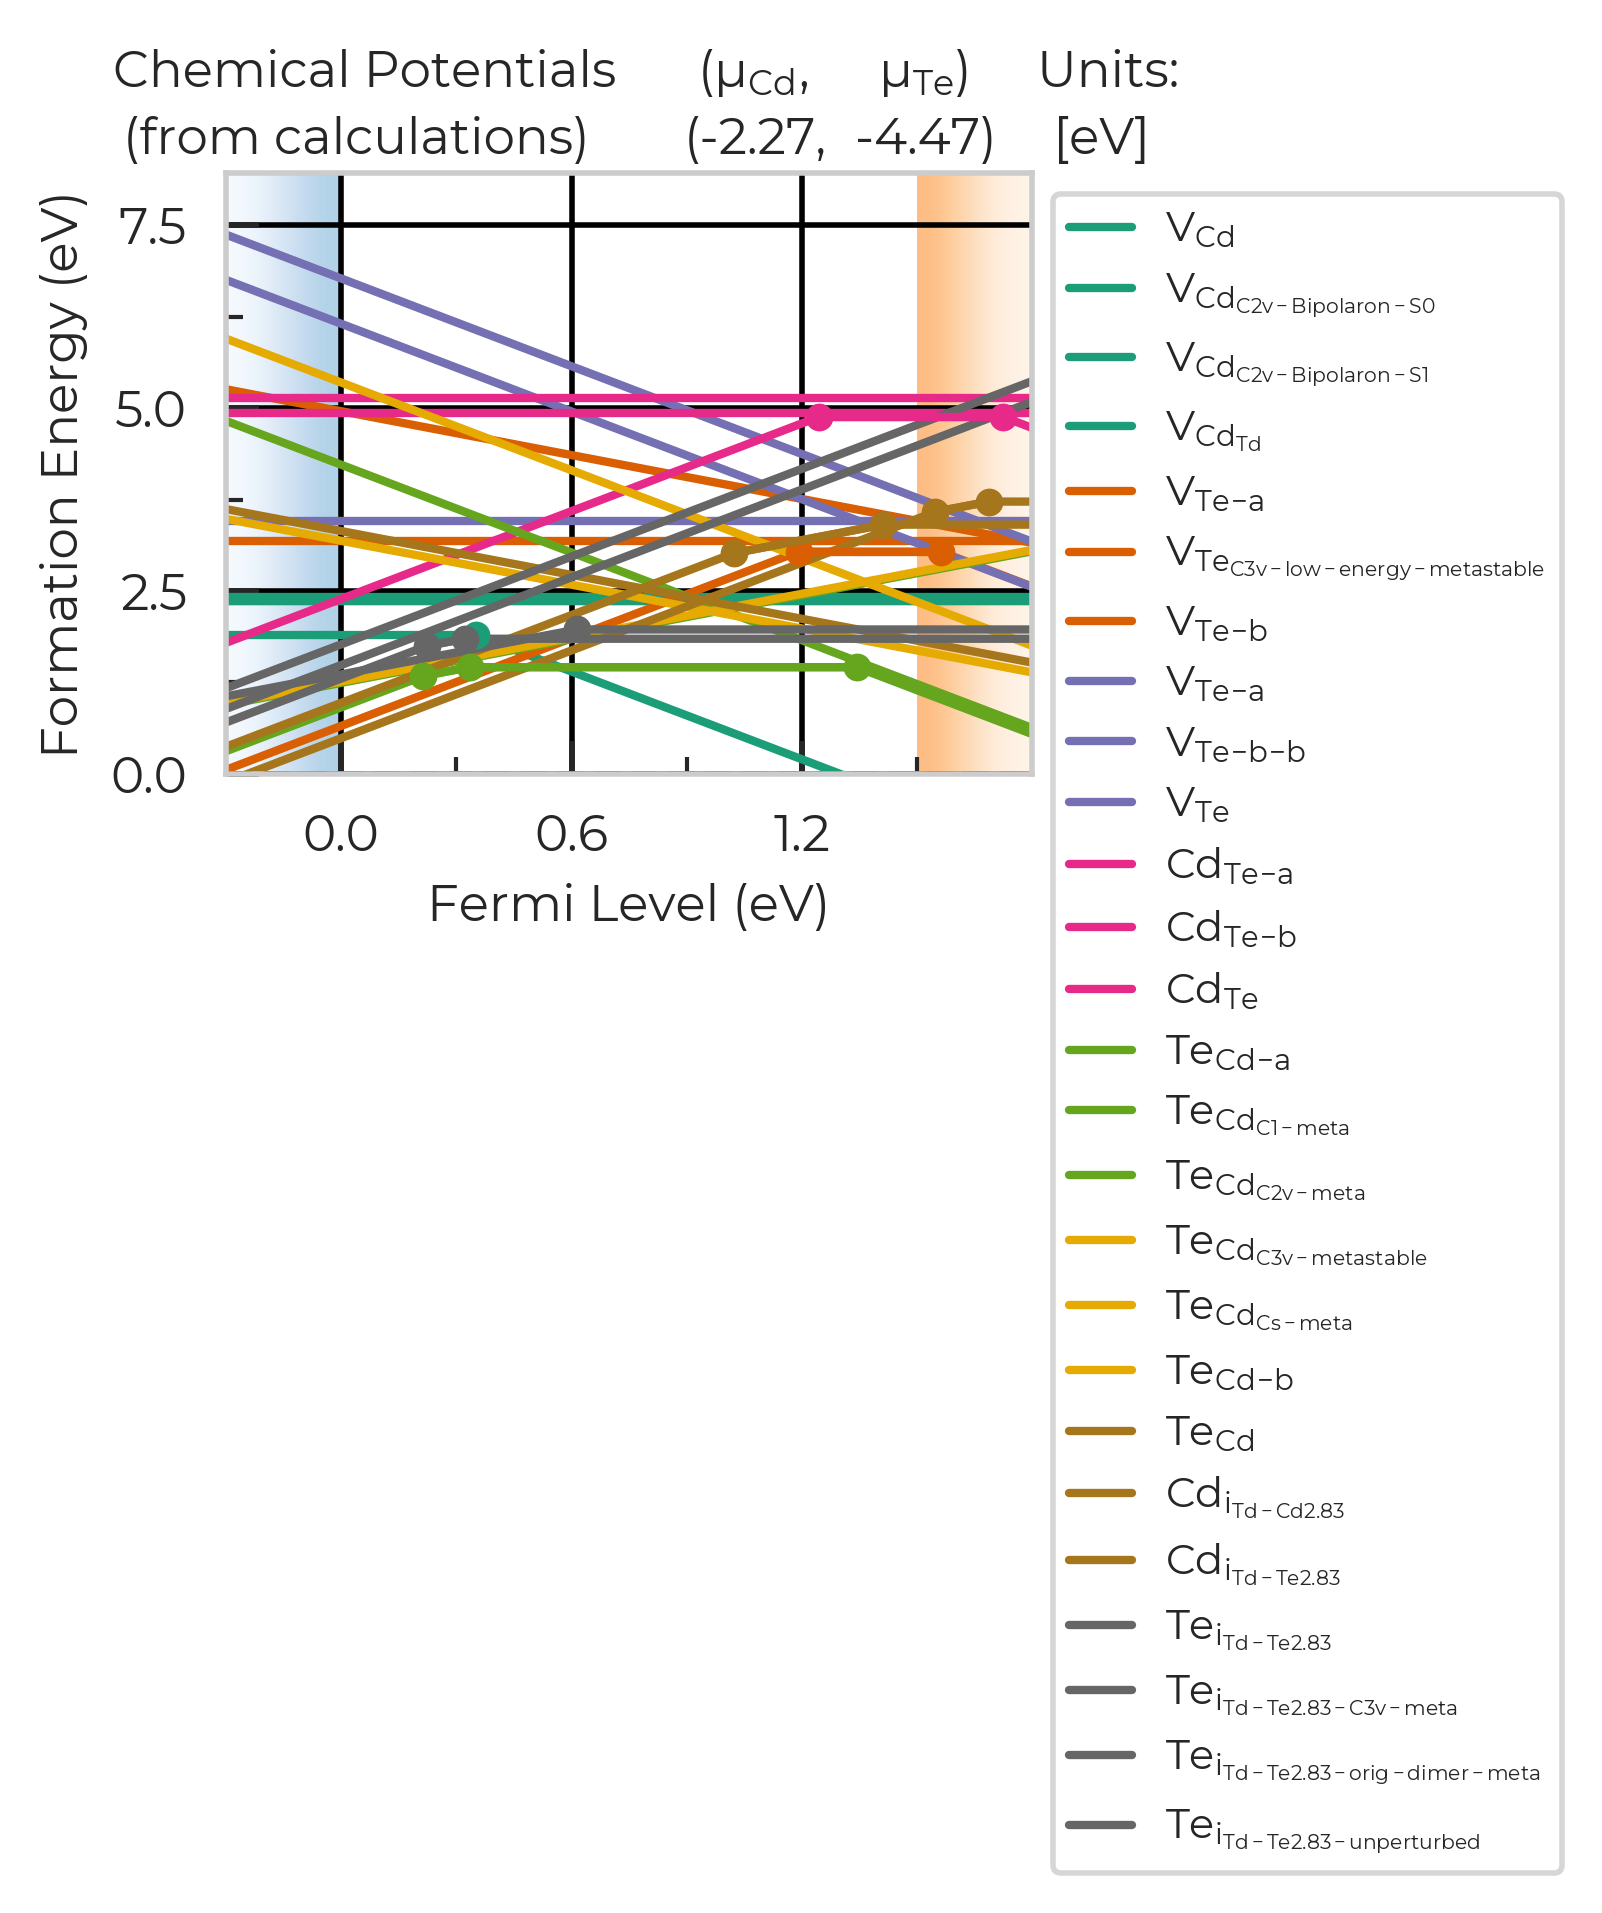

In [46]:
from doped import plotting
fig = plotting.formation_energy_plot(LZ_CdTe_dpd,
                               chempot_limits["facets"]["CdTe-Te"]
                               )

In [35]:
# degeneracies already set to manual ones, just check here:
count = 0
for name, defect_entry in LZ_CdTe_defects_dict.items():
    print(name, defect_entry.defect.multiplicity)
    count +=1
assert count >= 47 # check
print(count)

v_Cd_-2 1
Te_Cd_metastable1_-1 8
Cd_Te_0 12
Te_Cd_0 4
v_Te_1 1
Cd_Te_-1 1
v_Te_0 6
Cd_Te_1 6
Te_Cd_1 4
Te_Cd_C3v_metastable_1 4
Cd_i_Td_Te2.83_1 1
Cd_i_Td_Cd2.83_2 1
Te_Cd_-2 4
Cd_i_Td_Te2.83_0 1
v_Cd_C2v_Bipolaron_S0_0 6
v_Cd_0 6
Te_i_Td_Te2.83_unperturbed_1 12
Te_i_Td_Te2.83_unperturbed_0 6
Te_Cd_Cs_meta_-2 12
v_Te_orig_metastable_-1 12
Te_i_Td_Te2.83_2 4
v_Te_-2 6
Cd_Te_-2 12
v_Te_2 1
v_Cd_C2v_Bipolaron_S1_0 6
v_Cd_-1 4
Cd_Te_orig_C2v_0 6
Cd_Te_2 1
Te_Cd_2 1
v_Cd_Td_0 1
Cd_i_Td_Te2.83_2 1
Cd_i_Td_Cd2.83_1 1
Te_i_Td_Te2.83_C3v_meta_2 4
Cd_i_Td_Cd2.83_0 1
v_Te_shaken_-2 4
Te_Cd_-1 12
Te_i_Td_Te2.83_orig_dimer_meta_2 8
v_Te_C3v_low_energy_metastable_0 4
Te_Cd_C1_meta_-2 4
v_Te_unperturbed_-2 12
Te_i_Td_Te2.83_1 4
Te_Cd_metastable2_-1 8
Cd_Te_metastable_0 6
v_Te_-1 12
Te_i_Td_Te2.83_0 8
v_Te_orig_non_JT_distorted_0 1
Te_Cd_C2v_meta_1 6
47


In [26]:
import copy
manual_degeneracies_dpd = copy.deepcopy(LZ_CdTe_dpd)

In [27]:
def rename(name):
    return name[:-1] + f"{int(name[-1])+1}" if name[-1].isnumeric() else name+"_1"

In [28]:
from py_sc_fermi.defect_system import DefectSystem
from py_sc_fermi.defect_species import DefectSpecies
from py_sc_fermi.defect_charge_state import DefectChargeState

def generate_pyscfermi_defect_system(dpd, chempots, dos, volume, temperature=300, spin_pol=1, convergence_tolerance=1e-25, n_trial_steps=5000):
    defect_list = []

    for string in dpd.defect_types:
        name, indices_string = string.split("@")
        name = name.rsplit("_", 1)[0]  # name without charge state
        for defect_species in defect_list:
            if defect_species.name == name: # if a defect with the same name already exists in the list, due to having inequivalent sites for vacancies etc
                # rename to [name]_1, [name]_2 etc
                name = rename(name)
        indices = indices_string.split("-")
        charge_states_0 = {}
        charge_states = {}
        for i in indices:
            entry = dpd.entries[int(i)]
            e_form = dpd._formation_energy(entry, chemical_potentials=chempots)
            prev_charge_energy = charge_states_0.get(entry.charge_state, (None, None))[0] # only taking
            # lowest formation energies for each charge state, in case we have a metastable state for a certain charge state etc
            if prev_charge_energy is None or prev_charge_energy > e_form:
                charge_states_0[entry.charge_state] = (e_form, int((1+abs(
                    entry.charge_state%2))*entry.defect.multiplicity))
                # note we use multiplicity which should correspond to prim cell multiplicity!

        charge_state_list = [DefectChargeState(charge, tup[1], tup[0]) for charge, tup in
                                     charge_states_0.items()]
        defect_list.append(DefectSpecies(name, 1, {entry.charge : entry for entry in
                                                   charge_state_list})) # assuming
        # primitive cell volume here, with 1
        # defect site per primitive cell (and we've accounted for the orientation degeneracies for each charge state above)
       # print(charge_states)
        #print(defect_list)
    return DefectSystem(defect_list, dos, volume, temperature, convergence_tolerance, n_trial_steps)

In [48]:
CdTe_midpoint_chempots = {"Cd": -0.625-1.01586484, "Te": -0.625-4.47069234}
CdTe_LZ_midpoint_defect_system = generate_pyscfermi_defect_system(
    manual_degeneracies_dpd, CdTe_midpoint_chempots, pyscfermi_k181818_NKRED2_dos,
    cdte_prim_cell_volume,
    300)
print(CdTe_LZ_midpoint_defect_system)

DefectSystem
  nelect: 18 e
  bandgap: 1.497 eV
  volume: 70.0401764998796 A^3
  temperature: 300 K

Contains defect species:

v_Cd, nsites=1
  q=-2, e=3.225623089384454, deg=1
  q=-1, e=3.007744180833337, deg=8
  q=+0, e=2.524852420000008, deg=6

v_Cd_C2v_Bipolaron_S0, nsites=1
  q=+0, e=2.9890603700000105, deg=6

v_Cd_C2v_Bipolaron_S1, nsites=1
  q=+0, e=2.9856095800000224, deg=6

v_Cd_Td, nsites=1
  q=+0, e=3.041545350000013, deg=1

v_Te, nsites=1
  q=-2, e=5.534464017012062, deg=6
  q=-1, e=4.261146122435436, deg=24
  q=+0, e=2.4128724699999955, deg=6
  q=+1, e=1.9000545612734032, deg=2
  q=+2, e=0.030600390014875245, deg=1

v_Te_C3v_low_energy_metastable, nsites=1
  q=+0, e=2.5585802100000015, deg=4

v_Te_orig_metastable, nsites=1
  q=-1, e=4.332943082488386, deg=24

v_Te_orig_non_JT_distorted, nsites=1
  q=+0, e=2.8365675500000114, deg=1

v_Te_shaken, nsites=1
  q=-2, e=6.147250810855502, deg=4

v_Te_unperturbed, nsites=1
  q=-2, e=5.528666592044778, deg=12

Cd_Te, nsites=1
  q=-

In [41]:
defect_system = generate_pyscfermi_defect_system(
    manual_degeneracies_dpd, chempot_limits["facets"]["CdTe-Te"], pyscfermi_k181818_NKRED2_dos,
    cdte_prim_cell_volume,
    800)
print(defect_system)

DefectSystem
  nelect: 18 e
  bandgap: 1.497 eV
  volume: 70.0401764998796 A^3
  temperature: 800 K

Contains defect species:

v_Cd, nsites=1
  q=-2, e=2.599305706571954, deg=1
  q=-1, e=2.381426798020837, deg=8
  q=+0, e=1.898535037187508, deg=6

v_Cd_C2v_Bipolaron_S0, nsites=1
  q=+0, e=2.3627429871875103, deg=6

v_Cd_C2v_Bipolaron_S1, nsites=1
  q=+0, e=2.3592921971875223, deg=6

v_Cd_Td, nsites=1
  q=+0, e=2.415227967187513, deg=1

v_Te, nsites=1
  q=-2, e=6.159464017012062, deg=6
  q=-1, e=4.886146122435436, deg=24
  q=+0, e=3.0378724699999955, deg=6
  q=+1, e=2.525054561273403, deg=2
  q=+2, e=0.6556003900148752, deg=1

v_Te_C3v_low_energy_metastable, nsites=1
  q=+0, e=3.1835802100000015, deg=4

v_Te_orig_metastable, nsites=1
  q=-1, e=4.957943082488386, deg=24

v_Te_orig_non_JT_distorted, nsites=1
  q=+0, e=3.4615675500000114, deg=1

v_Te_shaken, nsites=1
  q=-2, e=6.772250810855502, deg=4

v_Te_unperturbed, nsites=1
  q=-2, e=6.153666592044778, deg=12

Cd_Te, nsites=1
  q=-2, 

In [116]:
2.3814-0.35 - 1.8985  # instability of V_Cd^-1 at (0/-2) V_Cd level

0.13290000000000002

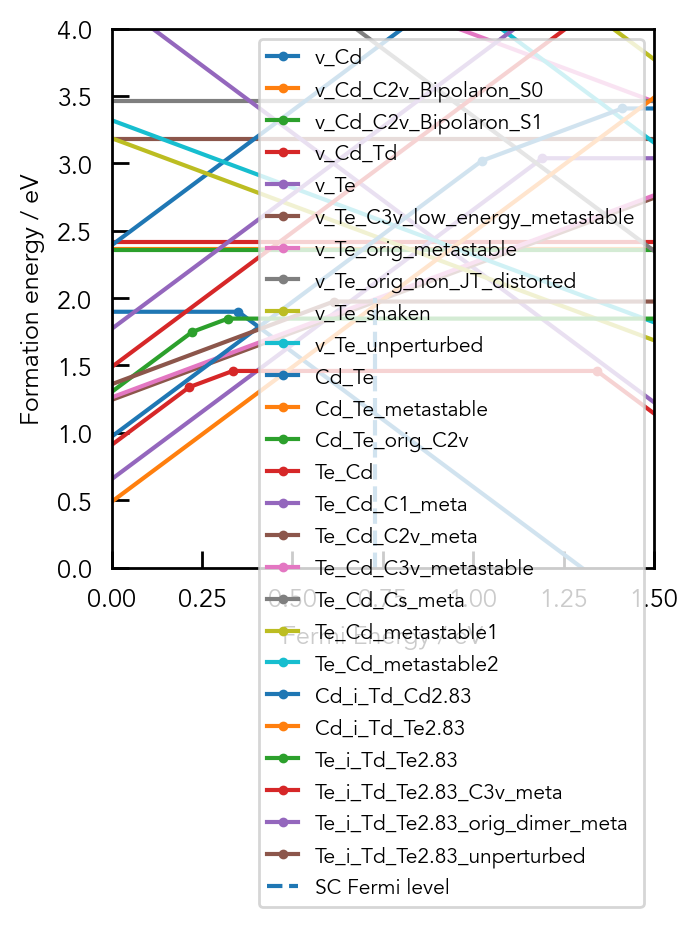

In [42]:
# Check: plot transition levels with py-sc-fermi ✅
plt.figure(dpi=200)
# get a dictionary of the lines for a transition level (TL) diagram where the key is the name of the DefectSpecies
# the values is a list of lists, where the first list is the x coordinates of the TL profile and the second list
# is the y coordinates of the TL profile
transition_levels = defect_system.get_transition_levels()

# get the self consistent Fermi energy to plot on the TL diagram
sc_fermi = defect_system.get_sc_fermi()[0]

# plot each defect species TL profile on the full diagram, and label as
# the defect species name
for k, v in transition_levels.items():
    plt.plot(v[0], v[1], "-o", label=k)

# plot the self consistent Fermi energy
plt.vlines(sc_fermi, 0, 2, linestyles="dashed", label = "SC Fermi level")

plt.ylim(0, 4)
plt.xlim(0, 1.5)
plt.legend()
plt.ylabel("Formation energy / eV")
plt.xlabel("Fermi Energy / eV")
plt.show()

In [43]:
defect_system.report()

Temperature :      800  (K)
SC Fermi level :      0.72746109797781  (eV)
Concentrations:
n (electrons)  : 19636472916726.254 cm^-3
p (holes)      : 1787141293752975.5 cm^-3
v_Cd           : 886208380887214.4 cm^-3, (percentage of defective sites: 6.21e-06 %)
v_Cd_C2v_Bipolaron_S0      : 111732190.41598138 cm^-3, (percentage of defective sites: 7.83e-13 %)
v_Cd_C2v_Bipolaron_S1      : 117467393.71489199 cm^-3, (percentage of defective sites: 8.23e-13 %)
v_Cd_Td        : 8697335.851280743 cm^-3, (percentage of defective sites: 6.09e-14 %)
v_Te           : 722685700.6821709 cm^-3, (percentage of defective sites: 5.06e-12 %)
v_Te_C3v_low_energy_metastable      : 502.3890235350543 cm^-3, (percentage of defective sites: 3.52e-18 %)
v_Te_orig_metastable      : 0.0007655974631236963 cm^-3, (percentage of defective sites: 5.36e-24 %)
v_Te_orig_non_JT_distorted      : 2.227085989812506 cm^-3, (percentage of defective sites: 1.56e-20 %)
v_Te_shaken      : 1.8155859442373955e-11 cm^-3, (percentage

We plot to 1400 K because that's the melting point of CdTe: https://en.wikipedia.org/wiki/Cadmium_telluride

## Te-Rich

In [35]:
import copy

anneal_temperatures = np.arange(200, 1401, 50)

annealed_scfermi_levels = []; cooled_scfermi_levels = []
annealed_n = []; cooled_n = []
annealed_p = []; cooled_p = []
annealed_vcd = []; cooled_vcd = []
annealed_intcdte = []; cooled_intcdte = []
annealed_intcdcd = []; cooled_intcdcd = []
annealed_intte = []; cooled_intte = []
annealed_tecd = []; cooled_tecd = []
annealed_cdte = []; cooled_cdte = []
annealed_vte = []; cooled_vte = []

# generating defect species:
CdTe_LZ_Te_Rich_defect_system = generate_pyscfermi_defect_system(
    manual_degeneracies_dpd, chempot_limits["facets"]["CdTe-Te"],
                                 pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, 100)

annealed_defect_system = copy.deepcopy(CdTe_LZ_Te_Rich_defect_system)

for anneal_temp in anneal_temperatures:
    annealed_defect_system.temperature = anneal_temp
    annealed_defect_system_data = annealed_defect_system.concentration_dict()
    annealed_scfermi_levels.append(annealed_defect_system.get_sc_fermi()[0])
    annealed_n.append(annealed_defect_system_data["n0"])
    annealed_p.append(annealed_defect_system_data["p0"])
    annealed_vcd.append(annealed_defect_system_data["v_Cd"])
    annealed_intcdte.append(annealed_defect_system_data["Cd_i_Td_Te2.83"])
    annealed_intcdcd.append(annealed_defect_system_data["Cd_i_Td_Cd2.83"])
    annealed_intte.append(annealed_defect_system_data["Te_i_Td_Te2.83"])
    annealed_tecd.append(annealed_defect_system_data["Te_Cd"])
    annealed_cdte.append(annealed_defect_system_data["Cd_Te"])
    annealed_vte.append(annealed_defect_system_data["v_Te"])

    cooled_defect_system = copy.deepcopy(CdTe_LZ_Te_Rich_defect_system)
    cooled_defect_system.temperature = 300

    for defect_species in annealed_defect_system.defect_species:
        cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
            annealed_defect_system_data[defect_species.name] / 1e24 * annealed_defect_system.volume)

    cooled_defect_system_data = cooled_defect_system.concentration_dict()
    cooled_scfermi_levels.append(cooled_defect_system.get_sc_fermi()[0])
    cooled_n.append(cooled_defect_system_data["n0"])
    cooled_p.append(cooled_defect_system_data["p0"])
    cooled_vcd.append(annealed_defect_system_data["v_Cd"])
    cooled_intcdte.append(annealed_defect_system_data["Cd_i_Td_Te2.83"])
    cooled_intcdcd.append(annealed_defect_system_data["Cd_i_Td_Cd2.83"])
    cooled_intte.append(annealed_defect_system_data["Te_i_Td_Te2.83"])
    cooled_tecd.append(annealed_defect_system_data["Te_Cd"])
    cooled_cdte.append(annealed_defect_system_data["Cd_Te"])
    cooled_vte.append(annealed_defect_system_data["v_Te"])

                        electron and hole concentrations. This is likely a natural result of the use of
                        a numerical solver for the Fermi energy search. This can likely be ignored
                        though you should always check the final results are reasonable.


In [36]:
import matplotlib  # if seaborn previously loaded, its plotting style remains for some reason
matplotlib.rc_file_defaults()

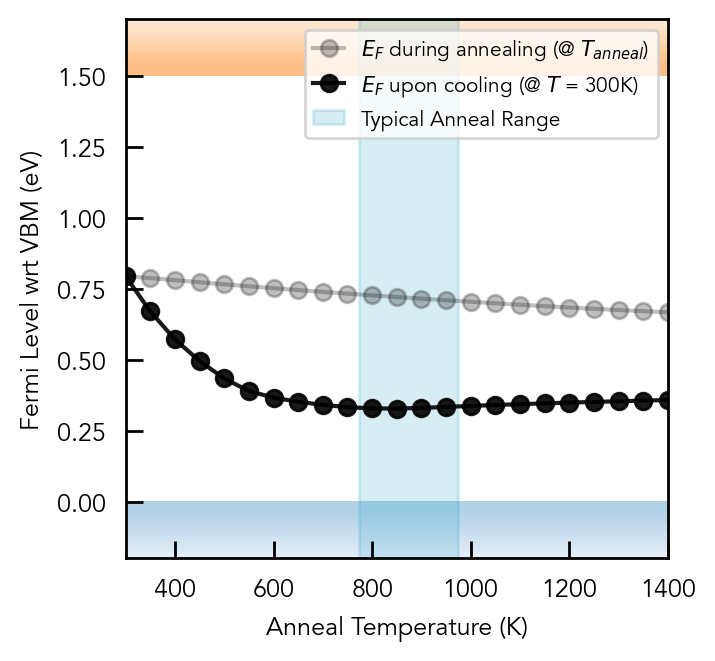

In [173]:
import matplotlib.pyplot as plt

plt.style.use("../Packages/publication_style.mplstyle")
f,ax = plt.subplots(dpi=200)
ax.plot(anneal_temperatures, annealed_scfermi_levels, marker='o',
        label="$E_F$ during annealing (@ $T_{anneal}$)", color = "k", alpha=0.25)
ax.plot(anneal_temperatures, cooled_scfermi_levels, marker='o',
        label="$E_F$ upon cooling (@ $T$ = 300K)", color = "k", alpha=0.9)
ax.set_xlabel('Anneal Temperature (K)')
ax.set_ylabel('Fermi Level wrt VBM (eV)')
ax.set_xlim(300, 1400)
ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC', label="Typical Anneal Range")
ax.legend()

# show VB in blue from -0.3 to 0 eV:
ax.imshow(
    [(1, 1), (0, 0)],
    cmap=plt.cm.Blues,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], -0.3, 0),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
    )

ax.imshow(
    [(0, 0,), (1, 1)],
    cmap=plt.cm.Oranges,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], 1.5, 1.8),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
)
ax.set_ylim(-0.2, 1.7)
plt.show()
# f.savefig("CdTe_LZ_Te_rich_Fermi_levels_annealing_and_cooling.pdf", dpi=500, bbox_inches='tight')

In [28]:
np.mean(cooled_scfermi_levels[12:16])  # midpoint of 500-700 degrees C (+273.15 -> K);
# SC Fermi for typical anneal temperature

0.330550791085927

In [163]:
np.mean(anneal_temperatures[12:16])  # midpoint of 500-700 degrees C (+273.15 -> K)

875.0

Could show one plot of the defect concentrations under annealing and cooling, to illustrate the frozen
defect approximation and how it works

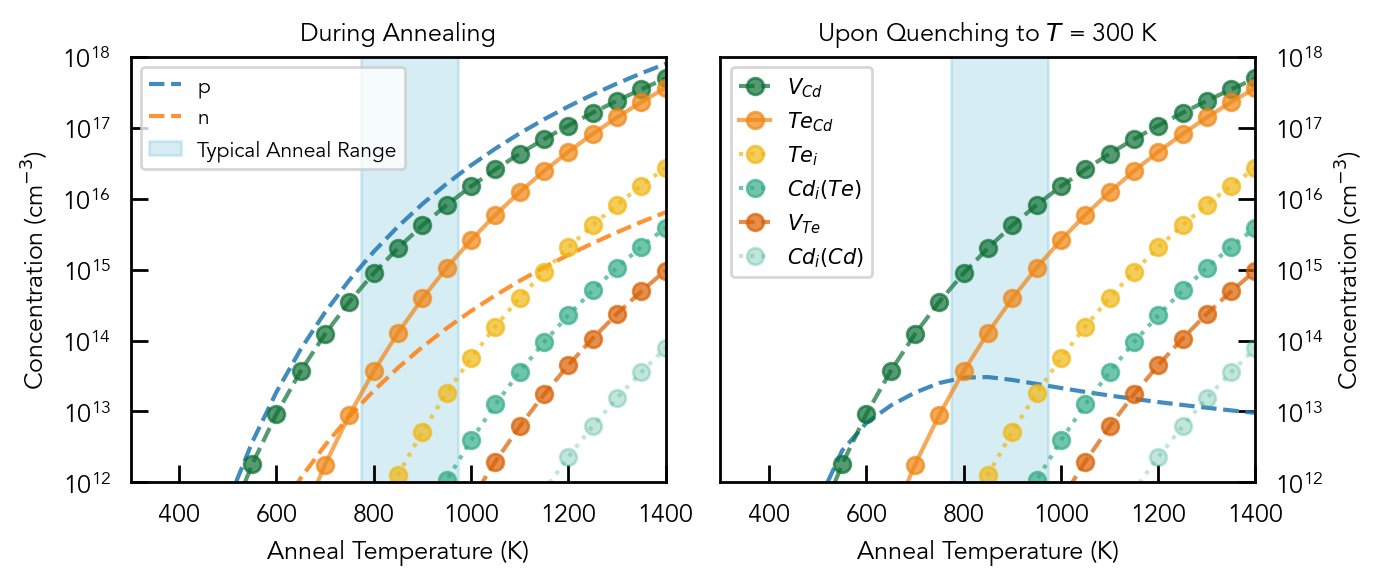

In [164]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,2, dpi=200, figsize=(7,3))

ax[0].plot(anneal_temperatures, annealed_p, label='p', alpha=0.85, linestyle="--")  # p first in blue
ax[0].plot(anneal_temperatures, annealed_n, label='n', alpha=0.85, linestyle="--")

ax[0].plot(anneal_temperatures, annealed_vcd, marker='o', #label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_tecd, marker='o', #label=r"$Te_{Cd}$",
           c="#F08613", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_intte, marker='o', #label=f"$Te_i$",
           linestyle=":", c="#F0B713", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_intcdte, marker='o', #label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_vte, marker='o', #label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_intcdcd, marker='o', #label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
# ax[0].plot(anneal_temperatures, cooled_cdte, marker='o', label=r"$Cd_{Te}$", c="#66A61E", alpha=0.7)

ax[1].plot(anneal_temperatures, cooled_p, alpha=0.85, linestyle="--") # label='p',   # p first in blue
ax[1].plot(anneal_temperatures, cooled_n, alpha=0.85, linestyle="--") # label='n',
ax[1].plot(anneal_temperatures, cooled_vcd, marker='o', label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_tecd, marker='o', label=r"$Te_{Cd}$",
           c="#F08613", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_intte, marker='o', label=f"$Te_i$",
           linestyle=":", c="#F0B713", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_intcdte, marker='o', label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_vte, marker='o', label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_intcdcd, marker='o', label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
# ax[1].plot(anneal_temperatures, cooled_cdte, marker='o', label=r"$Cd_{Te}$", alpha=0.7)
ax[0].set_title("During Annealing")
ax[1].set_title("Upon Quenching to $T$ = 300 K")
ax[0].axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC', label="Typical Anneal Range")
ax[1].axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC')

for axis in ax:
    axis.set_xlabel('Anneal Temperature (K)')
    axis.set_ylabel(r"Concentration (cm$^{-3}$)")
    axis.set_yscale("log")
    axis.set_xlim(300, 1400)
    axis.set_ylim(1e12, 1e18)
    # typical anneal range is 500 - 700, so shade in this region:

ax[0].legend()
ax[1].legend()
# put yaxis ticks, labels and title on right side of second plot
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.tight_layout()
plt.savefig("CdTe_LZ_Te_rich_defect_concentrations_annealing_and_cooling.pdf", dpi=500,
            bbox_inches='tight')

Note $Cd_{Te}$ not visible because so low concentration

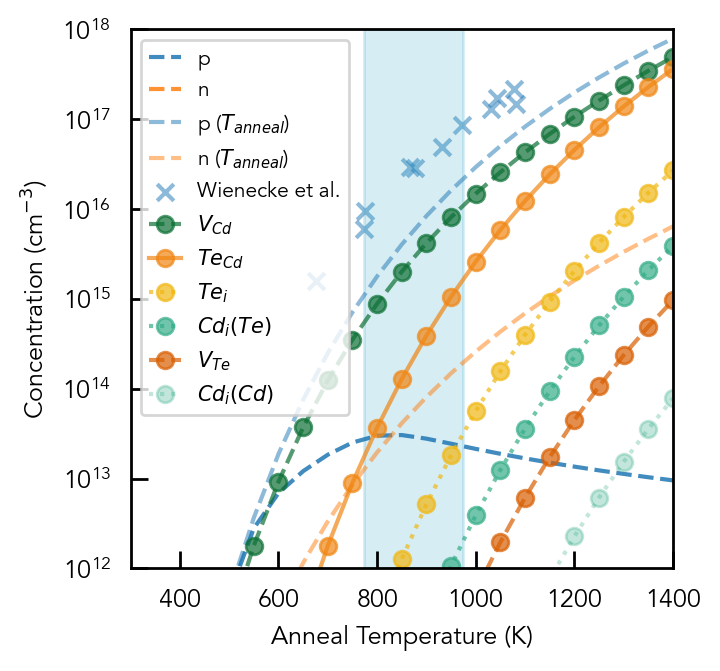

In [41]:
# just cooled concentrations for combined plot:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(dpi=200)

ax.plot(anneal_temperatures, cooled_p, label='p', alpha=0.85, linestyle="--")  # p first in blue
ax.plot(anneal_temperatures, cooled_n, label='n', alpha=0.85, linestyle="--")

wienecke_data = np.array([
[675.644735186816, 15.19509584755584],
[774.64775443452, 15.983458618047331],
[773.2859479179771, 15.780402388747808],
[876.594540193735, 16.456749859094277],
[866.7316643602969, 16.470175483037483],
[931.3592904767895, 16.68944378653258],
[972.2040508240029, 16.939464368267398],
[1043.955214492389, 17.234473455894925],
[1030.0320795068562, 17.11399747952909],
[1077.6449867907913, 17.335494943226077],
[1082.4820732167568, 17.165318826904443],
    ])

ax.plot(anneal_temperatures, annealed_p, label='p ($T_{anneal}$)', alpha=0.5, c = "C0", linestyle="--")
ax.plot(anneal_temperatures, annealed_n, label='n ($T_{anneal}$)', alpha=0.5, c = "C1", linestyle="--")

ax.scatter(wienecke_data[:,0], 10**(wienecke_data[:,1]), marker="x", label="Wienecke et al.", c="C0",
           alpha=0.5)

ax.plot(anneal_temperatures, cooled_vcd, marker='o', label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax.plot(anneal_temperatures, cooled_tecd, marker='o', label=r"$Te_{Cd}$",
           c="#F08613", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intte, marker='o', label=f"$Te_i$",
           linestyle=":", c="#F0B713", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intcdte, marker='o', label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax.plot(anneal_temperatures, cooled_vte, marker='o', label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intcdcd, marker='o', label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
# ax[1].plot(anneal_temperatures, cooled_cdte, marker='o', label=r"$Cd_{Te}$", alpha=0.7)

ax.set_xlabel('Anneal Temperature (K)')
ax.set_ylabel(r"Concentration (cm$^{-3}$)")
ax.set_yscale("log")
ax.set_xlim(300, 1400)
ax.set_ylim(1e12, 1e18)
# typical anneal range is 500 - 700, so shade in this region:
ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC')
ax.legend()

# plt.savefig("CdTe_LZ_Te_rich_defect_concentrations_cooled.pdf", dpi=500,
#             bbox_inches='tight')

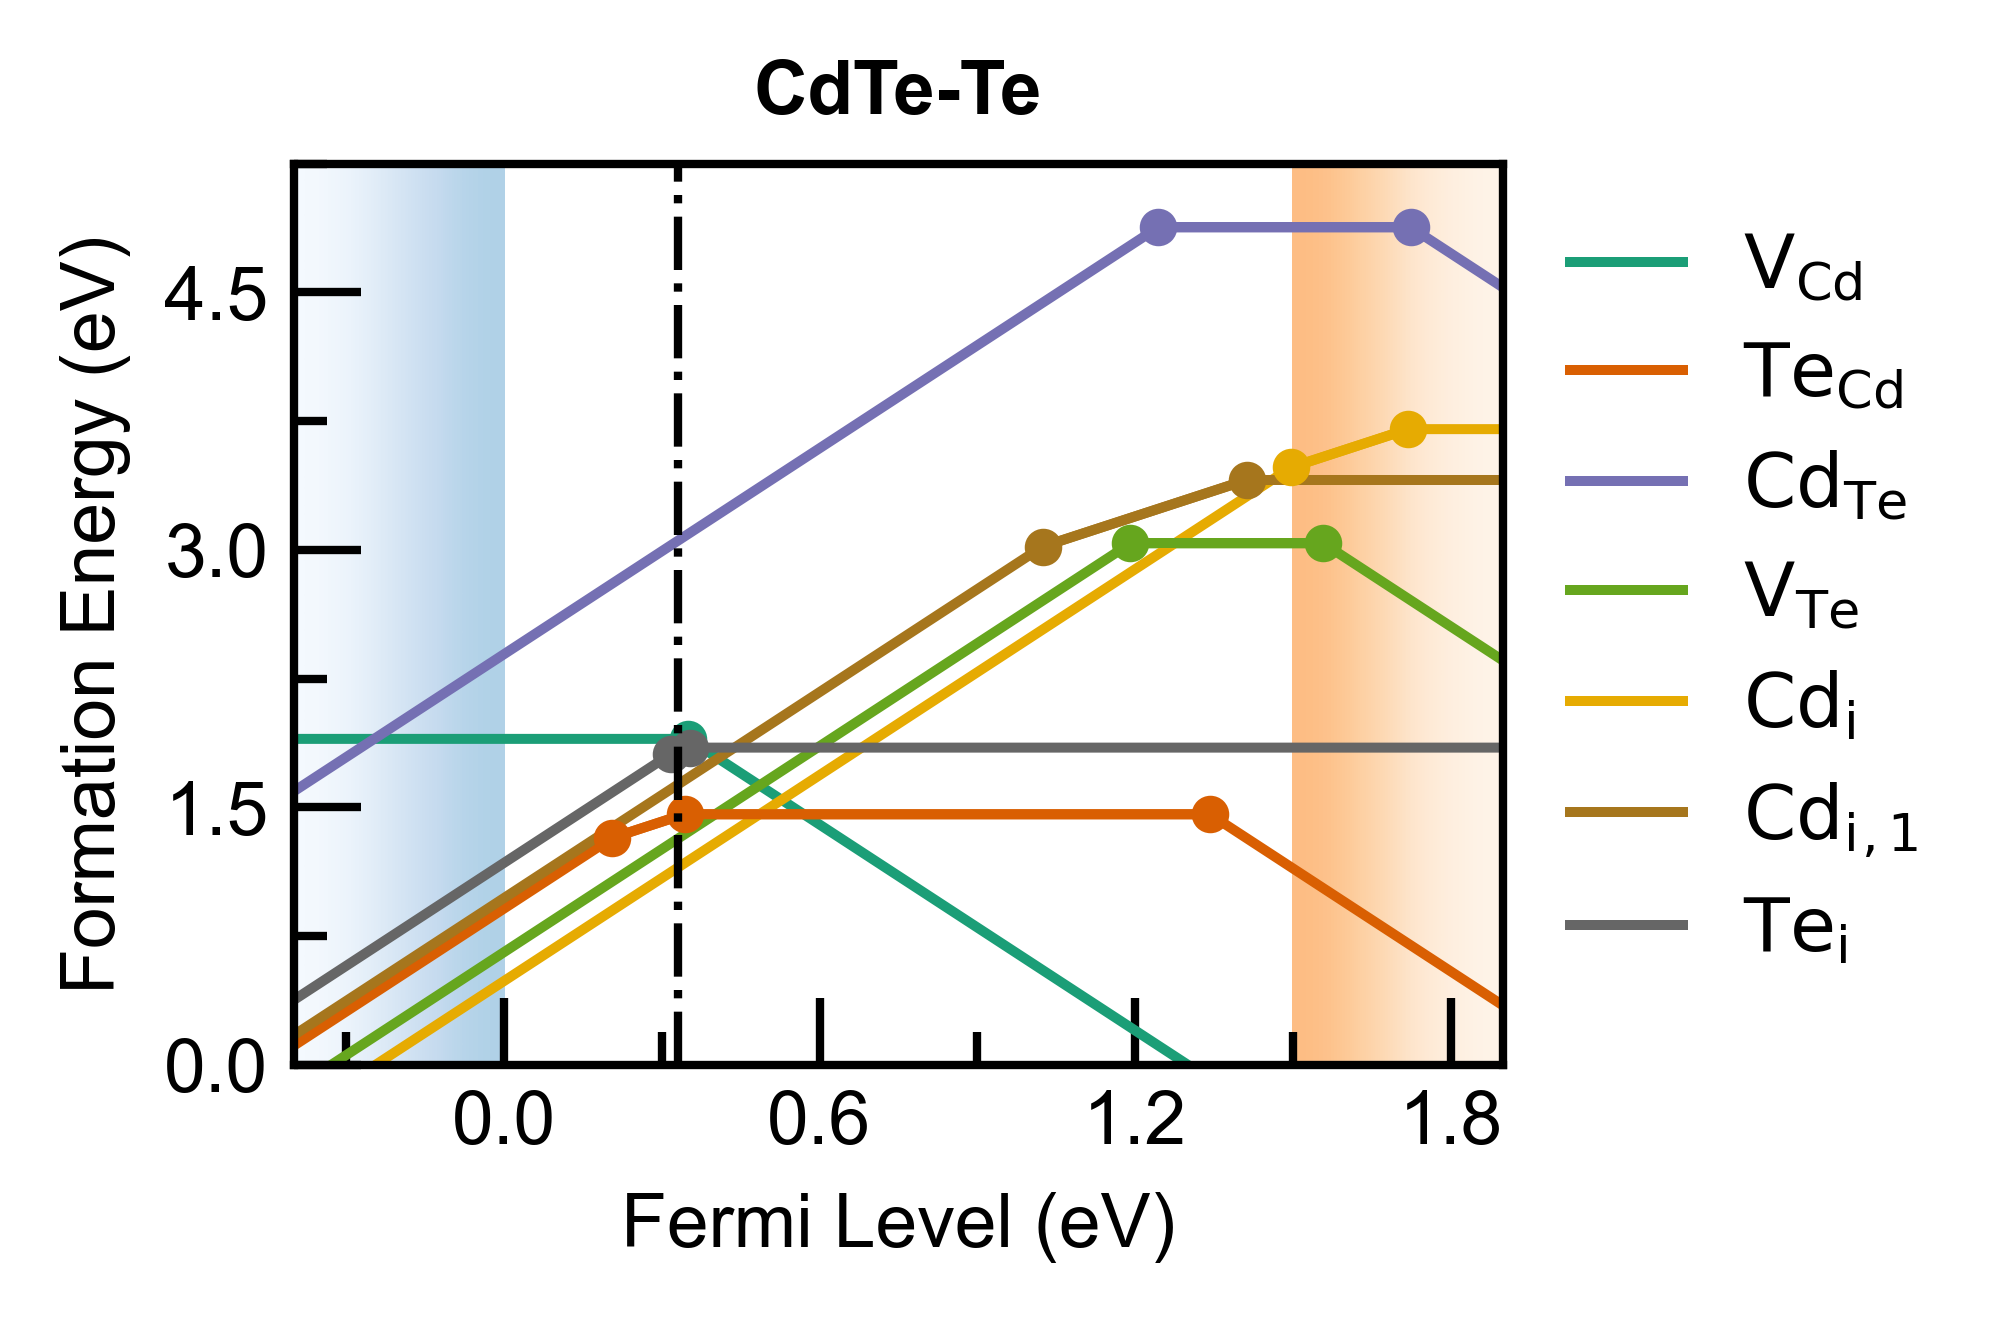

In [204]:
from doped import plotting
plt = plotting.formation_energy_plot(LZ_CdTe_dpd,
                                     chempot_limits,
                                     fermi_level=0.33,
                                     chempot_table=False,
                                     pd_facets=["CdTe-Te"],
                                     ylim=(0, 5.25),
                                     filename="CdTe_LZ_Te_rich_w_RT_SC_Fermi_from_875K.pdf")

## Cd-Rich

In [42]:
defect_system = generate_pyscfermi_defect_system(
    manual_degeneracies_dpd, chempot_limits["facets"]["Cd-CdTe"], pyscfermi_k181818_NKRED2_dos,
    cdte_prim_cell_volume,
    800)
print(defect_system)

DefectSystem
  nelect: 18 e
  bandgap: 1.497 eV
  volume: 70.0401764998796 A^3
  temperature: 800 K

Contains defect species:

v_Cd, nsites=1
  q=-2, e=3.850623089384454, deg=1
  q=-1, e=3.632744180833337, deg=8
  q=+0, e=3.149852420000008, deg=6

v_Cd_C2v_Bipolaron_S0, nsites=1
  q=+0, e=3.6140603700000105, deg=6

v_Cd_C2v_Bipolaron_S1, nsites=1
  q=+0, e=3.6106095800000224, deg=6

v_Cd_Td, nsites=1
  q=+0, e=3.666545350000013, deg=1

v_Te, nsites=1
  q=-2, e=4.90814663419956, deg=6
  q=-1, e=3.6348287396229364, deg=24
  q=+0, e=1.7865550871874953, deg=6
  q=+1, e=1.273737178460903, deg=2
  q=+2, e=-0.5957169927976249, deg=1

v_Te_C3v_low_energy_metastable, nsites=1
  q=+0, e=1.9322628271875013, deg=4

v_Te_orig_metastable, nsites=1
  q=-1, e=3.7066256996758864, deg=24

v_Te_orig_non_JT_distorted, nsites=1
  q=+0, e=2.210250167187511, deg=1

v_Te_shaken, nsites=1
  q=-2, e=5.5209334280430005, deg=4

v_Te_unperturbed, nsites=1
  q=-2, e=4.902349209232276, deg=12

Cd_Te, nsites=1
  q=-2

In [43]:
import copy

anneal_temperatures = np.arange(200, 1401, 50)

annealed_scfermi_levels = []; cooled_scfermi_levels = []
annealed_n = []; cooled_n = []
annealed_p = []; cooled_p = []
annealed_vcd = []; cooled_vcd = []
annealed_intcdte = []; cooled_intcdte = []
annealed_intcdcd = []; cooled_intcdcd = []
annealed_intte = []; cooled_intte = []
annealed_tecd = []; cooled_tecd = []
annealed_cdte = []; cooled_cdte = []
annealed_vte = []; cooled_vte = []

# generating defect species:
CdTe_LZ_Cd_Rich_defect_system = generate_pyscfermi_defect_system(
    manual_degeneracies_dpd, chempot_limits["facets"]["Cd-CdTe"],
                                 pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, 100)

annealed_defect_system = copy.deepcopy(CdTe_LZ_Cd_Rich_defect_system)

for anneal_temp in anneal_temperatures:
    annealed_defect_system.temperature = anneal_temp
    annealed_defect_system_data = annealed_defect_system.concentration_dict()
    annealed_scfermi_levels.append(annealed_defect_system.get_sc_fermi()[0])
    annealed_n.append(annealed_defect_system_data["n0"])
    annealed_p.append(annealed_defect_system_data["p0"])
    annealed_vcd.append(annealed_defect_system_data["v_Cd"])
    annealed_intcdte.append(annealed_defect_system_data["Cd_i_Td_Te2.83"])
    annealed_intcdcd.append(annealed_defect_system_data["Cd_i_Td_Cd2.83"])
    annealed_intte.append(annealed_defect_system_data["Te_i_Td_Te2.83"])
    annealed_tecd.append(annealed_defect_system_data["Te_Cd"])
    annealed_cdte.append(annealed_defect_system_data["Cd_Te"])
    annealed_vte.append(annealed_defect_system_data["v_Te"])

    cooled_defect_system = copy.deepcopy(CdTe_LZ_Cd_Rich_defect_system)
    cooled_defect_system.temperature = 300

    for defect_species in annealed_defect_system.defect_species:
        cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
            annealed_defect_system_data[defect_species.name] / 1e24 * annealed_defect_system.volume)

    cooled_defect_system_data = cooled_defect_system.concentration_dict()
    cooled_scfermi_levels.append(cooled_defect_system.get_sc_fermi()[0])
    cooled_n.append(cooled_defect_system_data["n0"])
    cooled_p.append(cooled_defect_system_data["p0"])
    cooled_vcd.append(annealed_defect_system_data["v_Cd"])
    cooled_intcdte.append(annealed_defect_system_data["Cd_i_Td_Te2.83"])
    cooled_intcdcd.append(annealed_defect_system_data["Cd_i_Td_Cd2.83"])
    cooled_intte.append(annealed_defect_system_data["Te_i_Td_Te2.83"])
    cooled_tecd.append(annealed_defect_system_data["Te_Cd"])
    cooled_cdte.append(annealed_defect_system_data["Cd_Te"])
    cooled_vte.append(annealed_defect_system_data["v_Te"])

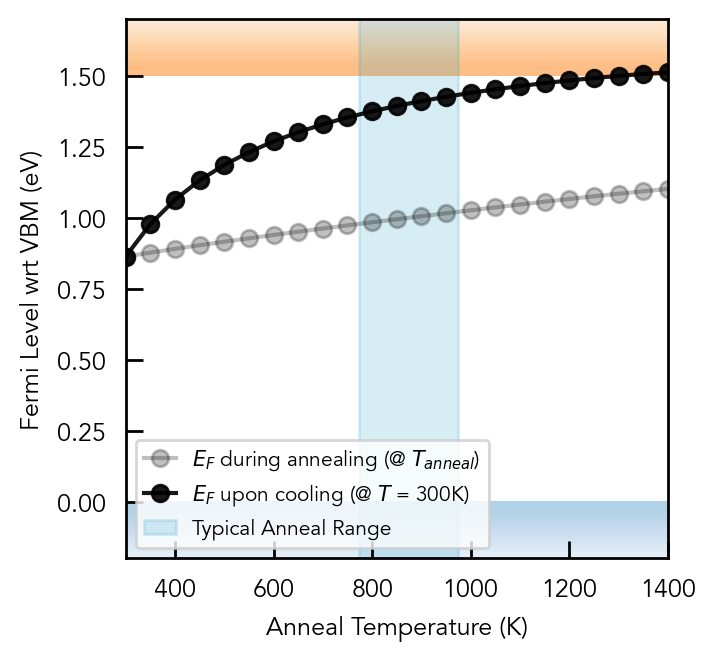

In [170]:
plt.style.use("../Packages/publication_style.mplstyle")
f,ax = plt.subplots(dpi=200)
ax.plot(anneal_temperatures, annealed_scfermi_levels, marker='o',
        label="$E_F$ during annealing (@ $T_{anneal}$)", color = "k", alpha=0.25)
ax.plot(anneal_temperatures, cooled_scfermi_levels, marker='o',
        label="$E_F$ upon cooling (@ $T$ = 300K)", color = "k", alpha=0.9)
ax.set_xlabel('Anneal Temperature (K)')
ax.set_ylabel('Fermi Level wrt VBM (eV)')
ax.set_xlim(300, 1400)
ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC', label="Typical Anneal Range")
ax.legend()

# show VB in blue from -0.3 to 0 eV:
ax.imshow(
    [(1, 1), (0, 0)],
    cmap=plt.cm.Blues,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], -0.3, 0),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
    )

ax.imshow(
    [(0, 0,), (1, 1)],
    cmap=plt.cm.Oranges,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], 1.5, 1.8),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
)
ax.set_ylim(-0.2, 1.7)
f.savefig("CdTe_LZ_Cd_rich_Fermi_levels_annealing_and_cooling.pdf", dpi=500, bbox_inches='tight')
plt.show()

Side-by-side, defect TLD (with sc Fermi level), Fermi level change, defect concentrations (x2 for Cd and
 Te rich)

So Pan et al also found $Cd_i$ lower energy than $V_{Te}$ and a similar n-type carrier concentration.
Has also been shown in some experimental cases

In [34]:
np.mean(cooled_scfermi_levels[12:16])  # midpoint of 500-700 degrees C (+273.15 -> K);
# SC Fermi for typical anneal temperature

1.4027534728986508

In [190]:
np.mean(anneal_temperatures[12:16])  # midpoint of 500-700 degrees C (+273.15 -> K)

875.0

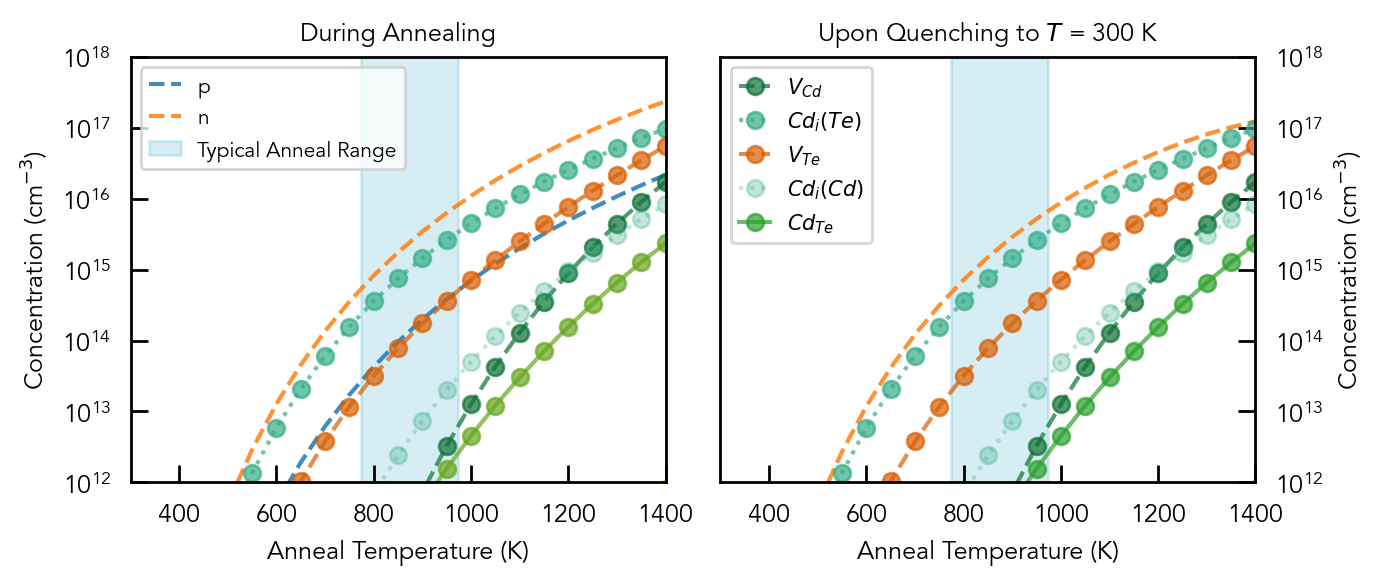

In [52]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,2, dpi=200, figsize=(7,3))

ax[0].plot(anneal_temperatures, annealed_p, label='p', alpha=0.85, linestyle="--")  # p first in blue
ax[0].plot(anneal_temperatures, annealed_n, label='n', alpha=0.85, linestyle="--")

ax[0].plot(anneal_temperatures, annealed_vcd, marker='o', #label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_tecd, marker='o', #label=r"$Te_{Cd}$",
           c="#F08613", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_intte, marker='o', #label=f"$Te_i$",
           linestyle=":", c="#F0B713", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_intcdte, marker='o', #label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_vte, marker='o', #label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax[0].plot(anneal_temperatures, annealed_intcdcd, marker='o', #label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
ax[0].plot(anneal_temperatures, cooled_cdte, marker='o', c="#66A61E", alpha=0.7)  # label=r"$Cd_{Te}$",

ax[1].plot(anneal_temperatures, cooled_p, alpha=0.85, linestyle="--") # label='p',   # p first in blue
ax[1].plot(anneal_temperatures, cooled_n, alpha=0.85, linestyle="--") # label='n',
ax[1].plot(anneal_temperatures, cooled_vcd, marker='o', label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_tecd, marker='o',# label=r"$Te_{Cd}$",
           c="#F08613", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_intte, marker='o', #label=f"$Te_i$",
           linestyle=":", c="#F0B713", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_intcdte, marker='o', label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_vte, marker='o', label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax[1].plot(anneal_temperatures, cooled_intcdcd, marker='o', label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
ax[1].plot(anneal_temperatures, cooled_cdte, marker='o', label=r"$Cd_{Te}$", alpha=0.7)
ax[0].set_title("During Annealing")
ax[1].set_title("Upon Quenching to $T$ = 300 K")
ax[0].axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC', label="Typical Anneal Range")
ax[1].axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC')

for axis in ax:
    axis.set_xlabel('Anneal Temperature (K)')
    axis.set_ylabel(r"Concentration (cm$^{-3}$)")
    axis.set_yscale("log")
    axis.set_xlim(300, 1400)
    axis.set_ylim(1e12, 1e18)
    # typical anneal range is 500 - 700, so shade in this region:

ax[0].legend()
ax[1].legend()
# put yaxis ticks, labels and title on right side of second plot
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.tight_layout()
# plt.savefig("CdTe_LZ_Cd_rich_defect_concentrations_annealing_and_cooling.pdf", dpi=500,
#             bbox_inches='tight')

Note $Te_{Cd}$ and $Te_i$ not visible because so low concentration

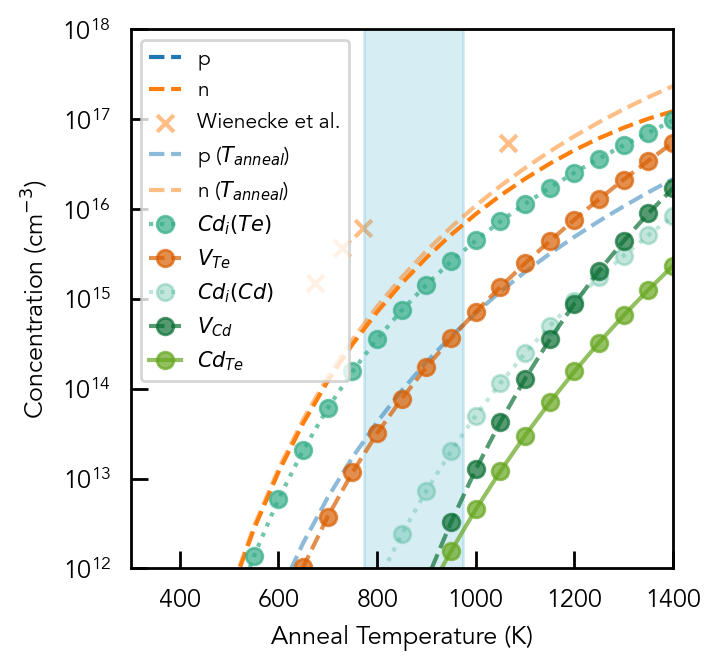

In [45]:
# just cooled concentrations for combined plot:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(dpi=200)

ax.plot(anneal_temperatures, cooled_p, label='p', linestyle="--")  # p first in blue
ax.plot(anneal_temperatures, cooled_n, label='n', linestyle="--")

wienecke_data = np.array([
[673.391828063177, 15.178617885065655],
[727.7574926746233, 15.561823650495894],
[770.8375293177492, 15.790761254044975],
[1065.5008868416094, 16.73057385017732],
    ])
ax.scatter(wienecke_data[:,0], 10**(wienecke_data[:,1]), marker="x", label="Wienecke et al.", c="C1",
           alpha=0.5)

ax.plot(anneal_temperatures, annealed_p, label='p ($T_{anneal}$)', alpha=0.5, c = "C0", linestyle="--")
ax.plot(anneal_temperatures, annealed_n, label='n ($T_{anneal}$)', alpha=0.5, c = "C1", linestyle="--")

# plot in order of concentration in anneal range:
# ax.plot(anneal_temperatures, cooled_tecd, marker='o', label=r"$Te_{Cd}$",
#            c="#F08613", alpha=0.7)
# ax.plot(anneal_temperatures, cooled_intte, marker='o', label=f"$Te_i$",
#            linestyle=":", c="#F0B713", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intcdte, marker='o', label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax.plot(anneal_temperatures, cooled_vte, marker='o', label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intcdcd, marker='o', label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
ax.plot(anneal_temperatures, cooled_vcd, marker='o', label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax.plot(anneal_temperatures, cooled_cdte, marker='o', label=r"$Cd_{Te}$", alpha=0.7, c="#66A61E")
# typical anneal range is 500 - 700, so shade in this region:
ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC')

ax.set_xlabel('Anneal Temperature (K)')
ax.set_ylabel(r"Concentration (cm$^{-3}$)")
ax.set_yscale("log")
ax.set_xlim(300, 1400)
ax.set_ylim(1e12, 1e18)
ax.legend()

# plt.savefig("CdTe_LZ_Cd_rich_defect_concentrations_cooled.pdf", dpi=500,
#             bbox_inches='tight')

<Axes: title={'center': 'Cd-CdTe'}, xlabel='Fermi Level (eV)', ylabel='Formation Energy (eV)'>

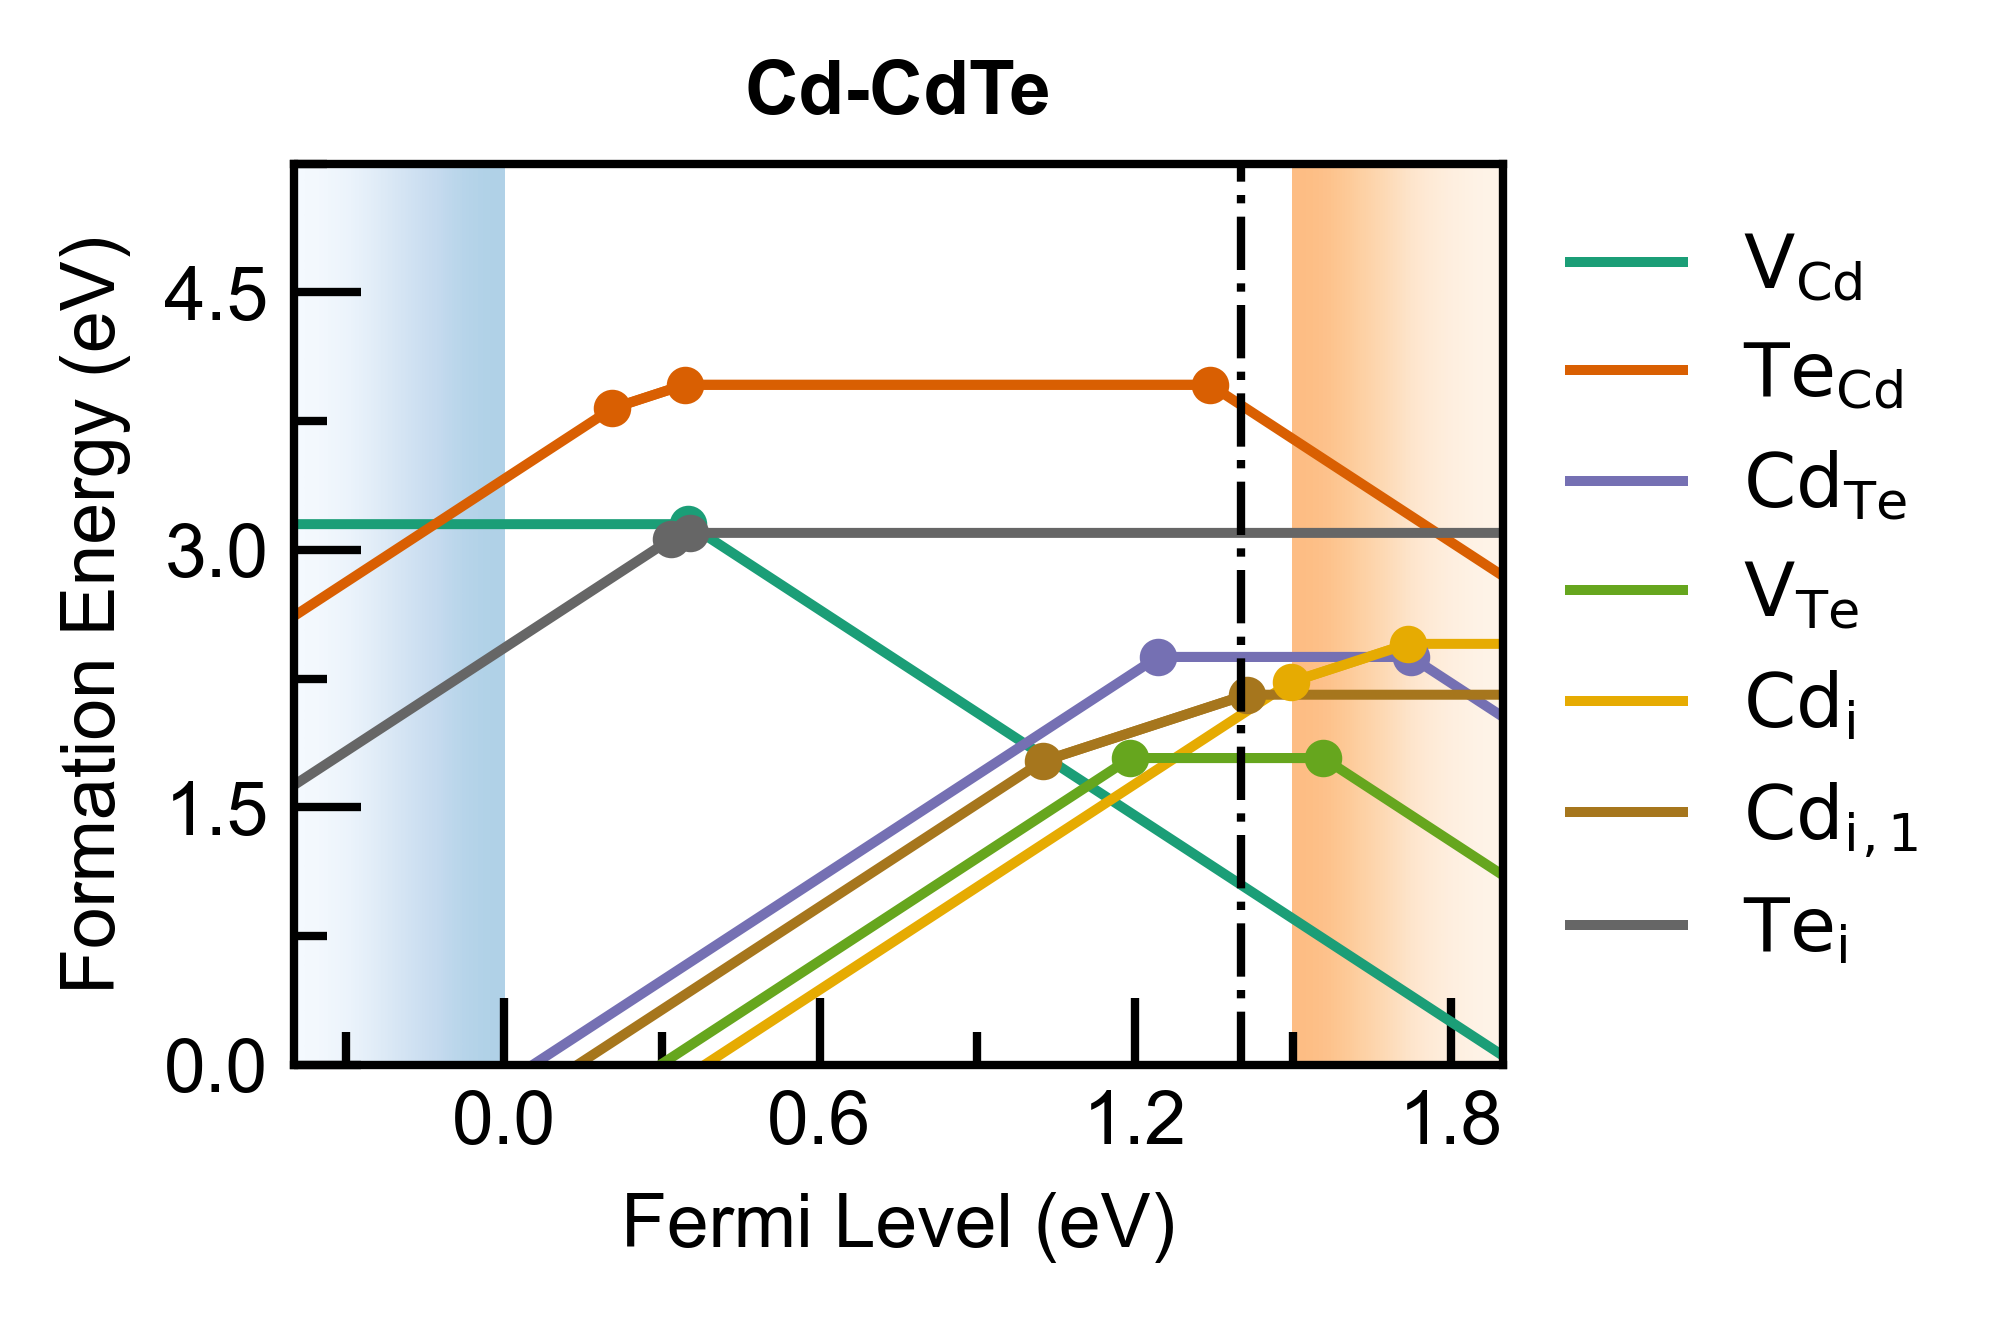

In [203]:
from doped import plotting
plotting.formation_energy_plot(LZ_CdTe_dpd,
                               chempot_limits,
                               fermi_level=1.402,
                               chempot_table=False,
                               pd_facets=["Cd-CdTe"],
                               ylim=(0, 5.25),
                               filename="CdTe_LZ_Cd_rich_w_RT_SC_Fermi_from_875K.pdf"
                               )

## 2D Heatmap of Fermi level / defect concentrations vs (μ, T)

Original, but gives odd interpolation behaviour in crossover regions due to mismatches in sampling
densities:

```python
import copy

anneal_temperatures = np.arange(200, 1401, 50)
cd_chemical_potentials = np.concatenate(
    (np.linspace(0, -0.3, 10),
    np.linspace(-0.3, -0.7, 50),  # finer sampling in the crossover region
    np.linspace(-0.7, -1.25, 10)))  # Te chemical potential is just -1.25 - μ_Cd
annealing_concentration_dict_list = []
cooling_concentration_dict_list = []

for cd_chempot in cd_chemical_potentials:
    for anneal_temp in anneal_temperatures:
        # annealing
        annealed_defect_system = generate_pyscfermi_defect_system(
            manual_degeneracies_dpd,
            {"Cd": cd_chempot + chempot_limits["elemental_refs"]["Cd"],
             "Te": -1.25 - cd_chempot + chempot_limits["elemental_refs"]["Te"]},
            pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, anneal_temp)
        annealed_defect_system_data = annealed_defect_system.concentration_dict()
        annealing_concentration_dict_list.append((cd_chempot, anneal_temp, annealed_defect_system_data))

        # do the quenching
        cooled_defect_system = copy.deepcopy(annealed_defect_system)
        cooled_defect_system.temperature = 300
        # fix concentrations
        for defect_species in annealed_defect_system.defect_species:
            cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
                annealed_defect_system_data[defect_species.name] / 1e24 * annealed_defect_system.volume)
        cooled_defect_system_data = cooled_defect_system.concentration_dict()
        cooling_concentration_dict_list.append((cd_chempot, anneal_temp, cooled_defect_system_data))
```

Some finer sampling in the T: 300 - 600K, μ: -0.75 to -1.25 eV region:
```python
anneal_temperatures = np.arange(320, 601, 20)
cd_chemical_potentials = np.linspace(-0.75, -1.25, 40)
annealing_concentration_dict_list = []
cooling_concentration_dict_list = []

for cd_chempot in cd_chemical_potentials:
    for anneal_temp in anneal_temperatures:
        # annealing
        annealed_defect_system = generate_pyscfermi_defect_system(
            manual_degeneracies_dpd,
            {"Cd": cd_chempot + chempot_limits["elemental_refs"]["Cd"],
             "Te": -1.25 - cd_chempot + chempot_limits["elemental_refs"]["Te"]},
            pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, anneal_temp)
        annealed_defect_system_data = annealed_defect_system.concentration_dict()
        annealing_concentration_dict_list.append((cd_chempot, anneal_temp, annealed_defect_system_data))

        # do the quenching
        cooled_defect_system = copy.deepcopy(annealed_defect_system)
        cooled_defect_system.temperature = 300
        # fix concentrations
        for defect_species in annealed_defect_system.defect_species:
            cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
                annealed_defect_system_data[defect_species.name] / 1e24 * annealed_defect_system.volume)
        cooled_defect_system_data = cooled_defect_system.concentration_dict()
        cooling_concentration_dict_list.append((cd_chempot, anneal_temp, cooled_defect_system_data))
```

Append to this:
```python
from monty.serialization import loadfn
prev_annealing_concentration_dict_list = loadfn("CdTe_LZ_2D_annealing_concentrations.json")
prev_cooling_concentration_dict_list = loadfn("CdTe_LZ_2D_cooling_concentrations.json")
annealing_concentration_dict_list.extend(prev_annealing_concentration_dict_list)
cooling_concentration_dict_list.extend(prev_cooling_concentration_dict_list)
from monty.serialization import dumpfn
dumpfn(annealing_concentration_dict_list, "CdTe_LZ_2D_annealing_concentrations.json")
dumpfn(cooling_concentration_dict_list, "CdTe_LZ_2D_cooling_concentrations.json")
from monty.serialization import loadfn
annealing_concentration_dict_list = loadfn("CdTe_LZ_2D_annealing_concentrations.json")
cooling_concentration_dict_list = loadfn("CdTe_LZ_2D_cooling_concentrations.json")
```

In [573]:
print(f"Around {(1200/50 * 70) / (43*60):.1f} seconds per iteration")

Around 0.7 seconds per iteration


As expected, much higher effective DOS at VBM than CBM, so a Fermi level at 0.1 eV for the VBM is acc
the same (or a bit higher) carrier concentration as _at_ the CBM:

In [36]:
f"{pyscfermi_k181818_NKRED2_dos.carrier_concentrations(0.1, 300)[0]*1e24/cdte_prim_cell_volume:.2e}"

'2.09e+17'

In [37]:
f"{pyscfermi_k181818_NKRED2_dos.carrier_concentrations(1.5, 300)[1]*1e24/cdte_prim_cell_volume:.2e}"

'7.74e+16'

Run in separate notebook to get 100x100 grid of Fermi levels / concentrations:
```python
import copy

anneal_temperatures = np.linspace(300, 1400, 100)
cd_chemical_potentials = np.linspace(0, -1.25, 100)  # Te chemical potential is just -1.25 - μ_Cd
annealing_concentration_dict_list = []
cooling_concentration_dict_list = []

for cd_chempot in cd_chemical_potentials:
    for anneal_temp in anneal_temperatures:
        # annealing
        annealed_defect_system = generate_pyscfermi_defect_system(
            manual_degeneracies_dpd,
            {"Cd": cd_chempot + chempot_limits["elemental_refs"]["Cd"],
             "Te": -1.25 - cd_chempot + chempot_limits["elemental_refs"]["Te"]},
            pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, anneal_temp)
        annealed_defect_system_data = annealed_defect_system.concentration_dict()
        annealing_concentration_dict_list.append((cd_chempot, anneal_temp, annealed_defect_system_data))

        # do the quenching
        cooled_defect_system = copy.deepcopy(annealed_defect_system)
        cooled_defect_system.temperature = 300
        # fix concentrations
        for defect_species in annealed_defect_system.defect_species:
            cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
                annealed_defect_system_data[defect_species.name] / 1e24 * annealed_defect_system.volume)
        cooled_defect_system_data = cooled_defect_system.concentration_dict()
        cooling_concentration_dict_list.append((cd_chempot, anneal_temp, cooled_defect_system_data))
```

In [12]:
from monty.serialization import loadfn
annealing_concentration_dict_list = loadfn("CdTe_LZ_2D_100x_annealing_concentrations.json")
cooling_concentration_dict_list = loadfn("CdTe_LZ_2D_100x_cooling_concentrations.json")

In [13]:
import numpy as np
fermi_levels = np.array([cooling_dict["Fermi Energy"] for cooling_dict in
                np.array(cooling_concentration_dict_list)[:, 2]])
anneal_temperatures = np.linspace(300, 1400, 100)
cd_chemical_potentials = np.linspace(0, -1.25, 100)  # Te chemical potential is just -1.25 - μ_Cd

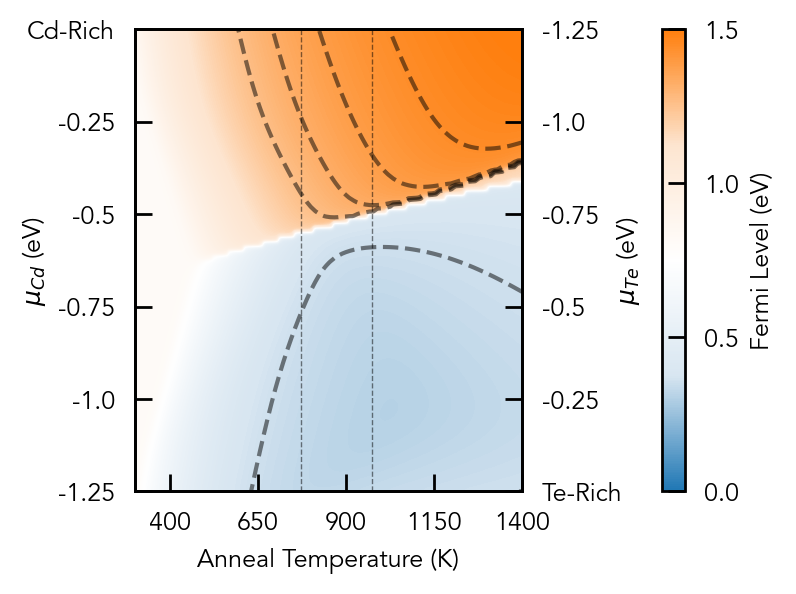

In [181]:
import matplotlib
# plot cooling concentration Fermi level as a 2D heatmap

f,ax = plt.subplots(dpi=200, figsize=(4, 3))
# define diverging colourmap, from blue to white to orange, quadratically:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["C0", "#D8E6F1", "white", "#FDE5D0", "C1"])
mappable = ax.imshow(fermi_levels.reshape(len(cd_chemical_potentials), len(anneal_temperatures)),
           extent=[min(anneal_temperatures), max(anneal_temperatures),
                   min(cd_chemical_potentials), max(cd_chemical_potentials)],  # reverse y axis
           aspect="auto", origin="upper", cmap=cmap, vmin=0, vmax=1.5,
                     interpolation="gaussian")

# add contour lines at p = 1e13, n = 1e13, 1e14, 1e15, 1e16)
ax.contour(anneal_temperatures, cd_chemical_potentials,
           fermi_levels.reshape(len(cd_chemical_potentials), len(anneal_temperatures)),
           levels=[1.266, 1.326, 1.385, 1.445], colors="k", alpha=0.5, linestyles="--")
ax.contour(anneal_temperatures, cd_chemical_potentials,
           fermi_levels.reshape(len(cd_chemical_potentials), len(anneal_temperatures)),
           levels=[0.3575, ], colors="k", alpha=0.5, linestyles="--")

ax.axvline(500+273.15, color="k", linestyle="--", linewidth=0.5, alpha=0.5)
ax.axvline(700+273.15, color="k", linestyle="--", linewidth=0.5, alpha=0.5)
#ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='k', label="Typical Anneal Range")
ax.set_xlim(300, 1400)
ax.set_xticks([400, 650, 900, 1150, 1400])
ax.set_yticks([-1.25, -1.0, -0.75, -0.5, -0.25, 0])
ax.set_yticklabels(["-1.25", "-1.0", "-0.75", "-0.5", "-0.25", "Cd-Rich"])
ax2 = ax.twinx()
ax2.set_ylim(0, -1.25)
ax2.set_yticks([0, -0.25, -0.5, -0.75, -1.0, -1.25])
ax2.set_yticklabels(["Te-Rich", "-0.25", "-0.5", "-0.75", "-1.0", "-1.25"])
ax2.set_ylabel(r"$\mu_{Te}$ (eV)", labelpad=-3)

# invert colorbar and pad
cbar = f.colorbar(mappable, ax=ax, ticks=[0, 0.5, 1, 1.5], pad=0.225)
cbar.set_label(r"Fermi Level (eV)")
ax.set_xlabel("Anneal Temperature (K)")
ax.set_ylabel(r"$\mu_{Cd}$ (eV)", labelpad=-7.5)
f.savefig("CdTe_LZ_2D_Fermi_levels.pdf", dpi=600, bbox_inches='tight')
# TODO: manually label the contour lines, and move mu_X to top of axes (in Affinity)?

In [178]:
p_minus_n = np.array([cooling_dict["p0"] - cooling_dict["n0"] for cooling_dict in
                         np.array(cooling_concentration_dict_list)[:, 2]])

In [179]:
print(f"{p_minus_n.min():.2e}, {p_minus_n.max():.2e}")

-8.91e+16, 6.20e+13


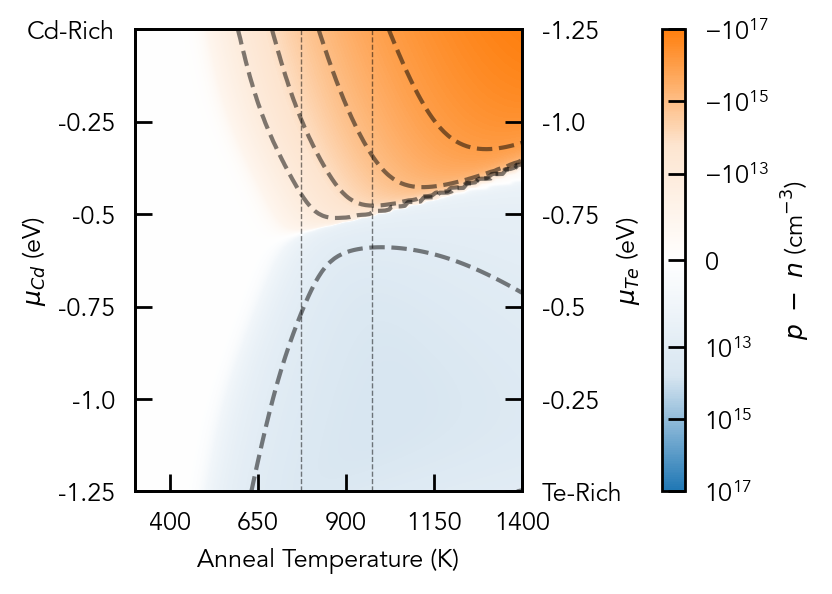

In [182]:
import matplotlib
from matplotlib.colors import SymLogNorm
# plot cooling concentration Fermi level as a 2D heatmap

f,ax = plt.subplots(dpi=200, figsize=(4, 3))
# define diverging colourmap, from blue to white to orange, quadratically:
colour_list = ["C0", "#D8E6F1", "white", "#FDE5D0", "C1"]
colour_list.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colour_list)
mappable = ax.imshow(p_minus_n.reshape(len(cd_chemical_potentials), len(anneal_temperatures)),
           extent=[min(anneal_temperatures), max(anneal_temperatures),
                   min(cd_chemical_potentials), max(cd_chemical_potentials)],  # reverse y axis
           aspect="auto", origin="upper", cmap=cmap,
                     norm=SymLogNorm(linthresh=5e11, vmin=-1e17, vmax=1e17),
                     interpolation="gaussian")

# add contour lines at p = 1e13, n = 1e13, 1e14, 1e15, 1e16)
ax.contour(anneal_temperatures, cd_chemical_potentials,
           p_minus_n.reshape(len(cd_chemical_potentials), len(anneal_temperatures)),
           levels=[-1e16, -1e15, -1e14, -1e13], colors="k", alpha=0.5, linestyles="--")
ax.contour(anneal_temperatures, cd_chemical_potentials,
           p_minus_n.reshape(len(cd_chemical_potentials), len(anneal_temperatures)),
           levels=[1e13, ], colors="k", alpha=0.5, linestyles="--")

ax.axvline(500+273.15, color="k", linestyle="--", linewidth=0.5, alpha=0.5)
ax.axvline(700+273.15, color="k", linestyle="--", linewidth=0.5, alpha=0.5)
#ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='k', label="Typical Anneal Range")
ax.set_xlim(300, 1400)
ax.set_xticks([400, 650, 900, 1150, 1400])
ax.set_yticks([-1.25, -1.0, -0.75, -0.5, -0.25, 0])
ax.set_yticklabels(["-1.25", "-1.0", "-0.75", "-0.5", "-0.25", "Cd-Rich"])
ax2 = ax.twinx()
ax2.set_ylim(0, -1.25)
ax2.set_yticks([0, -0.25, -0.5, -0.75, -1.0, -1.25])
ax2.set_yticklabels(["Te-Rich", "-0.25", "-0.5", "-0.75", "-1.0", "-1.25"])
ax2.set_ylabel(r"$\mu_{Te}$ (eV)", labelpad=-3)

# invert colorbar and pad
cbar = f.colorbar(mappable, ax=ax, ticks=[-1e17, -1e15, -1e13, 0, 1e13, 1e15, 1e17],
                  pad=0.225)
cbar.ax.invert_yaxis()  # invert cbar to match plot orientation
cbar.set_label(r"$p\ -\ n$ (cm$^{-3}$)")
ax.set_xlabel("Anneal Temperature (K)")
ax.set_ylabel(r"$\mu_{Cd}$ (eV)", labelpad=-7.5)
f.savefig("CdTe_LZ_2D_carrier_concentrations.pdf", dpi=600, bbox_inches='tight')
# TODO: manually label the contour lines, and move mu_X to top of axes (in Affinity)?

Combine these two plots for a figure in the thesis!

In [14]:
cooling_concentration_dict_array = np.array(
    cooling_concentration_dict_list)[:, 2].reshape(
    len(cd_chemical_potentials), len(anneal_temperatures))
annealing_concentration_dict_array = np.array(
    annealing_concentration_dict_list)[:, 2].reshape(
    len(cd_chemical_potentials), len(anneal_temperatures))

cooling_concentration_dict_array_per_chempot = cooling_concentration_dict_array[:, 52]
annealing_concentration_dict_array_per_chempot = annealing_concentration_dict_array[:, 52]
# anneal_temperatures[52]  # 877.8 K

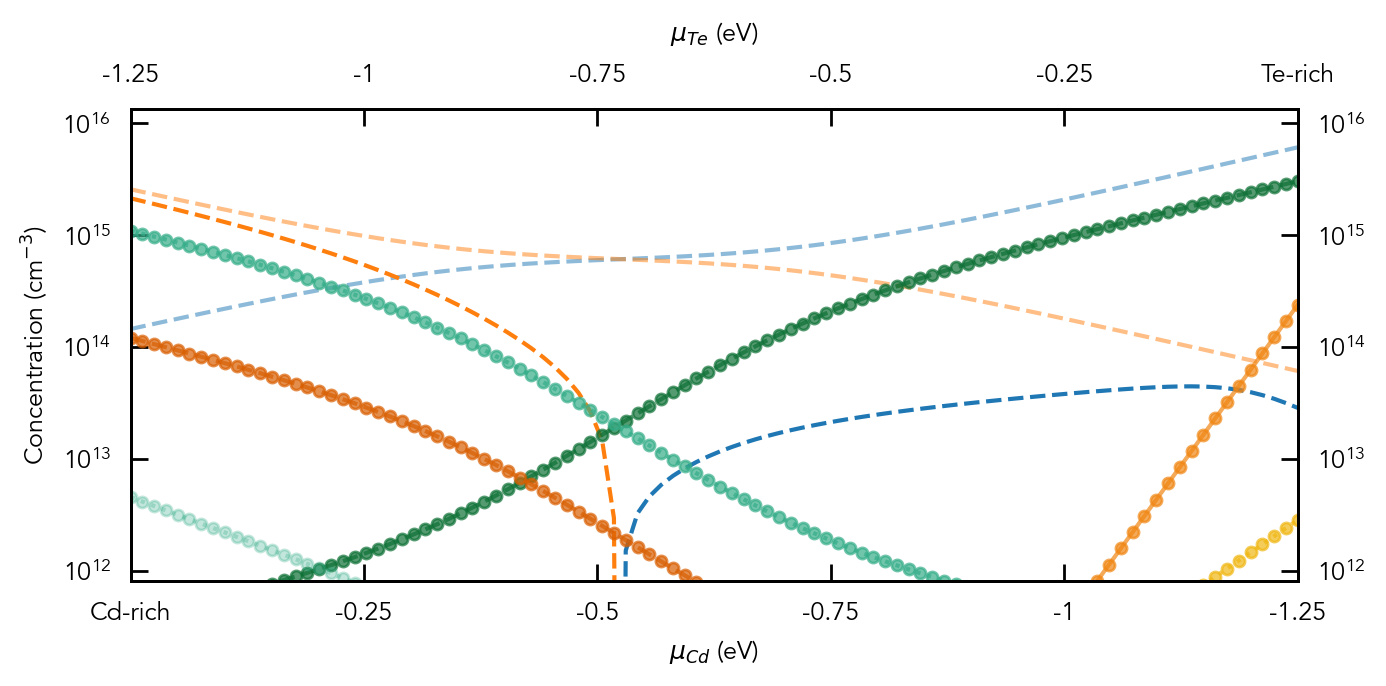

In [197]:
import matplotlib.pyplot as plt
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(dpi=200, figsize=(7,3.5))

plt.rcParams["lines.markersize"] = 4

def get_array_from_dict_array(key, dict_array=annealing_concentration_dict_array_per_chempot):
    return np.array([data_dict[key] for data_dict in dict_array])

ax.plot(cd_chemical_potentials, get_array_from_dict_array("p0", annealing_concentration_dict_array_per_chempot),
           label='p', alpha=0.5, linestyle="--")  # p first in blue
ax.plot(cd_chemical_potentials, get_array_from_dict_array("n0", annealing_concentration_dict_array_per_chempot),
           label='n', alpha=0.5, linestyle="--")
ax.plot(cd_chemical_potentials,
        get_array_from_dict_array("p0", cooling_concentration_dict_array_per_chempot),
           label='p, cooled', c="C0", linestyle="--")  # p first in blue
ax.plot(cd_chemical_potentials,
        get_array_from_dict_array("n0", cooling_concentration_dict_array_per_chempot),
           label='n, cooled', c="C1", linestyle="--")
ax.plot(cd_chemical_potentials,
           get_array_from_dict_array("Vac_Cd", annealing_concentration_dict_array_per_chempot),  # v_Cd
           marker='o', label=r"$V_{Cd}$", linestyle="--", c="#0D7035", alpha=0.7)
ax.plot(cd_chemical_potentials,
           get_array_from_dict_array("Sub_Te_on_Cd", annealing_concentration_dict_array_per_chempot),  # Te_Cd
           marker='o', label=r"$Te_{Cd}$", c="#F08613", alpha=0.7)
ax.plot(cd_chemical_potentials,
           get_array_from_dict_array("Int_Te", annealing_concentration_dict_array_per_chempot),  # Te_i_Td_Te2.83
           marker='o', label=f"$Te_i$", linestyle=":", c="#F0B713", alpha=0.7)
ax.plot(cd_chemical_potentials,
           get_array_from_dict_array("Int_Cd", annealing_concentration_dict_array_per_chempot),  # Cd_i_Td_Te2.83
           marker='o', label=f"$Cd_i(Te)$", linestyle=":", c="#35AD88", alpha=0.7)
ax.plot(cd_chemical_potentials,
           get_array_from_dict_array("Vac_Te", annealing_concentration_dict_array_per_chempot),  # v_Te
           marker='o', label=r"$V_{Te}$", linestyle="--", c="#D95F02", alpha=0.7)
ax.plot(cd_chemical_potentials,
           get_array_from_dict_array("Int_Cd_1", annealing_concentration_dict_array_per_chempot),  # Cd_i_Td_Cd2.83
           marker='o', label=f"$Cd_i(Cd)$", linestyle=":", c="#35AD88", alpha=0.3)
# ax[0].plot(cd_chemical_potentials,
#            get_array_from_dict_array("Sub_Cd_on_Te", annealing_concentration_dict_array_per_chempot),
#            marker='o', label=r"$Cd_{Te}$", c="#66A61E", alpha=0.7)

# ax[1].plot(cd_chemical_potentials,
#            get_array_from_dict_array("p0", cooling_concentration_dict_array_per_chempot),
#            label='p',alpha=0.85, linestyle="--")  # p first in blue
# ax[1].plot(cd_chemical_potentials,
#            get_array_from_dict_array("n0", cooling_concentration_dict_array_per_chempot),
#            label='n', alpha=0.85, linestyle="--")
# ax[1].plot(cd_chemical_potentials,
#            get_array_from_dict_array("Vac_Cd", cooling_concentration_dict_array_per_chempot),  # v_Cd
#            marker='o', label=r"$V_{Cd}$", linestyle="--", c="#0D7035", alpha=0.7)
# ax[1].plot(cd_chemical_potentials,
#            get_array_from_dict_array("Sub_Te_on_Cd", cooling_concentration_dict_array_per_chempot),  # Te_Cd
#            marker='o', label=r"$Te_{Cd}$", c="#F08613", alpha=0.7)
# ax[1].plot(cd_chemical_potentials,
#            get_array_from_dict_array("Int_Te", cooling_concentration_dict_array_per_chempot),  # Te_i_Td_Te2.83
#            marker='o', label=f"$Te_i$", linestyle=":", c="#F0B713", alpha=0.7)
# ax[1].plot(cd_chemical_potentials,
#            get_array_from_dict_array("Int_Cd", cooling_concentration_dict_array_per_chempot),  # Cd_i_Td_Te2.83
#            marker='o', label=f"$Cd_i(Te)$", linestyle=":", c="#35AD88", alpha=0.7)
# ax[1].plot(cd_chemical_potentials,
#            get_array_from_dict_array("Vac_Te", cooling_concentration_dict_array_per_chempot),  # v_Te
#            marker='o', label=r"$V_{Te}$", linestyle="--", c="#D95F02", alpha=0.7)
# ax[1].plot(cd_chemical_potentials,
#            get_array_from_dict_array("Int_Cd_1", cooling_concentration_dict_array_per_chempot),  # Cd_i_Td_Cd2.83
#            marker='o', label=f"$Cd_i(Cd)$", linestyle=":", c="#35AD88", alpha=0.3)
# ax[1].plot(cd_chemical_potentials,
#            get_array_from_dict_array("Sub_Cd_on_Te", cooling_concentration_dict_array_per_chempot),
#            marker='o', label=r"$Cd_{Te}$", c="#66A61E", alpha=0.7)

# ax[0].set_title("During Annealing")
# ax[1].set_title("Upon Quenching to $T$ = 300 K")

ax.set_xlabel(r'$\mu_{Cd}$ (eV)')
ax.set_ylabel(r"Concentration (cm$^{-3}$)")
ax.set_yscale("log")
ax.set_xlim(0, -1.25)
ax.set_ylim(8e11, 1.35e16)
# typical anneal range is 500 - 700, so shade in this region:
#axis.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC', label="Typical Anneal Range")
# axis.legend(ncols=2, loc="upper center") # no legend for final plot!
# show mu_Te on upper x axis:
ax2 = ax.twiny()
ax2.set_xlim(0, -1.25)
# set label with padding:
ax2.set_xlabel(r'$\mu_{Te}$ (eV)', labelpad=8)
ax2.set_xticks(np.arange(-1.25, 0.1, 0.25))
ax2.set_xticklabels(["Te-rich", -0.25, -0.5, -0.75, -1, -1.25])
ax.set_xticks(np.arange(-1.25, 0.1, 0.25))
ax.set_xticklabels([-1.25, -1, -0.75, -0.5, -0.25, "Cd-rich"])

# add ticks and ticklabels on both left and right yaxis:
ax3 = ax.twinx()
ax3.set_ylim(8e11, 1.35e16)
ax3.set_yscale("log")

plt.tight_layout()
plt.savefig("CdTe_Brouwer_defect_concentrations_vs_chempot_875K.pdf", dpi=500, bbox_inches='tight')

Small enough set of lines here that we could manually label in Affinity ✅

Could do heatmap for each defect concentration as well, and stick in appendix, but possibly overkill?
I think only really makes sense in the case that we know what the killer defect is, and want to look at
minimising its concentration

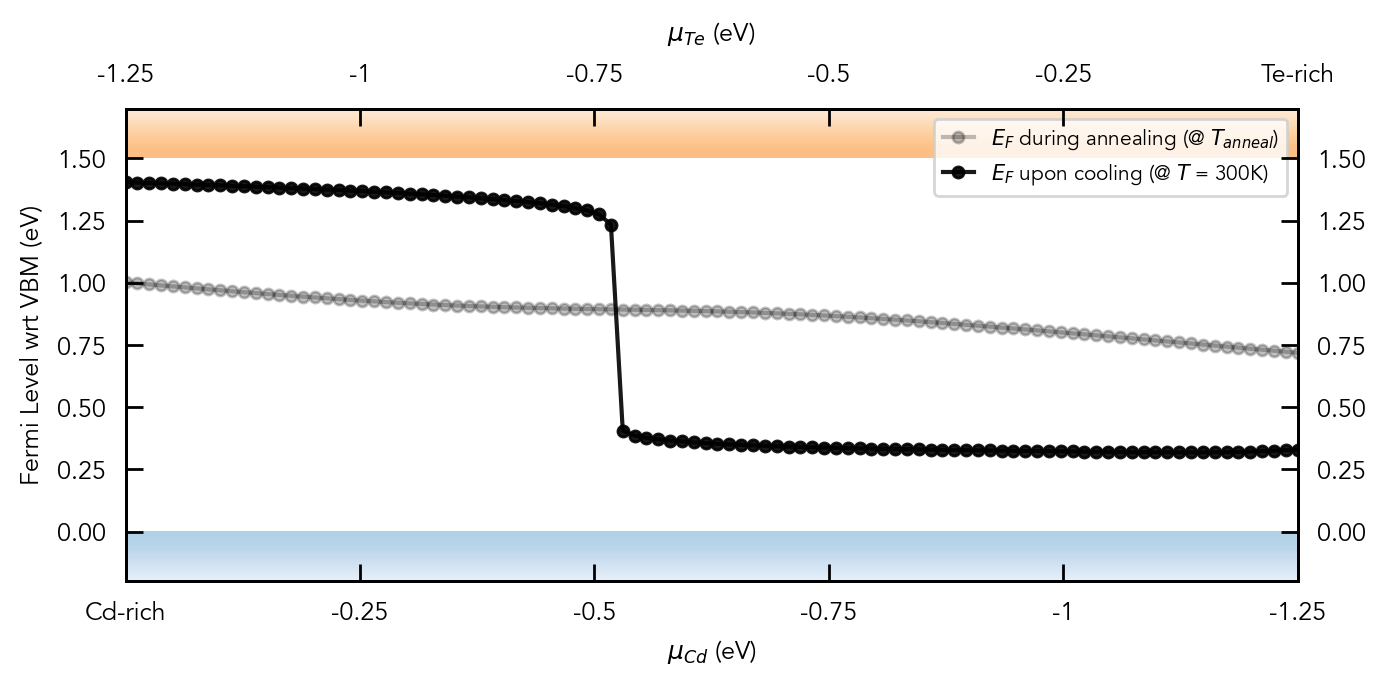

In [24]:
import matplotlib.pyplot as plt
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(dpi=200, figsize=(7,3.5))

plt.rcParams["lines.markersize"] = 4

def get_array_from_dict_array(key, dict_array=annealing_concentration_dict_array_per_chempot):
    return np.array([data_dict[key] for data_dict in dict_array])


ax.plot(cd_chemical_potentials, get_array_from_dict_array(
    "Fermi Energy", annealing_concentration_dict_array_per_chempot), marker='o',
        label="$E_F$ during annealing (@ $T_{anneal}$)", color = "k", alpha=0.25)
ax.plot(cd_chemical_potentials, get_array_from_dict_array(
    "Fermi Energy", cooling_concentration_dict_array_per_chempot), marker='o',
        label="$E_F$ upon cooling (@ $T$ = 300K)", color = "k", alpha=0.9)


ax.legend()
ax.set_ylabel('Fermi Level wrt VBM (eV)')

# show VB in blue from -0.3 to 0 eV:
ax.imshow(
    [(1, 1), (0, 0)],
    cmap=plt.cm.Blues,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], -0.3, 0),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
    )

ax.imshow(
    [(0, 0,), (1, 1)],
    cmap=plt.cm.Oranges,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], 1.5, 1.8),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
)
ax.set_ylim(-0.2, 1.7)

ax.set_xlabel(r'$\mu_{Cd}$ (eV)')
ax.set_xlim(0, -1.25)
# typical anneal range is 500 - 700, so shade in this region:
#axis.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC', label="Typical Anneal Range")
# axis.legend(ncols=2, loc="upper center") # no legend for final plot!
# show mu_Te on upper x axis:
ax2 = ax.twiny()
ax2.set_xlim(0, -1.25)
# set label with padding:
ax2.set_xlabel(r'$\mu_{Te}$ (eV)', labelpad=8)
ax2.set_xticks(np.arange(-1.25, 0.1, 0.25))
ax2.set_xticklabels(["Te-rich", -0.25, -0.5, -0.75, -1, -1.25])
ax.set_xticks(np.arange(-1.25, 0.1, 0.25))
ax.set_xticklabels([-1.25, -1, -0.75, -0.5, -0.25, "Cd-rich"])

ax3 = ax.twinx()
ax3.set_ylim(-0.2, 1.7)

plt.tight_layout()
f.savefig("CdTe_Brouwer_Fermi_levels_annealing_and_cooling.pdf", dpi=500, bbox_inches='tight')

## What if $V_{Cd}$ and $V_{Te}$ weren't so deep?
(i.e. without finding the $V_{Cd}^0$/$V_{Te}^0$ reconstructions)

In [54]:
CdTe_LZ_Te_Rich_defect_system = generate_pyscfermi_defect_system(
    manual_degeneracies_dpd, chempot_limits["facets"]["CdTe-Te"],
                                 pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, 875)
no_v_Cd_Te_0_defect_system = copy.deepcopy(CdTe_LZ_Te_Rich_defect_system)

In [61]:
# update V_Cd and V_Te 0 energies:
no_v_Cd_Te_0_defect_system.defect_species[0]._charge_states[0]._energy += 0.52  # Td higher than dimer by
# 0.52 eV
no_v_Cd_Te_0_defect_system.defect_species[4]._charge_states[0]._energy += 3.46 - 3.04  # V_Te_0

In [64]:
check_annealed_defect_system = no_v_Cd_Te_0_defect_system
check_annealed_defect_system.temperature = 875
check_annealed_defect_system_data = check_annealed_defect_system.concentration_dict()
check_cooled_defect_system = copy.deepcopy(check_annealed_defect_system)
check_cooled_defect_system.temperature = 300

for defect_species in check_annealed_defect_system.defect_species:
    check_cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
        check_annealed_defect_system_data[defect_species.name] / 1e24 * check_annealed_defect_system.volume)

check_cooled_defect_system_data = check_cooled_defect_system.concentration_dict()

Te-rich:

In [65]:
data_dict = check_cooled_defect_system.concentration_dict(decomposed=True,)
print(f"Fermi level at {data_dict['Fermi Energy']:.2f} eV")
print(f"Hole concentration of {data_dict['p0']:.2e} cm^-3")

Fermi level at 0.21 eV
Hole concentration of 2.92e+15 cm^-3


Cd-rich:

In [66]:
CdTe_LZ_Cd_Rich_defect_system = generate_pyscfermi_defect_system(
    manual_degeneracies_dpd, chempot_limits["facets"]["Cd-CdTe"],
                                 pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, 875)
no_v_Cd_Te_0_defect_system = copy.deepcopy(CdTe_LZ_Cd_Rich_defect_system)

In [67]:
# update V_Cd and V_Te 0 energies:
no_v_Cd_Te_0_defect_system.defect_species[0]._charge_states[0]._energy += 0.52  # Td higher than dimer by
# 0.52 eV
no_v_Cd_Te_0_defect_system.defect_species[4]._charge_states[0]._energy += 3.46 - 3.04  # V_Te_0

In [68]:
check_annealed_defect_system = no_v_Cd_Te_0_defect_system
check_annealed_defect_system.temperature = 875
check_annealed_defect_system_data = check_annealed_defect_system.concentration_dict()
check_cooled_defect_system = copy.deepcopy(check_annealed_defect_system)
check_cooled_defect_system.temperature = 300

for defect_species in check_annealed_defect_system.defect_species:
    check_cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
        check_annealed_defect_system_data[defect_species.name] / 1e24 * check_annealed_defect_system.volume)

check_cooled_defect_system_data = check_cooled_defect_system.concentration_dict()

In [70]:
data_dict = check_cooled_defect_system.concentration_dict(decomposed=True,)
print(f"Fermi level at {data_dict['Fermi Energy']:.2f} eV")
print(f"Electron concentration of {data_dict['n0']:.2e} cm^-3")

Fermi level at 1.40 eV
Electron concentration of 1.88e+15 cm^-3


Yeah negligible difference to the electron concentration as expected

#### What about without th $V_{Cd}^{-1}$ hole polaron?

In [86]:
CdTe_LZ_Te_Rich_defect_system = generate_pyscfermi_defect_system(
    manual_degeneracies_dpd, chempot_limits["facets"]["CdTe-Te"],
                                 pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, 875)
no_v_Cd_0_1_defect_system = copy.deepcopy(CdTe_LZ_Te_Rich_defect_system)

In [87]:
# update V_Cd and V_Te 0 energies:
no_v_Cd_0_1_defect_system.defect_species[0]._charge_states[0]._energy += 0.52  # Td higher than dimer by
# 0.52 eV
no_v_Cd_0_1_defect_system.defect_species[0]._charge_states[-1]._energy += 0.1  # V_Cd_-1

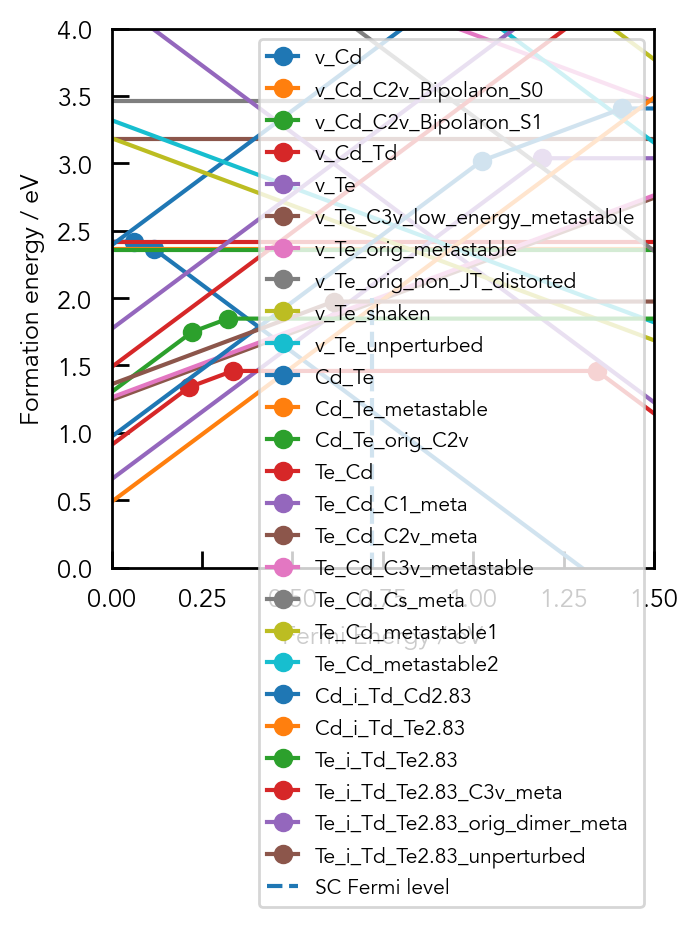

In [88]:
# Check: plot transition levels with py-sc-fermi ✅
plt.figure(dpi=200)
# get a dictionary of the lines for a transition level (TL) diagram where the key is the name of the DefectSpecies
# the values is a list of lists, where the first list is the x coordinates of the TL profile and the second list
# is the y coordinates of the TL profile
transition_levels = no_v_Cd_0_1_defect_system.get_transition_levels()

# get the self consistent Fermi energy to plot on the TL diagram
sc_fermi = no_v_Cd_0_1_defect_system.get_sc_fermi()[0]

# plot each defect species TL profile on the full diagram, and label as
# the defect species name
for k, v in transition_levels.items():
    plt.plot(v[0], v[1], "-o", label=k)

# plot the self consistent Fermi energy
plt.vlines(sc_fermi, 0, 2, linestyles="dashed", label = "SC Fermi level")

plt.ylim(0, 4)
plt.xlim(0, 1.5)
plt.legend()
plt.ylabel("Formation energy / eV")
plt.xlabel("Fermi Energy / eV")
plt.show()

In [89]:
check_annealed_defect_system = no_v_Cd_0_1_defect_system
check_annealed_defect_system.temperature = 875
check_annealed_defect_system_data = check_annealed_defect_system.concentration_dict()
check_cooled_defect_system = copy.deepcopy(check_annealed_defect_system)
check_cooled_defect_system.temperature = 300

for defect_species in check_annealed_defect_system.defect_species:
    check_cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
        check_annealed_defect_system_data[defect_species.name] / 1e24 * check_annealed_defect_system.volume)

check_cooled_defect_system_data = check_cooled_defect_system.concentration_dict()

Te-rich:

In [90]:
data_dict = check_cooled_defect_system.concentration_dict(decomposed=True,)
print(f"Fermi level at {data_dict['Fermi Energy']:.2f} eV")
print(f"Hole concentration of {data_dict['p0']:.2e} cm^-3")

Fermi level at 0.20 eV
Hole concentration of 4.77e+15 cm^-3


Yeah so main effect is from deep $V_{Cd}^0$, not $V_{Cd}^{-1}$ hole polaron

# Temperature-Dependent Band Gap

In [117]:
import numpy as np
import py_sc_fermi
from py_sc_fermi.dos import DOS
import matplotlib.pyplot as plt

In [118]:
pyscfermi_k181818_NKRED2_dos = DOS.from_vasprun("VASP_Files/Bulk_DOS/k181818_NKRED2/vasprun.xml.gz",
                                                 nelect=18, bandgap=1.497)

(0.0, 0.9119190098749655)

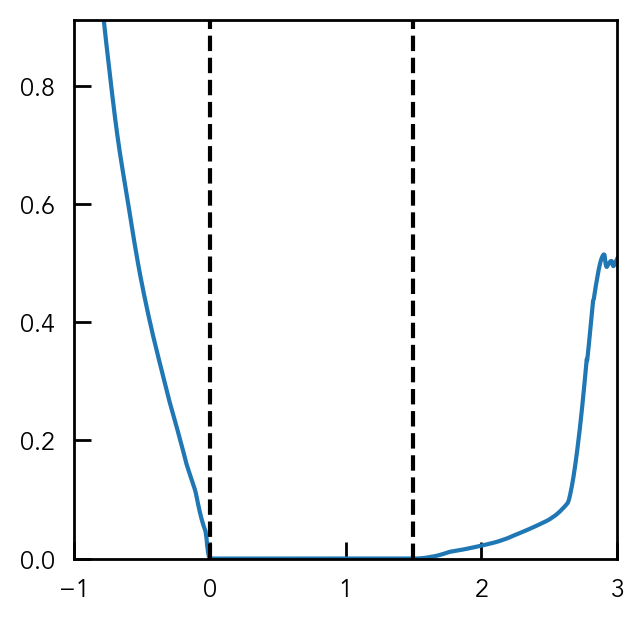

In [134]:
vbm = 0; cbm = 1.497
plt.figure(dpi=200)
plt.plot(pyscfermi_k181818_NKRED2_dos.edos,pyscfermi_k181818_NKRED2_dos.dos)
plt.axvline(vbm, 0, 1000, color = 'black', ls='--')
plt.axvline(cbm, 0, 1000, color = 'black', ls='--')
plt.xlim(-1,3)
plt.ylim(0,0.01*np.max(pyscfermi_k181818_NKRED2_dos.dos))

In [129]:
import numpy as np

def scissor_dos(delta_Eg, orig_dos = pyscfermi_k181818_NKRED2_dos, threshold = 1e-8):
    cbm_index = np.where((orig_dos.dos > threshold) & (orig_dos.edos > orig_dos.bandgap/2))[0][0]
    cbm_energy = orig_dos.edos[cbm_index]
    # get closest index with energy near cbm_energy + delta_Eg:
    new_cbm_index = np.argmin(np.abs(orig_dos.edos - (cbm_energy + delta_Eg)))
    new_cbm_energy = orig_dos.edos[new_cbm_index]
    vbm_index = np.where((orig_dos.dos > threshold) & (orig_dos.edos < orig_dos.bandgap/2))[0][-1]
    vbm_energy = orig_dos.edos[vbm_index]

    assert np.isclose(cbm_energy - vbm_energy, orig_dos.bandgap, atol=1e-1)
    assert np.isclose(new_cbm_energy - cbm_energy, delta_Eg, atol=1e-2)

    # Determine the number of values in edos/dos to remove to avoid duplication
    values_to_remove_or_add = int(new_cbm_index - cbm_index)
    scissored_dos_dict = orig_dos.as_dict()

    # Shift the CBM and remove/add values:
    if values_to_remove_or_add < 0:  # remove values
        scissored_dos_dict["edos"] = np.concatenate(
            (orig_dos.edos[:cbm_index + values_to_remove_or_add],
             orig_dos.edos[cbm_index:] + delta_Eg))
        scissored_dos_dict["dos"] = np.concatenate(
            (orig_dos.dos[:cbm_index + values_to_remove_or_add],
             orig_dos.dos[cbm_index:]))
    elif values_to_remove_or_add > 0:
        # add more zero DOS values:
        scissored_dos_dict["edos"] = np.concatenate(
            (orig_dos.edos[:cbm_index],
             orig_dos.edos[cbm_index:new_cbm_index],
             orig_dos.edos[cbm_index:] + delta_Eg))
        scissored_dos_dict["dos"] = np.concatenate(
            (orig_dos.dos[:cbm_index],
             np.zeros(values_to_remove_or_add),
             orig_dos.dos[cbm_index:]))

    scissored_dos_dict["bandgap"] = orig_dos.bandgap + delta_Eg

    return DOS.from_dict(scissored_dos_dict)

(0.0, 0.9119190098749655)

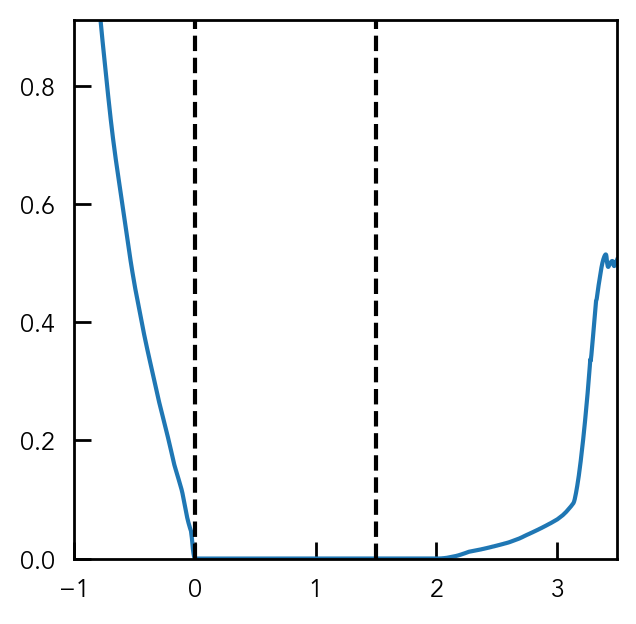

In [135]:
vbm = 0; cbm = 1.497
plt.figure(dpi=200)
pyscfermi_dos = scissor_dos(0.5)
plt.plot(pyscfermi_dos.edos,pyscfermi_dos.dos)
plt.axvline(vbm, 0, 1000, color = 'black', ls='--')
plt.axvline(cbm, 0, 1000, color = 'black', ls='--')
plt.xlim(-1, pyscfermi_dos.bandgap+1.5)
plt.ylim(0,0.01*np.max(pyscfermi_k181818_NKRED2_dos.dos))

(0.0, 0.9119190098749655)

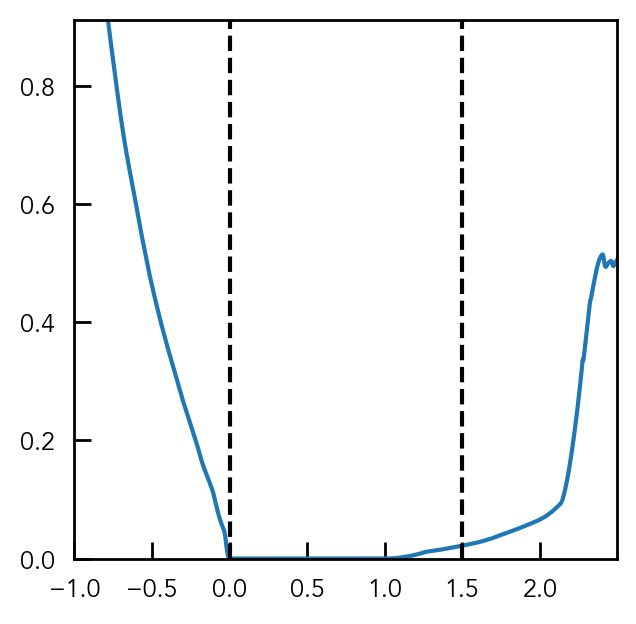

In [136]:
vbm = 0; cbm = 1.497
plt.figure(dpi=200)
pyscfermi_dos = scissor_dos(-0.5)
plt.plot(pyscfermi_dos.edos,pyscfermi_dos.dos)
plt.axvline(vbm, 0, 1000, color = 'black', ls='--')
plt.axvline(cbm, 0, 1000, color = 'black', ls='--')
plt.xlim(-1, pyscfermi_dos.bandgap+1.5)
plt.ylim(0,0.01*np.max(pyscfermi_k181818_NKRED2_dos.dos))

In [137]:
from py_sc_fermi.inputs import volume_from_structure

cdte_prim_cell_volume = volume_from_structure('VASP_Files/Bulk_DOS/k181818_NKRED2/vasprun.xml.gz')

In [158]:
def convert_defect_energies(defect_system, delta_Eg):
    """
    Convert the defect energies in defect_system to match a bandgap changed by delta_Eg,
    (negative for band gap reduction, positive for band gap increase),
    where it is assumed the defect levels stay fixed and the VBM/CBM increase/decrease in
    energy symmetrically upon band gap reduction.
    """
    defect_system_dict = copy.deepcopy(defect_system.as_dict())
    for defect_species_dict in defect_system_dict["defect_species"]:
        for charge_state, subdict in defect_species_dict["charge_states"].items():
            subdict["energy"] -= int(charge_state)*delta_Eg/2  # shift by q*delta_Eg/2

    return DefectSystem.from_dict(defect_system_dict)

In [183]:
def berding_CdTe_gap(T):  # rough functional form
    return 1.65 - 5.35e-4 * T  # Berding's formula is from G.L. Hansen, J.L. Schmit, T.N. Casselman, J.
    # Appl. Phys. 53, 7099 (1982), which is fit over a range of Hg_(1-x)Cd_xTe alloys, so Belas data
    # should be more reliable

In [207]:
belas_data =[(1.5110277123929035, 293.61411498177165),  # CdTe gap vs Temp, 2014 study
             (1.4978368122096875, 323.8690412012745),
             (1.4771103223451387, 372.54000946743133),
             (1.4544939046587835, 422.5264093083491),
             (1.4328236569636261, 472.5128091492669),
             (1.411153409268469, 522.4992089901847),
             (1.3885345794215245, 571.1701772563415),
             (1.3668667438869564, 622.4720086720203),
             (1.3451964961917993, 672.4584085129379),
             (1.3235262484966421, 722.4448083538558),
             (1.3009098308102867, 772.4312081947735),
             (1.2792395831151295, 822.4176080356914),
             (1.2575693354199722, 872.4040078766092),
             (1.235899087724815, 922.390407717527),
             (1.2142288400296577, 972.3768075584447),
             (1.1925585923345006, 1022.3632073993625),
             (1.1699421746481453, 1072.3496072402804),
             (1.148271926952988, 1122.3360070811982),
             (1.1266016792578308, 1172.322406922116),
             (1.1039876737320649, 1223.6242383377944)]

params = np.polyfit([x[1] for x in belas_data], [x[0] for x in belas_data], 1, full=True)[0]

def belas_linear_fit(T):
    return params[1] + params[0] * T

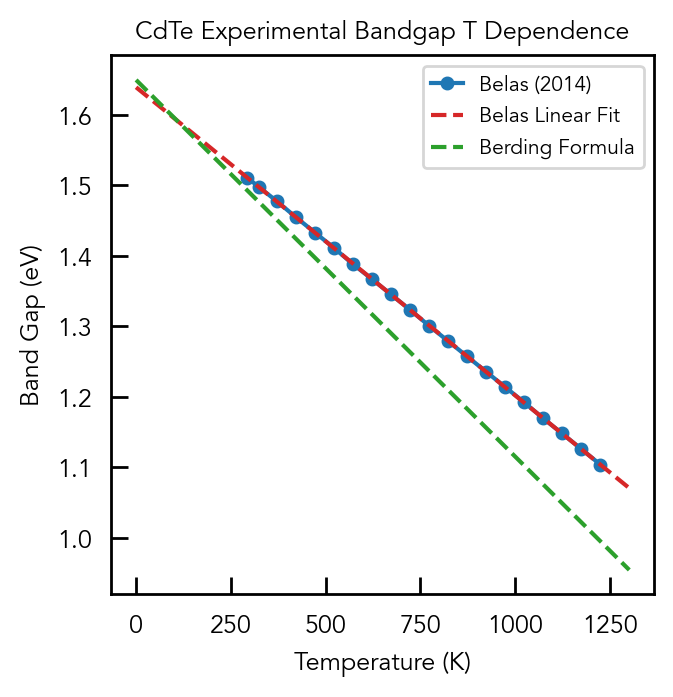

In [208]:
import matplotlib.pyplot as plt
plt.style.use("../Packages/publication_style.mplstyle")

f,ax = plt.subplots(1,1, dpi=200)

# assuming a ZP gap renormalisation of 0.2 eV, and a 0K gap of 1.5 eV
temps = np.linspace(1, 1300, num=1000)

ax.plot([x[1] for x in belas_data], [x[0] for x in belas_data], label = "Belas (2014)", marker="o", markersize=4)
ax.plot(temps, belas_linear_fit(temps), color="C3", ls="--", label="Belas Linear Fit")
ax.plot(temps, berding_CdTe_gap(temps), color="C2", ls="--", label="Berding Formula")
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Band Gap (eV)")
ax.set_title("CdTe Experimental Bandgap T Dependence")
ax.legend();

## Te-Rich

In [209]:
import copy

anneal_temperatures = np.arange(200, 1401, 50)

annealed_scfermi_levels = []; cooled_scfermi_levels = []
annealed_n = []; cooled_n = []
annealed_p = []; cooled_p = []
annealed_vcd = []; cooled_vcd = []
annealed_intcdte = []; cooled_intcdte = []
annealed_intcdcd = []; cooled_intcdcd = []
annealed_intte = []; cooled_intte = []
annealed_tecd = []; cooled_tecd = []
annealed_cdte = []; cooled_cdte = []
annealed_vte = []; cooled_vte = []

CdTe_LZ_Te_Rich_defect_system = generate_pyscfermi_defect_system(
        manual_degeneracies_dpd, chempot_limits["facets"]["CdTe-Te"],
                                     pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, 100)

for anneal_temp in anneal_temperatures:
    gap_shift = belas_linear_fit(anneal_temp) - 1.5
    scissored_dos = scissor_dos(gap_shift)
    reduced_gap_CdTe_LZ_Te_rich_defect_system = convert_defect_energies(
        CdTe_LZ_Te_Rich_defect_system, gap_shift)
    reduced_gap_CdTe_LZ_Te_rich_defect_system.dos = scissored_dos

    annealed_defect_system = copy.deepcopy(reduced_gap_CdTe_LZ_Te_rich_defect_system)

    annealed_defect_system.temperature = anneal_temp
    annealed_defect_system_data = annealed_defect_system.concentration_dict()
    annealed_scfermi_levels.append(annealed_defect_system.get_sc_fermi()[0])
    annealed_n.append(annealed_defect_system_data["n0"])
    annealed_p.append(annealed_defect_system_data["p0"])
    annealed_vcd.append(annealed_defect_system_data["v_Cd"])
    annealed_intcdte.append(annealed_defect_system_data["Cd_i_Td_Te2.83"])
    annealed_intcdcd.append(annealed_defect_system_data["Cd_i_Td_Cd2.83"])
    annealed_intte.append(annealed_defect_system_data["Te_i_Td_Te2.83"])
    annealed_tecd.append(annealed_defect_system_data["Te_Cd"])
    annealed_cdte.append(annealed_defect_system_data["Cd_Te"])
    annealed_vte.append(annealed_defect_system_data["v_Te"])

    cooled_defect_system = copy.deepcopy(CdTe_LZ_Te_Rich_defect_system)  # room temp DOS and defect
    # energies
    cooled_defect_system.temperature = 300

    for defect_species in annealed_defect_system.defect_species:
        cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
            annealed_defect_system_data[defect_species.name] / 1e24 * annealed_defect_system.volume)

    cooled_defect_system_data = cooled_defect_system.concentration_dict()
    cooled_scfermi_levels.append(cooled_defect_system.get_sc_fermi()[0])
    cooled_n.append(cooled_defect_system_data["n0"])
    cooled_p.append(cooled_defect_system_data["p0"])
    cooled_vcd.append(annealed_defect_system_data["v_Cd"])
    cooled_intcdte.append(annealed_defect_system_data["Cd_i_Td_Te2.83"])
    cooled_intcdcd.append(annealed_defect_system_data["Cd_i_Td_Cd2.83"])
    cooled_intte.append(annealed_defect_system_data["Te_i_Td_Te2.83"])
    cooled_tecd.append(annealed_defect_system_data["Te_Cd"])
    cooled_cdte.append(annealed_defect_system_data["Cd_Te"])
    cooled_vte.append(annealed_defect_system_data["v_Te"])

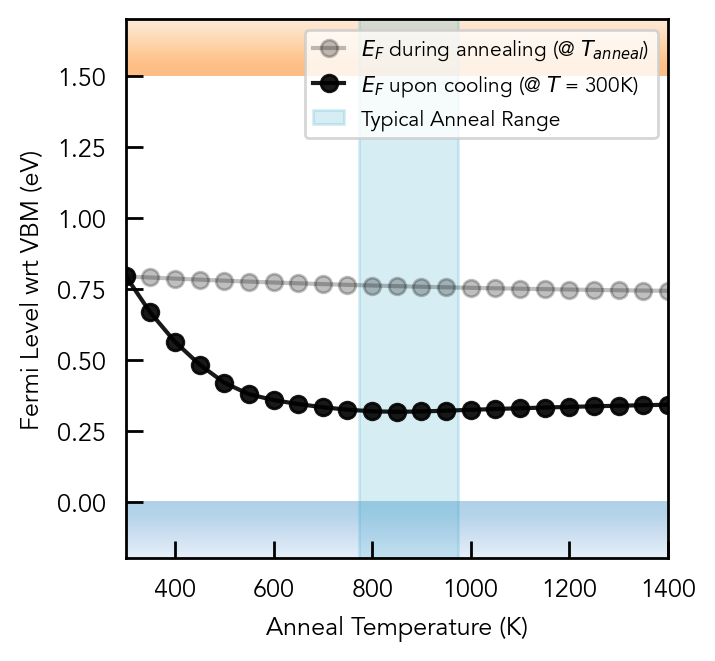

In [210]:
import matplotlib.pyplot as plt

plt.style.use("../Packages/publication_style.mplstyle")
f,ax = plt.subplots(dpi=200)
ax.plot(anneal_temperatures,
        np.array(annealed_scfermi_levels) - (belas_linear_fit(np.array(anneal_temperatures)) - 1.5)/2,
        # Get annealed Fermi level wrt the room temp gap!
        marker='o', label="$E_F$ during annealing (@ $T_{anneal}$)", color = "k", alpha=0.25)
ax.plot(anneal_temperatures, cooled_scfermi_levels, marker='o',
        label="$E_F$ upon cooling (@ $T$ = 300K)", color = "k", alpha=0.9)
ax.set_xlabel('Anneal Temperature (K)')
ax.set_ylabel('Fermi Level wrt VBM (eV)')
ax.set_xlim(300, 1400)
ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC', label="Typical Anneal Range")
ax.legend()

# show VB in blue from -0.3 to 0 eV:
ax.imshow(
    [(1, 1), (0, 0)],
    cmap=plt.cm.Blues,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], -0.3, 0),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
    )

ax.imshow(
    [(0, 0,), (1, 1)],
    cmap=plt.cm.Oranges,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], 1.5, 1.8),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
)
ax.set_ylim(-0.2, 1.7)
plt.show()
# f.savefig("CdTe_LZ_Te_rich_Fermi_levels_annealing_and_cooling.pdf", dpi=500, bbox_inches='tight')

In [211]:
np.mean(cooled_scfermi_levels[12:16])  # midpoint of 500-700 degrees C (+273.15 -> K);
# SC Fermi for typical anneal temperature
# so only slight difference from SC Fermi without accounting for temp dependent gap (0.331 eV to 0.315
# eV), because still basically compensated by deep V_Cd level (again showing how important finding that
# dimer state was! V_Cd a shallow acceptor without)

0.3186469199032255

In [212]:
np.mean(anneal_temperatures[12:16])  # midpoint of 500-700 degrees C (+273.15 -> K)

875.0

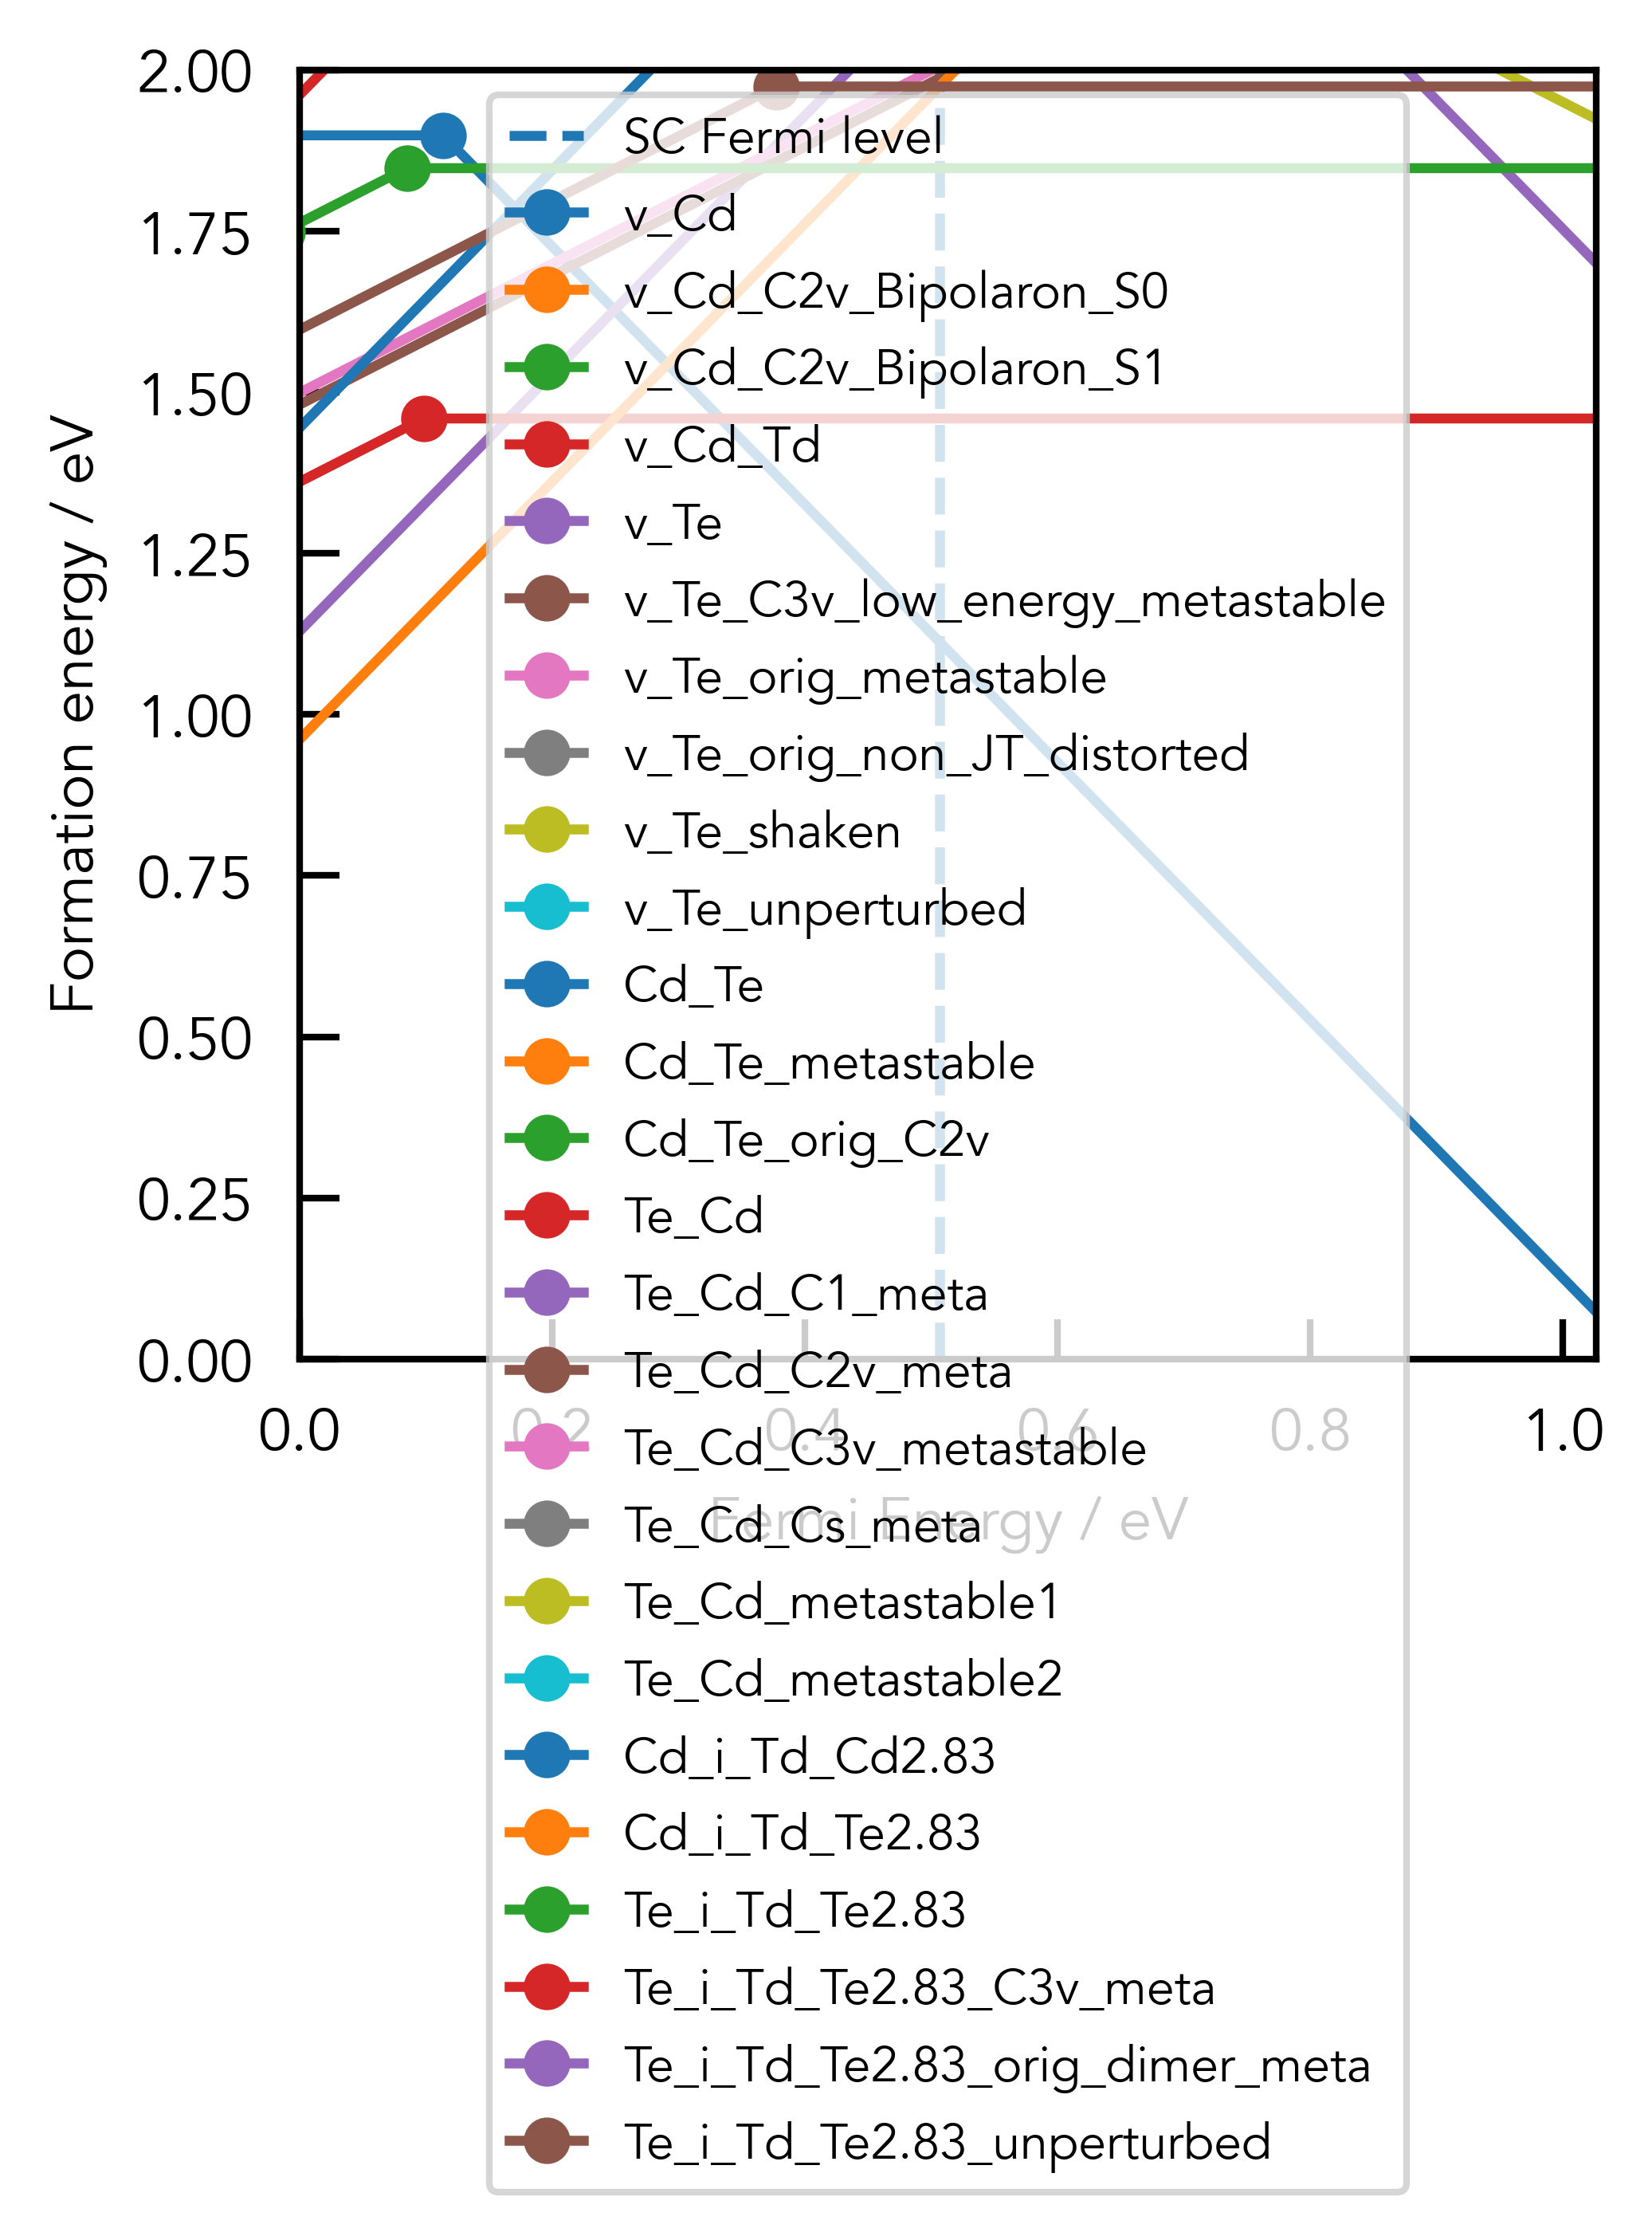

In [191]:
# check that it looks correct:
transition_levels = annealed_defect_system.get_transition_levels()
sc_fermi = annealed_defect_system.get_sc_fermi()[0]
plt.vlines(sc_fermi, 0, 2, linestyles="dashed", label = "SC Fermi level")

for k, v in transition_levels.items():
    plt.plot(v[0], v[1], "-o", label=k)

plt.ylim(0, 2)
plt.xlim(0, belas_linear_fit(annealed_defect_system.temperature))
plt.legend()
plt.ylabel("Formation energy / eV")
plt.xlabel("Fermi Energy / eV")
plt.show()

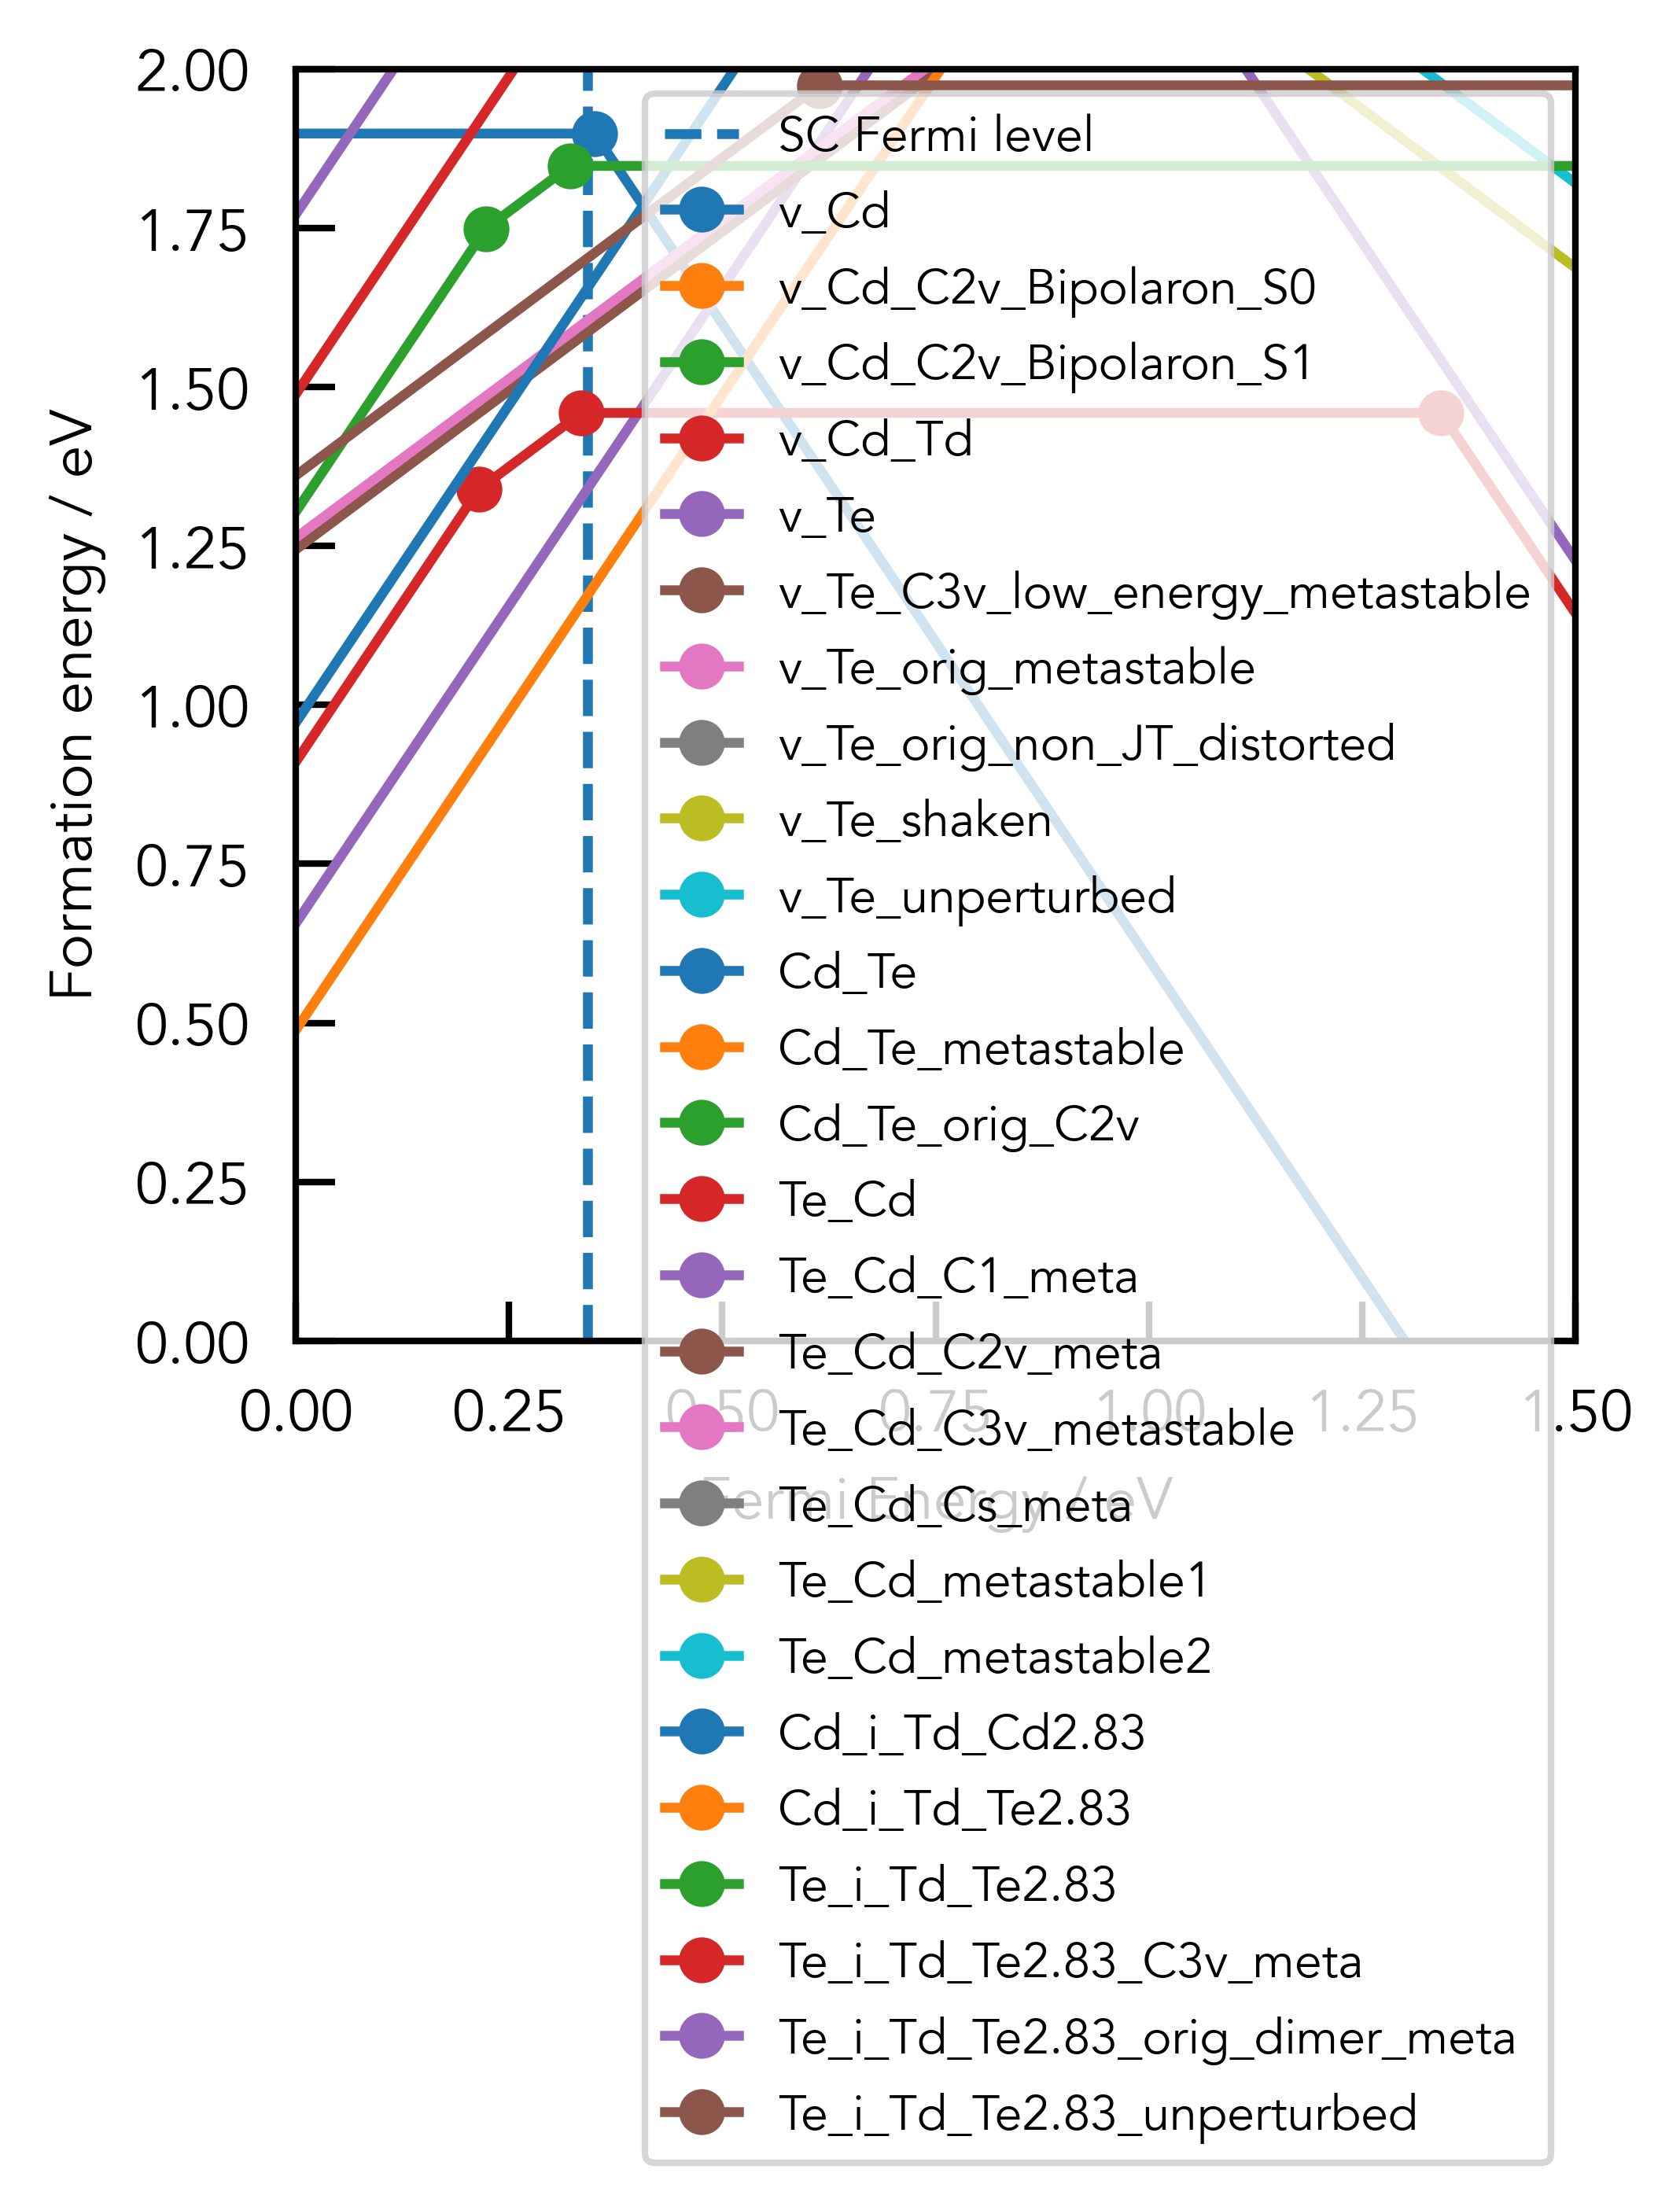

In [192]:
# check that it looks correct:
transition_levels = cooled_defect_system.get_transition_levels()
sc_fermi = cooled_defect_system.get_sc_fermi()[0]
plt.vlines(sc_fermi, 0, 2, linestyles="dashed", label = "SC Fermi level")

for k, v in transition_levels.items():
    plt.plot(v[0], v[1], "-o", label=k)

plt.ylim(0, 2)
plt.xlim(0, 1.5)
plt.legend()
plt.ylabel("Formation energy / eV")
plt.xlabel("Fermi Energy / eV")
plt.show()

Nice! All looks correct

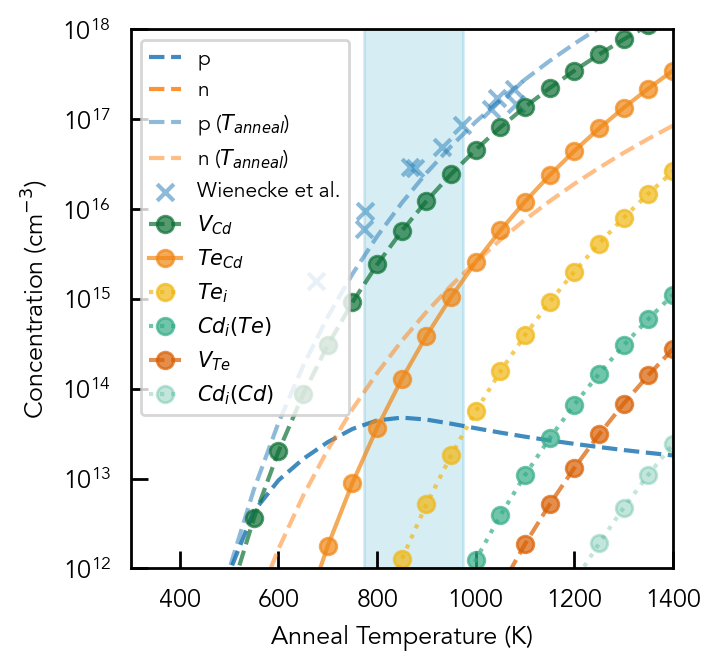

In [213]:
# just cooled concentrations for combined plot:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(dpi=200)

ax.plot(anneal_temperatures, cooled_p, label='p', alpha=0.85, linestyle="--")  # p first in blue
ax.plot(anneal_temperatures, cooled_n, label='n', alpha=0.85, linestyle="--")

wienecke_data = np.array([
[675.644735186816, 15.19509584755584],
[774.64775443452, 15.983458618047331],
[773.2859479179771, 15.780402388747808],
[876.594540193735, 16.456749859094277],
[866.7316643602969, 16.470175483037483],
[931.3592904767895, 16.68944378653258],
[972.2040508240029, 16.939464368267398],
[1043.955214492389, 17.234473455894925],
[1030.0320795068562, 17.11399747952909],
[1077.6449867907913, 17.335494943226077],
[1082.4820732167568, 17.165318826904443],
    ])

ax.plot(anneal_temperatures, annealed_p, label='p ($T_{anneal}$)', alpha=0.5, c = "C0", linestyle="--")
ax.plot(anneal_temperatures, annealed_n, label='n ($T_{anneal}$)', alpha=0.5, c = "C1", linestyle="--")

ax.scatter(wienecke_data[:,0], 10**(wienecke_data[:,1]), marker="x", label="Wienecke et al.", c="C0",
           alpha=0.5)

ax.plot(anneal_temperatures, cooled_vcd, marker='o', label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax.plot(anneal_temperatures, cooled_tecd, marker='o', label=r"$Te_{Cd}$",
           c="#F08613", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intte, marker='o', label=f"$Te_i$",
           linestyle=":", c="#F0B713", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intcdte, marker='o', label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax.plot(anneal_temperatures, cooled_vte, marker='o', label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intcdcd, marker='o', label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
# ax[1].plot(anneal_temperatures, cooled_cdte, marker='o', label=r"$Cd_{Te}$", alpha=0.7)

ax.set_xlabel('Anneal Temperature (K)')
ax.set_ylabel(r"Concentration (cm$^{-3}$)")
ax.set_yscale("log")
ax.set_xlim(300, 1400)
ax.set_ylim(1e12, 1e18)
# typical anneal range is 500 - 700, so shade in this region:
ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC')
ax.legend()

plt.savefig("CdTe_LZ_Te_rich_defect_concentrations_cooled.pdf", dpi=500,
            bbox_inches='tight')

## Cd-Rich

In [214]:
import copy

anneal_temperatures = np.arange(200, 1401, 50)

annealed_scfermi_levels = []; cooled_scfermi_levels = []
annealed_n = []; cooled_n = []
annealed_p = []; cooled_p = []
annealed_vcd = []; cooled_vcd = []
annealed_intcdte = []; cooled_intcdte = []
annealed_intcdcd = []; cooled_intcdcd = []
annealed_intte = []; cooled_intte = []
annealed_tecd = []; cooled_tecd = []
annealed_cdte = []; cooled_cdte = []
annealed_vte = []; cooled_vte = []

CdTe_LZ_Cd_Rich_defect_system = generate_pyscfermi_defect_system(
    manual_degeneracies_dpd, chempot_limits["facets"]["Cd-CdTe"],
                                 pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, 100)

for anneal_temp in anneal_temperatures:
    gap_shift = belas_linear_fit(anneal_temp) - 1.5
    scissored_dos = scissor_dos(gap_shift)
    reduced_gap_CdTe_LZ_Cd_rich_defect_system = convert_defect_energies(
        CdTe_LZ_Cd_Rich_defect_system, gap_shift)
    reduced_gap_CdTe_LZ_Cd_rich_defect_system.dos = scissored_dos

    annealed_defect_system = copy.deepcopy(reduced_gap_CdTe_LZ_Cd_rich_defect_system)

    annealed_defect_system.temperature = anneal_temp
    annealed_defect_system_data = annealed_defect_system.concentration_dict()
    annealed_scfermi_levels.append(annealed_defect_system.get_sc_fermi()[0])
    annealed_n.append(annealed_defect_system_data["n0"])
    annealed_p.append(annealed_defect_system_data["p0"])
    annealed_vcd.append(annealed_defect_system_data["v_Cd"])
    annealed_intcdte.append(annealed_defect_system_data["Cd_i_Td_Te2.83"])
    annealed_intcdcd.append(annealed_defect_system_data["Cd_i_Td_Cd2.83"])
    annealed_intte.append(annealed_defect_system_data["Te_i_Td_Te2.83"])
    annealed_tecd.append(annealed_defect_system_data["Te_Cd"])
    annealed_cdte.append(annealed_defect_system_data["Cd_Te"])
    annealed_vte.append(annealed_defect_system_data["v_Te"])

    cooled_defect_system = copy.deepcopy(CdTe_LZ_Cd_Rich_defect_system)  # room temp DOS and defect
    # energies
    cooled_defect_system.temperature = 300

    for defect_species in annealed_defect_system.defect_species:
        cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
            annealed_defect_system_data[defect_species.name] / 1e24 * annealed_defect_system.volume)

    cooled_defect_system_data = cooled_defect_system.concentration_dict()
    cooled_scfermi_levels.append(cooled_defect_system.get_sc_fermi()[0])
    cooled_n.append(cooled_defect_system_data["n0"])
    cooled_p.append(cooled_defect_system_data["p0"])
    cooled_vcd.append(annealed_defect_system_data["v_Cd"])
    cooled_intcdte.append(annealed_defect_system_data["Cd_i_Td_Te2.83"])
    cooled_intcdcd.append(annealed_defect_system_data["Cd_i_Td_Cd2.83"])
    cooled_intte.append(annealed_defect_system_data["Te_i_Td_Te2.83"])
    cooled_tecd.append(annealed_defect_system_data["Te_Cd"])
    cooled_cdte.append(annealed_defect_system_data["Cd_Te"])
    cooled_vte.append(annealed_defect_system_data["v_Te"])

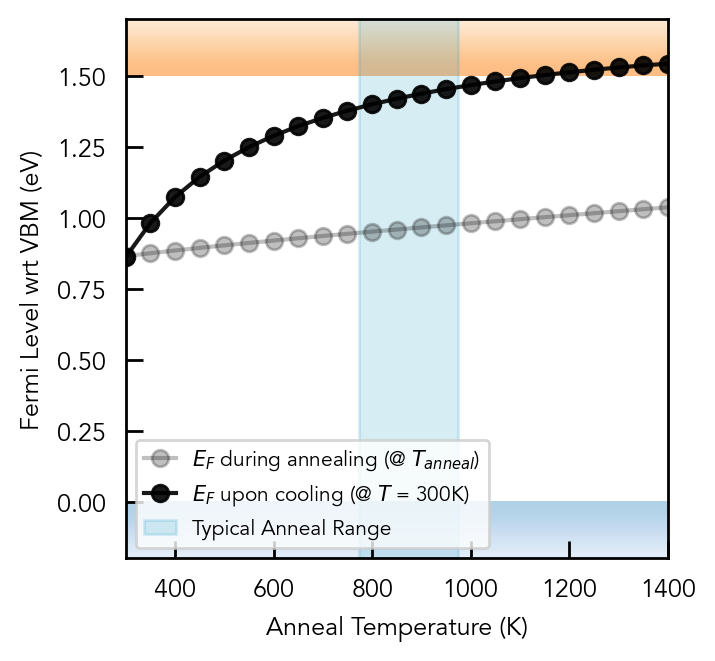

In [215]:
plt.style.use("../Packages/publication_style.mplstyle")
f,ax = plt.subplots(dpi=200)
ax.plot(anneal_temperatures,
        np.array(annealed_scfermi_levels) - (belas_linear_fit(np.array(anneal_temperatures)) - 1.5)/2,
        # Get annealed Fermi level wrt the room temp gap!
        marker='o', label="$E_F$ during annealing (@ $T_{anneal}$)", color = "k", alpha=0.25)
ax.plot(anneal_temperatures, cooled_scfermi_levels, marker='o',
        label="$E_F$ upon cooling (@ $T$ = 300K)", color = "k", alpha=0.9)
ax.set_xlabel('Anneal Temperature (K)')
ax.set_ylabel('Fermi Level wrt VBM (eV)')
ax.set_xlim(300, 1400)
ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC', label="Typical Anneal Range")
ax.legend()

# show VB in blue from -0.3 to 0 eV:
ax.imshow(
    [(1, 1), (0, 0)],
    cmap=plt.cm.Blues,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], -0.3, 0),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
    )

ax.imshow(
    [(0, 0,), (1, 1)],
    cmap=plt.cm.Oranges,
    extent=(ax.get_xlim()[0], ax.get_xlim()[1], 1.5, 1.8),
    vmin=0,
    vmax=3,
    interpolation="bicubic",
    rasterized=True,
    aspect="auto",
)
ax.set_ylim(-0.2, 1.7)
# f.savefig("CdTe_LZ_Cd_rich_Fermi_levels_annealing_and_cooling.pdf", dpi=500, bbox_inches='tight')
plt.show()

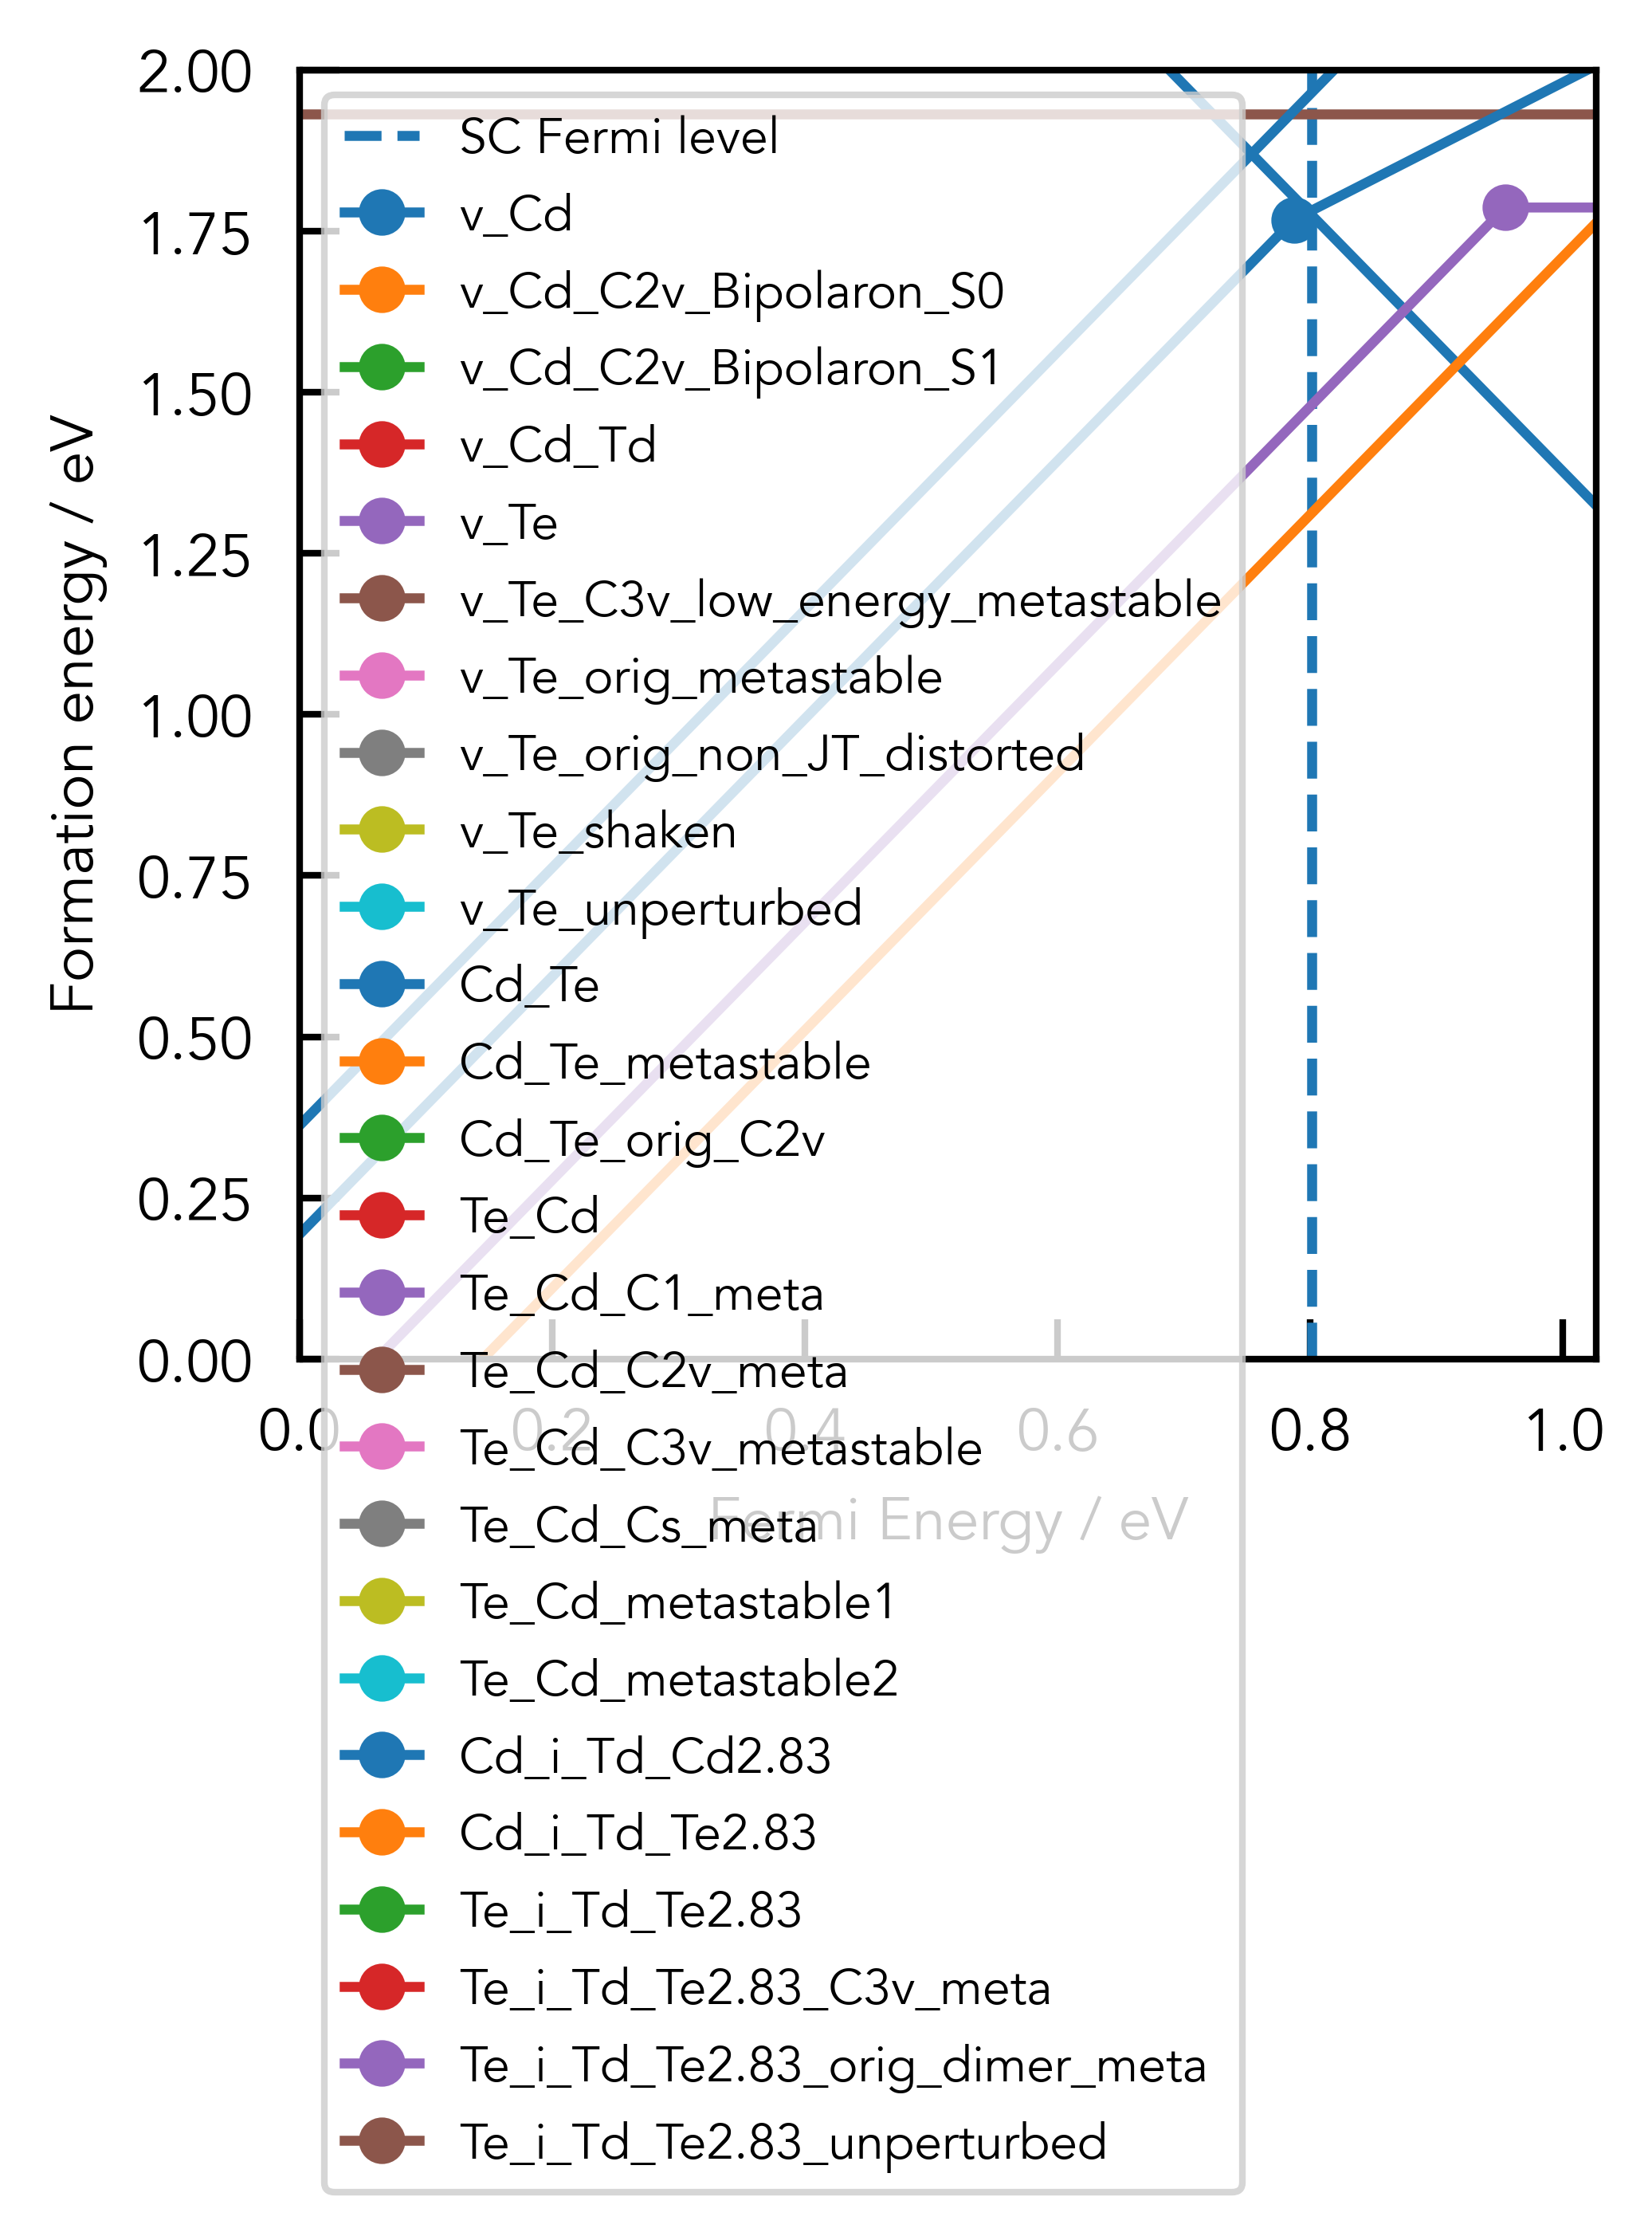

In [216]:
# check that it looks correct:
transition_levels = annealed_defect_system.get_transition_levels()
sc_fermi = annealed_defect_system.get_sc_fermi()[0]
plt.vlines(sc_fermi, 0, 2, linestyles="dashed", label = "SC Fermi level")

for k, v in transition_levels.items():
    plt.plot(v[0], v[1], "-o", label=k)

plt.ylim(0, 2)
plt.xlim(0, belas_linear_fit(annealed_defect_system.temperature))
plt.legend()
plt.ylabel("Formation energy / eV")
plt.xlabel("Fermi Energy / eV")
plt.show()

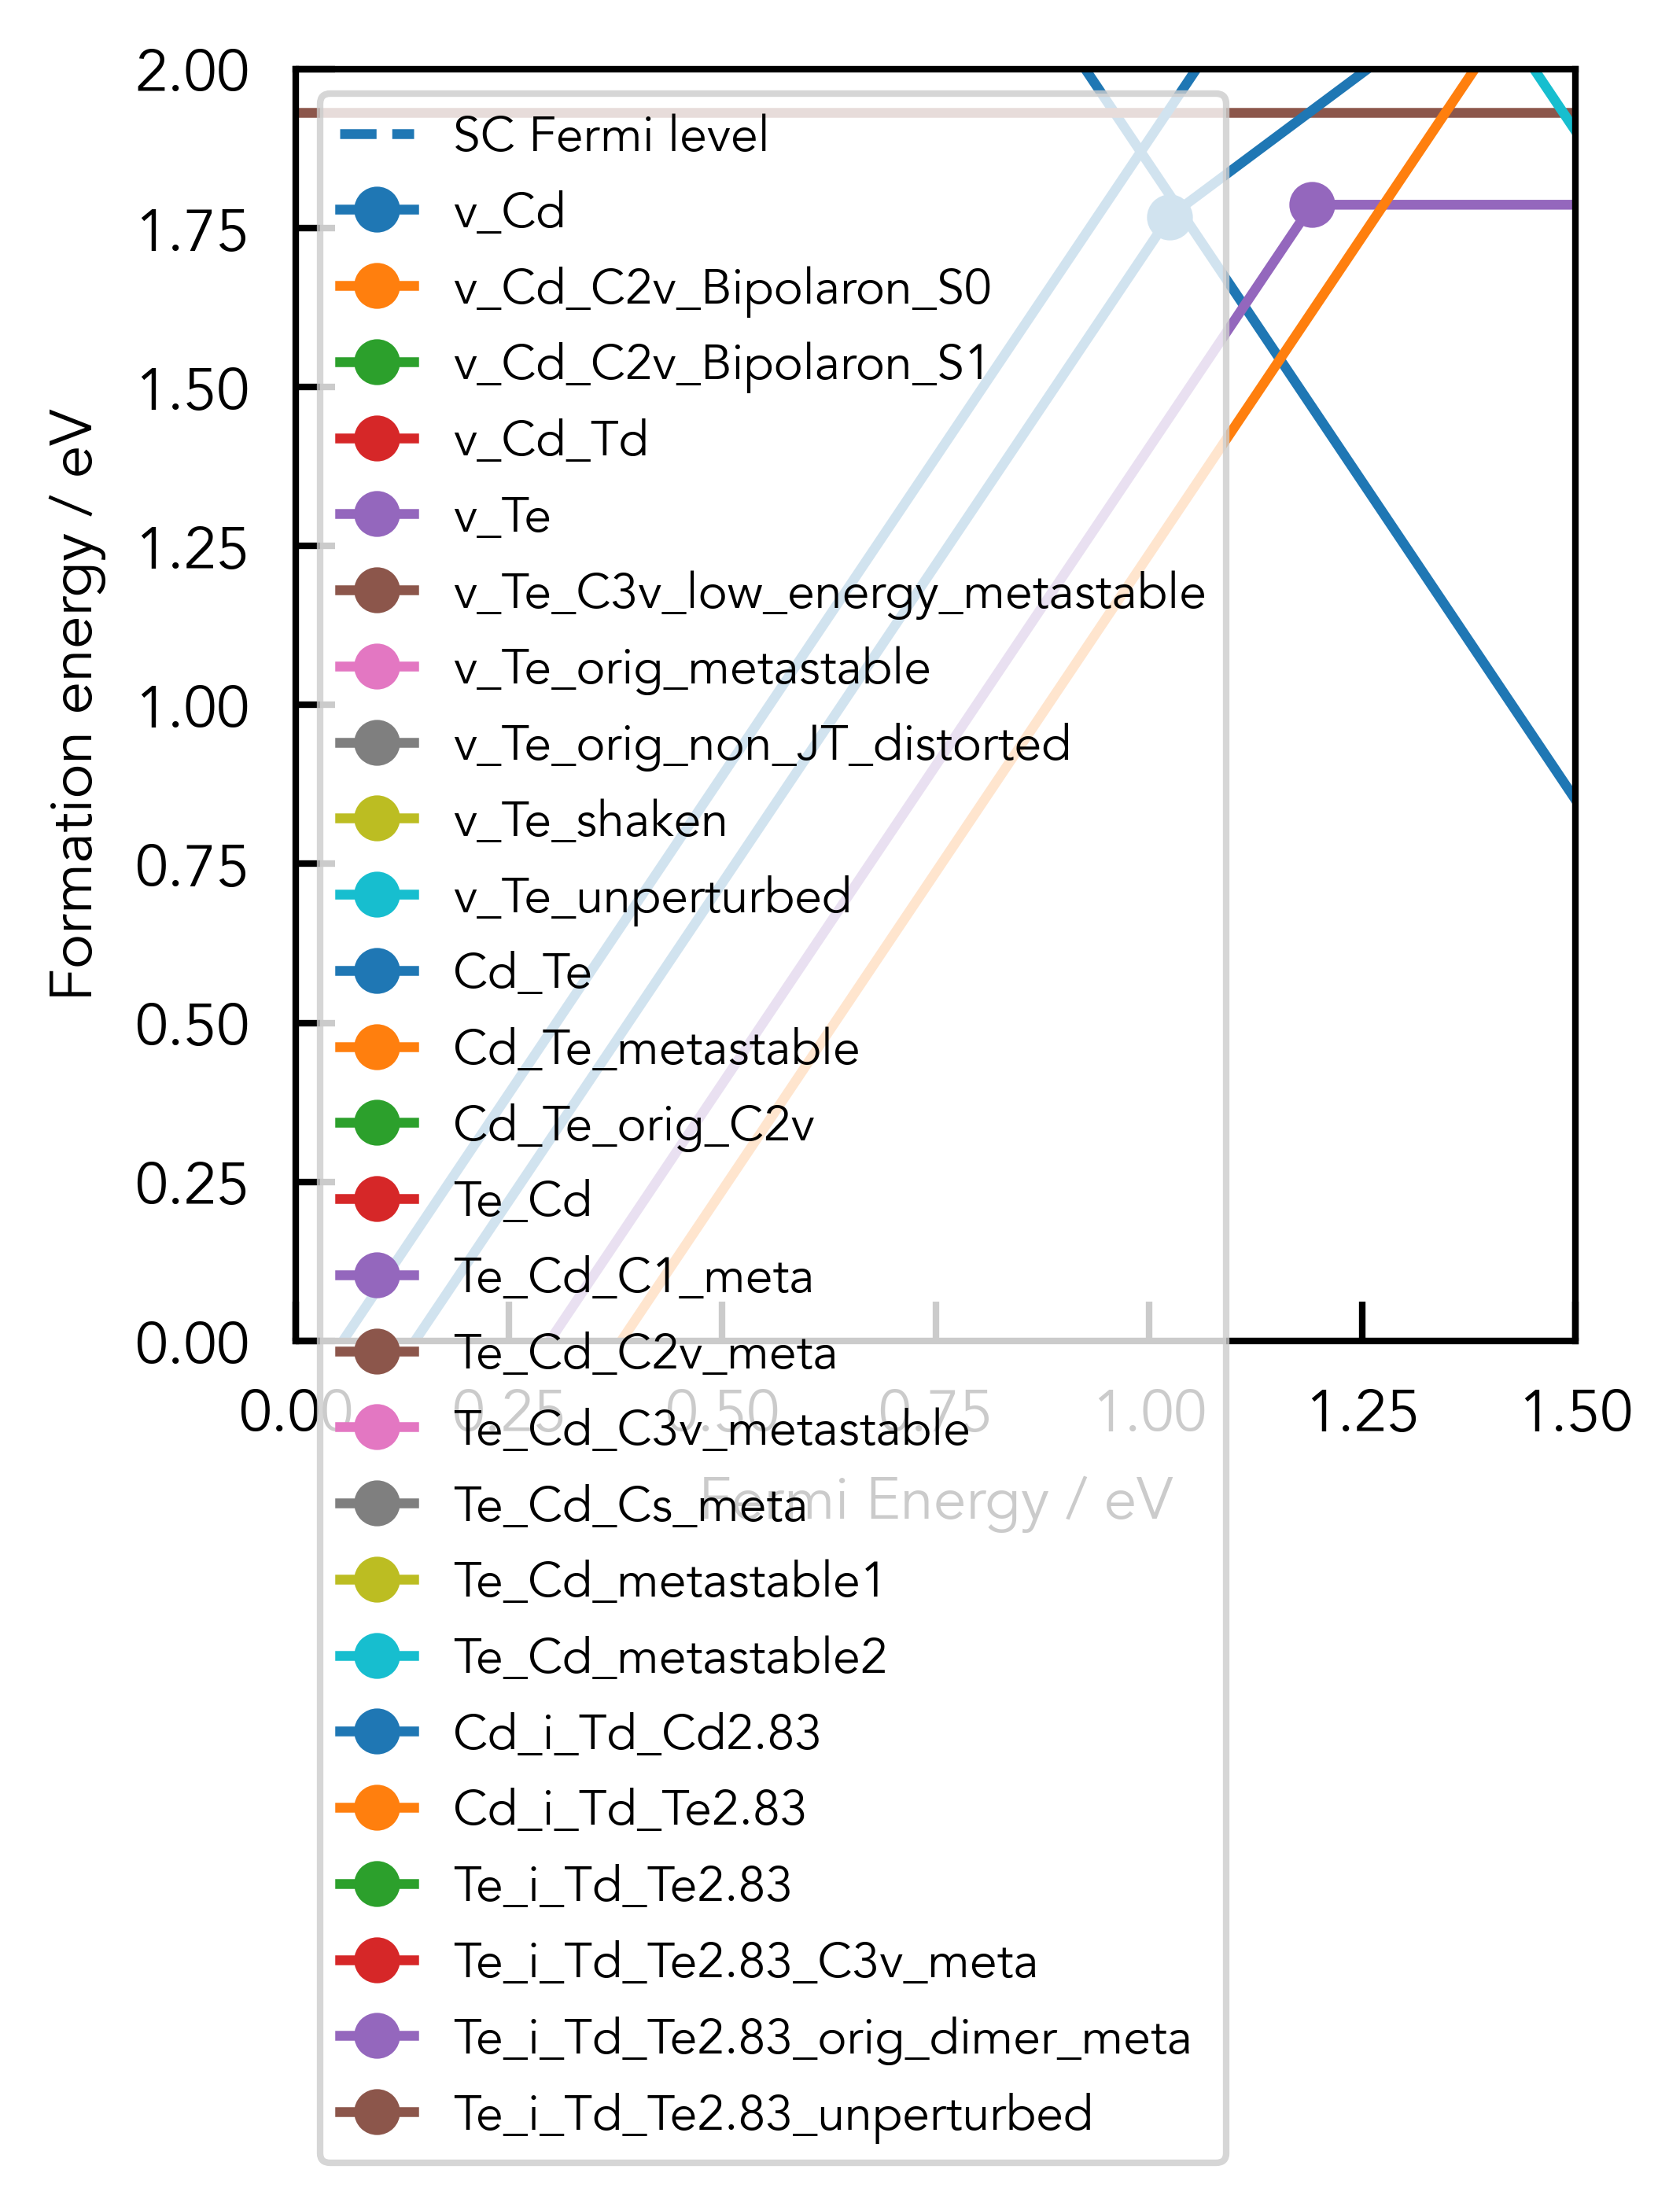

In [217]:
# check that it looks correct:
transition_levels = cooled_defect_system.get_transition_levels()
sc_fermi = cooled_defect_system.get_sc_fermi()[0]
plt.vlines(sc_fermi, 0, 2, linestyles="dashed", label = "SC Fermi level")

for k, v in transition_levels.items():
    plt.plot(v[0], v[1], "-o", label=k)

plt.ylim(0, 2)
plt.xlim(0, 1.5)
plt.legend()
plt.ylabel("Formation energy / eV")
plt.xlabel("Fermi Energy / eV")
plt.show()

In [198]:
np.mean(cooled_scfermi_levels[12:16])  # midpoint of 500-700 degrees C (+273.15 -> K);
# SC Fermi for typical anneal temperature
# c.f. 1.403 eV without accounting for temp dependent gap (1.436 eV here)

1.4285725130649503

In [199]:
np.mean(anneal_temperatures[12:16])  # midpoint of 500-700 degrees C (+273.15 -> K)

875.0

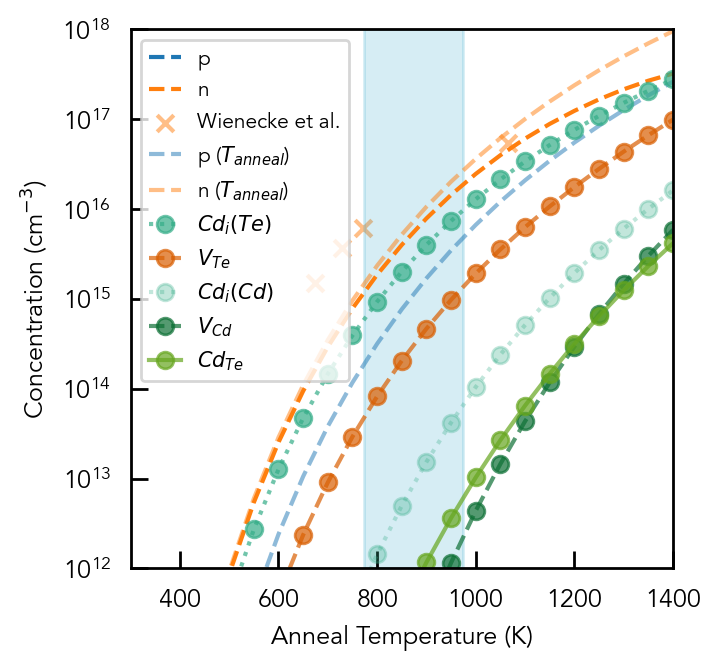

In [218]:
# just cooled concentrations for combined plot:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(dpi=200)

ax.plot(anneal_temperatures, cooled_p, label='p', linestyle="--")  # p first in blue
ax.plot(anneal_temperatures, cooled_n, label='n', linestyle="--")

wienecke_data = np.array([
[673.391828063177, 15.178617885065655],
[727.7574926746233, 15.561823650495894],
[770.8375293177492, 15.790761254044975],
[1065.5008868416094, 16.73057385017732],
    ])
ax.scatter(wienecke_data[:,0], 10**(wienecke_data[:,1]), marker="x", label="Wienecke et al.", c="C1",
           alpha=0.5)

ax.plot(anneal_temperatures, annealed_p, label='p ($T_{anneal}$)', alpha=0.5, c = "C0", linestyle="--")
ax.plot(anneal_temperatures, annealed_n, label='n ($T_{anneal}$)', alpha=0.5, c = "C1", linestyle="--")

# plot in order of concentration in anneal range:
# ax.plot(anneal_temperatures, cooled_tecd, marker='o', label=r"$Te_{Cd}$",
#            c="#F08613", alpha=0.7)
# ax.plot(anneal_temperatures, cooled_intte, marker='o', label=f"$Te_i$",
#            linestyle=":", c="#F0B713", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intcdte, marker='o', label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax.plot(anneal_temperatures, cooled_vte, marker='o', label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax.plot(anneal_temperatures, cooled_intcdcd, marker='o', label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
ax.plot(anneal_temperatures, cooled_vcd, marker='o', label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax.plot(anneal_temperatures, cooled_cdte, marker='o', label=r"$Cd_{Te}$", alpha=0.7, c="#66A61E")
# typical anneal range is 500 - 700, so shade in this region:
ax.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC')

ax.set_xlabel('Anneal Temperature (K)')
ax.set_ylabel(r"Concentration (cm$^{-3}$)")
ax.set_yscale("log")
ax.set_xlim(300, 1400)
ax.set_ylim(1e12, 1e18)
ax.legend()

plt.savefig("CdTe_LZ_Cd_rich_defect_concentrations_cooled.pdf", dpi=500,
            bbox_inches='tight')

# Previous Analysis and Interpolation Attempts:

#### Removing $Te_i^{-2}$ and $Te_i^{-1}$ (Previously, now removed in `doped` `v2` jsons)
Checked and these are false charge states. Note that $Cd_{Te}^{-2}$ was also checked but is a true
charge state (just about), but still has TL above CBM, same with $V_{Te}^{-2}$ (double Cd dimer).

In [113]:
from doped import analysis
from monty.serialization import loadfn, dumpfn

LZ_CdTe_defect_dict = loadfn("VASP_Files/Pickled_Stuff/LZ_CdTe_defects_dict.json")
LZ_CdTe_dpd = loadfn("VASP_Files/Pickled_Stuff/LZ_CdTe_dpd.json")
chempot_limits = loadfn("VASP_Files/Pickled_Stuff/cdte_chempots_elts_as_strings.json")

In [123]:
del LZ_CdTe_defect_dict["Int_Te_3_-1"]
del LZ_CdTe_defect_dict["Int_Te_3_-2"]

In [125]:
dumpfn(LZ_CdTe_defect_dict, "VASP_Files/Pickled_Stuff/LZ_CdTe_defects_dict.json")
LZ_CdTe_dpd = analysis.dpd_from_defect_dict(LZ_CdTe_defect_dict)
dumpfn(LZ_CdTe_dpd, "VASP_Files/Pickled_Stuff/LZ_CdTe_dpd.json")

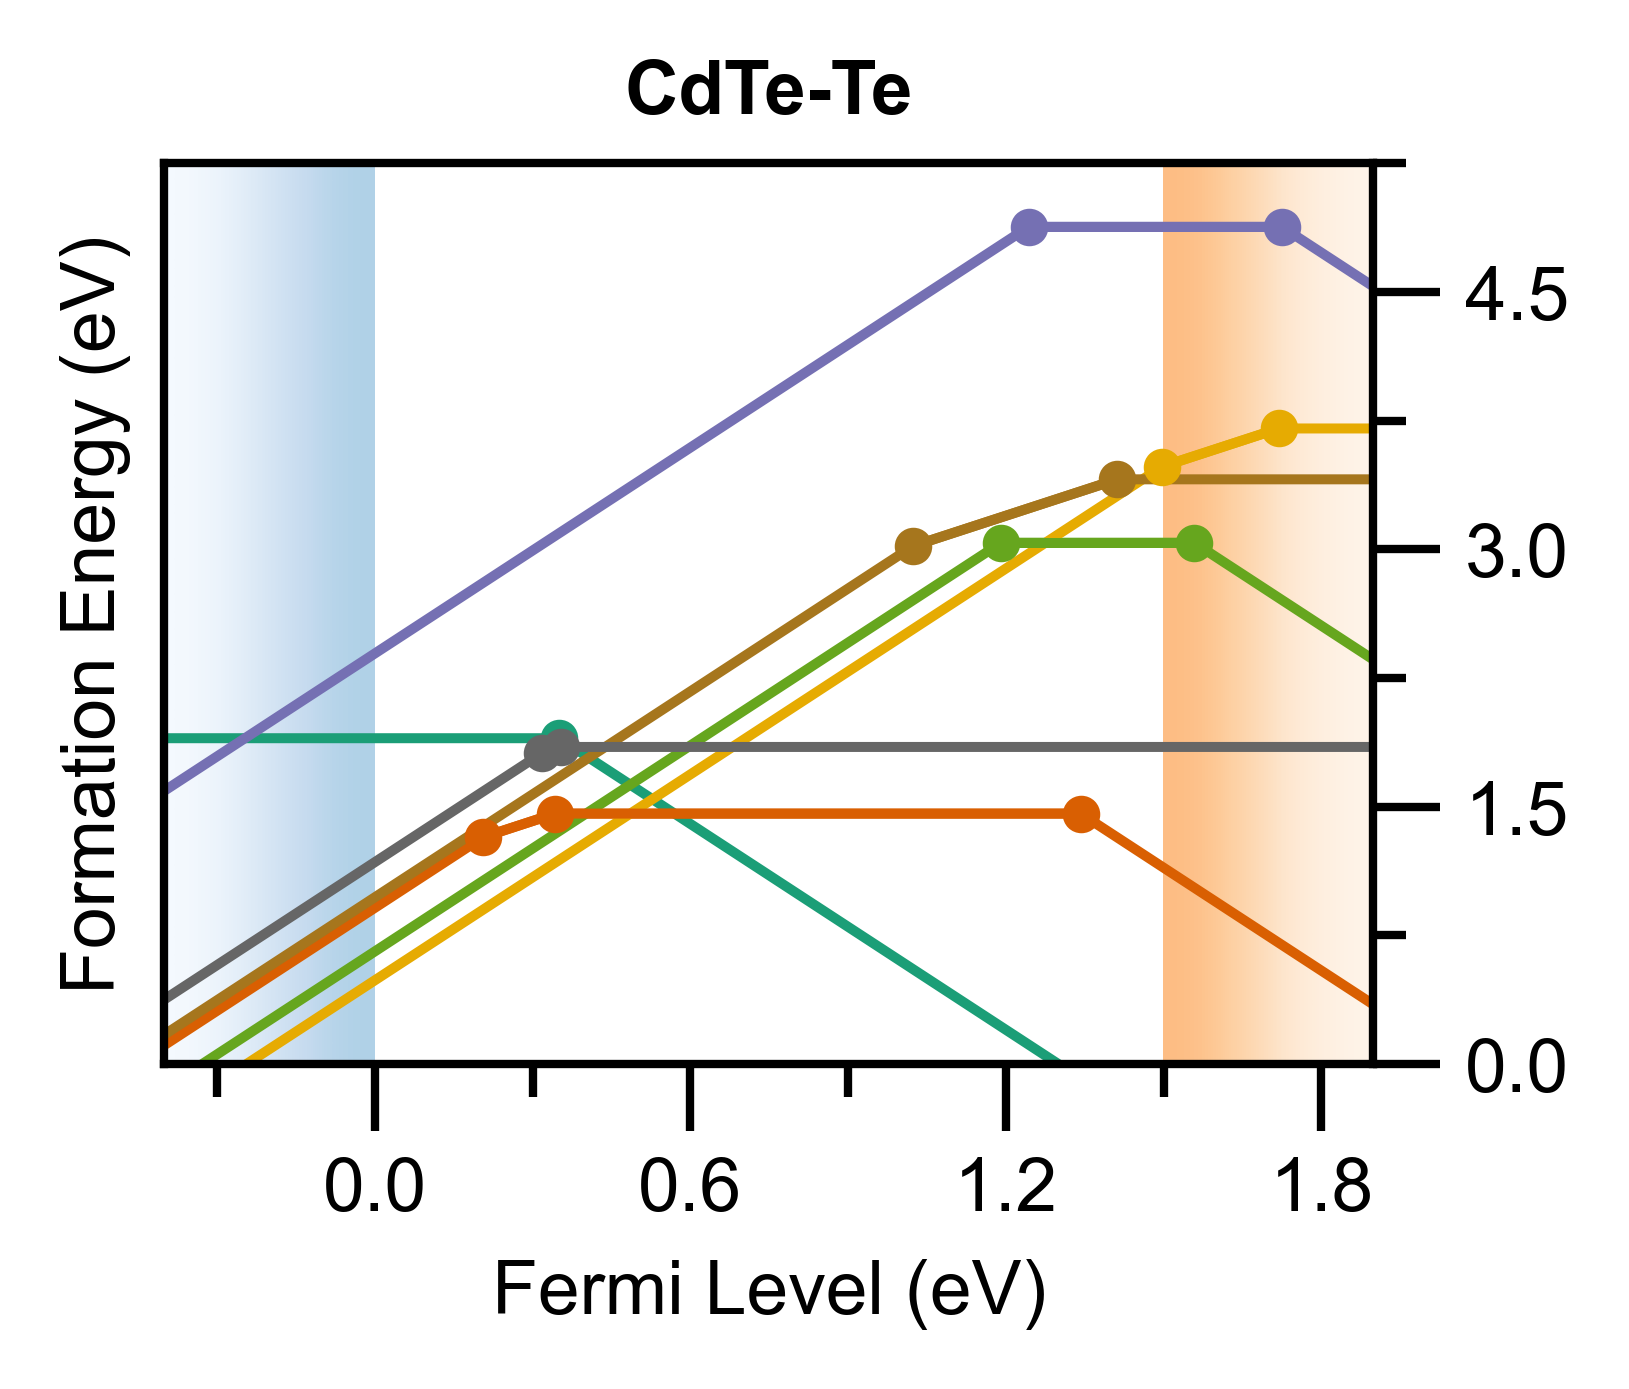

In [149]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("../Packages/publication_style.mplstyle")

ax = plotting.formation_energy_plot(LZ_CdTe_dpd,
                                    chempot_limits,
                                    pd_facets=["CdTe-Te"],
                                    ylim=(0, 5.25),
                                    chempot_table=False,)
# make ticks go on the outside
ax.tick_params(direction='out', which="both")
# make y ticks go on the right
ax.yaxis.tick_right()
ax.get_legend().remove()  # get rid of legend, this is going as right hand side Te rich TLD

# then manually editing in Affinity for consistent colours
plt.savefig("CdTe_LZ_Te_Rich_TLD.pdf", dpi=500, bbox_inches='tight')

Interpolating:

In [27]:
cd_chempots = np.array(cooling_concentration_dict_list)[:, 0]
anneal_temps = np.array(cooling_concentration_dict_list)[:, 1]
fermi_levels = np.array([cooling_dict["Fermi Energy"] for cooling_dict in
                np.array(cooling_concentration_dict_list)[:, 2]])

x = anneal_temps; y = cd_chempots; z = fermi_levels

# zip to a list of tuples, then subselect unique tuples
tuple_list = list(set(zip(x, y, z)))

# sort the data, by x then y
x, y, z = zip(*sorted(zip(x, y, z)))
x = np.array(x); y = np.array(y); z = np.array(z)

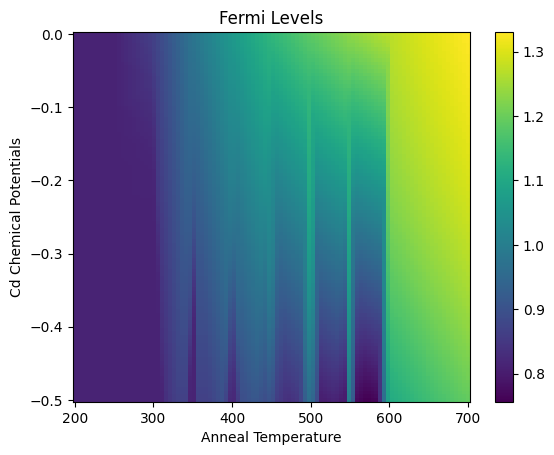

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Your zipped_data, make sure x, y are grid-like and z is of shape corresponding to the grid

# Convert to grid
xi, yi = np.linspace(200, 700, 100), np.linspace(-0.5, y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Performing the interpolation
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot using pcolormesh
plt.pcolormesh(xi, yi, zi, shading='auto', cmap='viridis')
plt.colorbar()
plt.xlabel('Anneal Temperature')
plt.ylabel('Cd Chemical Potentials')
plt.title('Fermi Levels')
plt.show()

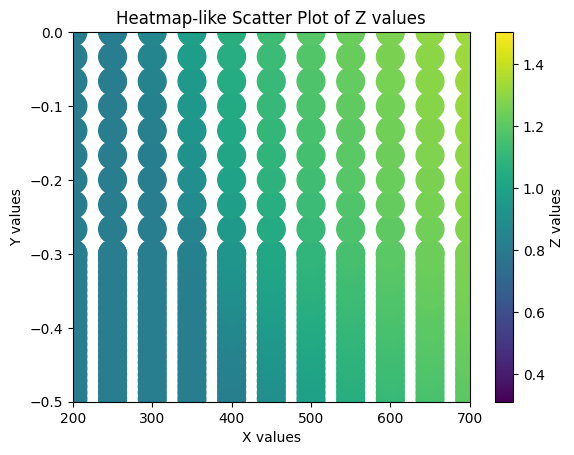

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot with colormap reflecting the z value
plt.scatter(x, y, c=z, cmap='viridis', s=400)
plt.xlim(200, 700)
plt.ylim(-0.5, y.max())
plt.colorbar(label='Z values')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Heatmap-like Scatter Plot of Z values')
plt.show()

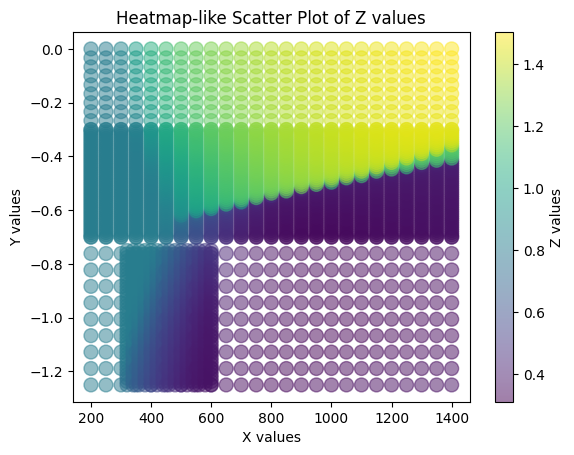

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot with colormap reflecting the z value
plt.scatter(x, y, c=z, cmap='viridis', s=100, alpha=0.5)
plt.colorbar(label='Z values')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Heatmap-like Scatter Plot of Z values')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot with colormap reflecting the z value
xi, yi = np.mgrid[min(x):max(x):500j, min(y):max(y):500j]
zi = griddata((x, y), z, (xi, yi), method='cubic')
plt.scatter(xi, yi, c=zi, cmap='viridis')
plt.colorbar(label='Z values')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Heatmap-like Scatter Plot of Z values')
plt.show()

In [505]:
import copy

cd_chemical_potentials = np.linspace(0, -1.25, 10)  # Te chemical potential is just -1.25 - μ_Cd
annealed_scfermi_levels = []; cooled_scfermi_levels = []
annealed_n = []; cooled_n = []
annealed_p = []; cooled_p = []
annealed_vcd = []; cooled_vcd = []
annealed_intcdte = []; cooled_intcdte = []
annealed_intcdcd = []; cooled_intcdcd = []
annealed_intte = []; cooled_intte = []
annealed_tecd = []; cooled_tecd = []
annealed_cdte = []; cooled_cdte = []
annealed_vte = []; cooled_vte = []

for cd_chempot in cd_chemical_potentials:
    # annealing
    annealed_defect_system = generate_pyscfermi_defect_system(
        manual_degeneracies_dpd,
        {"Cd": cd_chempot + chempot_limits["elemental_refs"]["Cd"],
         "Te": -1.25 - cd_chempot + chempot_limits["elemental_refs"]["Te"]},
        pyscfermi_k181818_NKRED2_dos, cdte_prim_cell_volume, 875)  # anneal at 875 K

    annealed_defect_system_data = annealed_defect_system.concentration_dict()
    annealed_scfermi_levels.append(annealed_defect_system.get_sc_fermi()[0])
    annealed_n.append(annealed_defect_system_data["n0"])
    annealed_p.append(annealed_defect_system_data["p0"])
    annealed_vcd.append(annealed_defect_system_data["Vac_Cd"])
    annealed_intcdte.append(annealed_defect_system_data["Int_Cd"])
    annealed_intcdcd.append(annealed_defect_system_data["Int_Cd_1"])
    annealed_intte.append(annealed_defect_system_data["Int_Te"])
    annealed_tecd.append(annealed_defect_system_data["Sub_Te_on_Cd"])
    annealed_cdte.append(annealed_defect_system_data["Sub_Cd_on_Te"])
    annealed_vte.append(annealed_defect_system_data["Vac_Te"])

    cooled_defect_system = copy.deepcopy(annealed_defect_system)
    cooled_defect_system.temperature = 300

    for defect_species in annealed_defect_system.defect_species:
        cooled_defect_system.defect_species_by_name(defect_species.name).fix_concentration(
            annealed_defect_system_data[defect_species.name] / 1e24 * annealed_defect_system.volume)

    cooled_defect_system_data = cooled_defect_system.concentration_dict()
    cooled_scfermi_levels.append(cooled_defect_system.get_sc_fermi()[0])
    cooled_n.append(cooled_defect_system_data["n0"])
    cooled_p.append(cooled_defect_system_data["p0"])
    cooled_vcd.append(cooled_defect_system_data["Vac_Cd"])
    cooled_intcdte.append(cooled_defect_system_data["Int_Cd"])
    cooled_intcdcd.append(cooled_defect_system_data["Int_Cd_1"])
    cooled_intte.append(cooled_defect_system_data["Int_Te"])
    cooled_tecd.append(cooled_defect_system_data["Sub_Te_on_Cd"])
    cooled_cdte.append(cooled_defect_system_data["Sub_Cd_on_Te"])
    cooled_vte.append(cooled_defect_system_data["Vac_Te"])

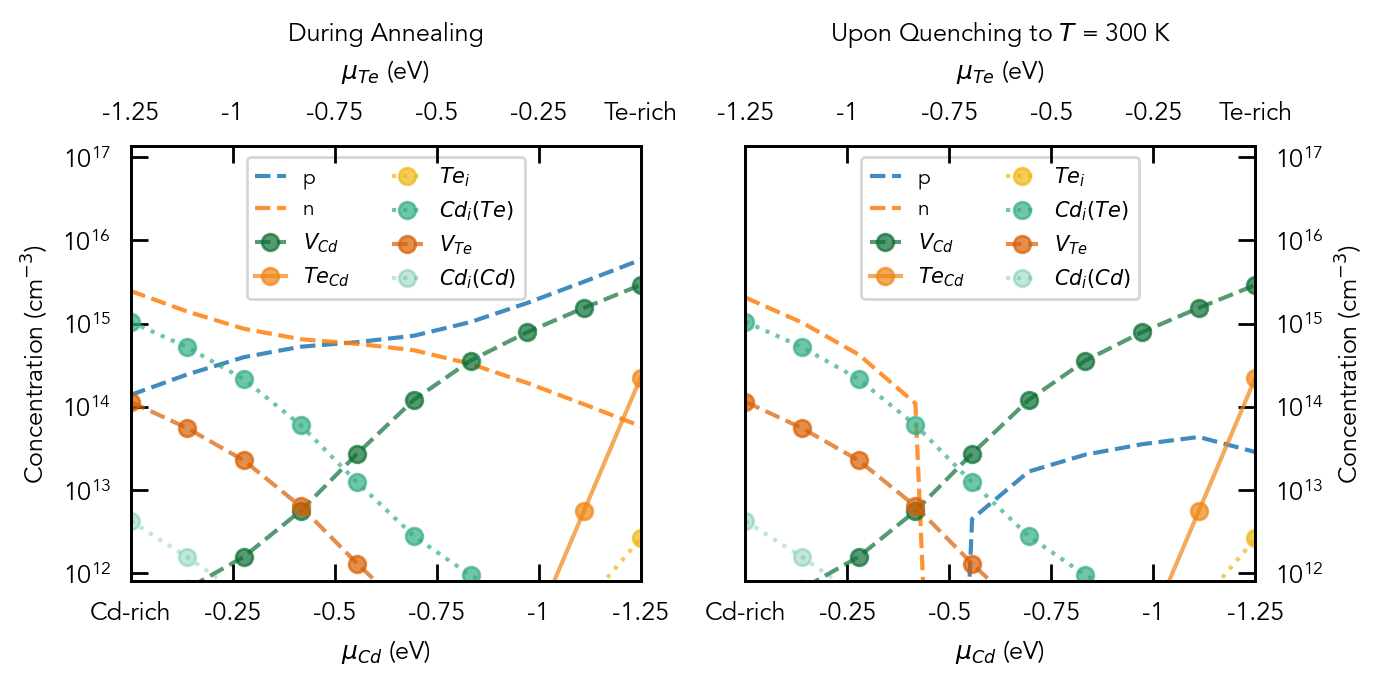

In [518]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,2, dpi=200, figsize=(7,3.5))

ax[0].plot(cd_chemical_potentials, annealed_p, label='p', alpha=0.85, linestyle="--")  # p first in blue
ax[0].plot(cd_chemical_potentials, annealed_n, label='n', alpha=0.85, linestyle="--")
ax[0].plot(cd_chemical_potentials, annealed_vcd, marker='o', label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax[0].plot(cd_chemical_potentials, annealed_tecd, marker='o', label=r"$Te_{Cd}$",
           c="#F08613", alpha=0.7)
ax[0].plot(cd_chemical_potentials, annealed_intte, marker='o', label=f"$Te_i$",
           linestyle=":", c="#F0B713", alpha=0.7)
ax[0].plot(cd_chemical_potentials, annealed_intcdte, marker='o', label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax[0].plot(cd_chemical_potentials, annealed_vte, marker='o', label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax[0].plot(cd_chemical_potentials, annealed_intcdcd, marker='o', label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
# ax[0].plot(cd_chemical_potentials, cooled_cdte, marker='o', label=r"$Cd_{Te}$", c="#66A61E", alpha=0.7)

ax[1].plot(cd_chemical_potentials, cooled_p, label='p', alpha=0.85, linestyle="--")  # p first in blue
ax[1].plot(cd_chemical_potentials, cooled_n, label='n', alpha=0.85, linestyle="--")
ax[1].plot(cd_chemical_potentials, cooled_vcd, marker='o', label=r"$V_{Cd}$",
           linestyle="--", c="#0D7035", alpha=0.7)
ax[1].plot(cd_chemical_potentials, cooled_tecd, marker='o', label=r"$Te_{Cd}$",
           c="#F08613", alpha=0.7)
ax[1].plot(cd_chemical_potentials, cooled_intte, marker='o', label=f"$Te_i$",
           linestyle=":", c="#F0B713", alpha=0.7)
ax[1].plot(cd_chemical_potentials, cooled_intcdte, marker='o', label=f"$Cd_i(Te)$",
           linestyle=":", c="#35AD88", alpha=0.7)
ax[1].plot(cd_chemical_potentials, cooled_vte, marker='o', label=r"$V_{Te}$",
           linestyle="--", c="#D95F02", alpha=0.7)
ax[1].plot(cd_chemical_potentials, cooled_intcdcd, marker='o', label=f"$Cd_i(Cd)$",
           linestyle=":", c="#35AD88", alpha=0.3)
# ax[1].plot(cd_chemical_potentials, cooled_cdte, marker='o', label=r"$Cd_{Te}$", alpha=0.7)
ax[0].set_title("During Annealing")
ax[1].set_title("Upon Quenching to $T$ = 300 K")
for axis in ax:
    axis.set_xlabel(r'$\mu_{Cd}$ (eV)')
    axis.set_ylabel(r"Concentration (cm$^{-3}$)")
    axis.set_yscale("log")
    axis.set_xlim(0, -1.25)
    axis.set_ylim(8e11, 1.35e17)
    # typical anneal range is 500 - 700, so shade in this region:
    #axis.axvspan(500+273.15, 700+273.15, alpha=0.2, color='#33A7CC', label="Typical Anneal Range")
    axis.legend(ncols=2, loc="upper center")
    # show mu_Te on upper x axis:
    axis2 = axis.twiny()
    axis2.set_xlim(0, -1.25)
    # set label with padding:
    axis2.set_xlabel(r'$\mu_{Te}$ (eV)', labelpad=8)
    axis2.set_xticks(np.arange(-1.25, 0.1, 0.25))
    axis2.set_xticklabels(["Te-rich", -0.25, -0.5, -0.75, -1, -1.25])
    axis.set_xticks(np.arange(-1.25, 0.1, 0.25))
    axis.set_xticklabels([-1.25, -1, -0.75, -0.5, -0.25, "Cd-rich"])

ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
plt.tight_layout()
# plt.savefig("CdTe_LZ_Cd_rich_defect_concentrations_annealing_and_cooling.pdf", dpi=500,
#             bbox_inches='tight')